# Práctica del Módulo: Machine Learning.
### Alumno: María Araceli Paredes Delgado

### Problema de regresión: Predecir el precio del airbnb utilizando los datos disponibles. 

#### Tareas

• Generación de nuevas características a partir de las existentes

• Codificación de variables

• Análisis exploratorio

• Selección y evaluación del modelo

• Comparativa de distintos algoritmos

## Conjunto de datos

El conjunto de datos escogido es [éste](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets), extraído de Airbnb mediante técnicas de scraping. Se ha seleccionado la opción recomendada (“Only the 14780 selected records”), ya que minimiza el tiempo de ejecución y evita problemas de memoria en equipos con menos prestaciones.
El dataset fue "scrapeado" el 8 de abril del 2017 y contiene información de viviendas turísticas de la ciudad de Madrid.
Cada fila del dataset representa una vivienda disponible para el alquilé en Airbnb y cada columna describe las caracterísitcas de esa vivienda.

Voy a utilizar **DataFrames** de [Pandas](http://pandas.pydata.org/). Pandas es un módulo de python de código abierto para el análisis de datos, que proporciona estructuras de datos fáciles de utilizar. 


## 1.- Librerias necesarias

In [1]:
# cargo librerías necesarias
import numpy  as np  
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import graphviz


import time

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2.- Carga de datos

In [2]:
house_data1 = pd.read_csv('./data/airbnb-listings.csv', sep =';', decimal='.') # cargamos fichero
print(f"El dataset original contiene {len(house_data1)} viviendas Airbnb con {len(house_data1.columns)} características")
pd.set_option('display.max_columns', len(house_data1)) # Para ver todas las columnas
house_data1.head(5)                                   # visualizamos 5 primeras filas


El dataset original contiene 14780 viviendas Airbnb con 89 características


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,The loft is located on a gated property. Ther...,There is no public transportation from this lo...,The loft is entirely private to the guest as i...,My wife and I live on the property so we would...,The loft is entirely private but is adjacent t...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/c351a9b5-5...,58386783,https://www.airbnb.com/users/show/58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c5c78f08-f...,https://a0.muscache.com/im/pictures/c5c78f08-f...,NaN,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,NaN,Austin,TX,78733,Austin,"Austin, TX",US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,NaN,Ideal to discover the city either on foot or b...,Travellers will have access to the entire apar...,We will be more than happy to help you with an...,CHECK-IN Week Days: The check-in and key colle...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3ce27aee-f...,102947901,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,NaN,162.0,162.0,"email,phone,reviews,work_email","Barcelona, Barcelona 08010, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain

In [3]:
#Compruebo los tipos de datos que tenemos
dato = house_data1.dtypes
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

## 3.- División de datos en train y test

Para poder saber cómo de bien se comporta un algoritmo de machine learning, hemos de medir su capacidad de generalización, esto es, las prestaciones en muestras no vistas previamente por el clasificador. Para ello, dividimos el conjunto de entrenamiento en dos partes, entrenamiento y test

In [4]:
#Transformo a numpy para poder aplicar un método de sklearn
data_sin_precio = house_data1.drop ('Price', axis=1)
data_sin_pricenp = data_sin_precio.values
data = house_data1.values

y= data [:,56:57]
X= data_sin_pricenp [:,:]

#Me quedo con el nombre de las columnas
feature_names = data_sin_precio.columns[0:]



In [5]:

# Dividimos los datos en entrenamiento y test (70 training, 30 test)
datos_train, datos_test, price_train, price_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 0)

print('Datos entrenamiento: ', datos_train.shape)
print('Datos test: ', datos_test.shape)

Datos entrenamiento:  (10346, 88)
Datos test:  (4434, 88)


In [6]:
#Convierto de nuevo a pandas para seguir con el procesamiento
datos_train = pd.DataFrame(datos_train)

#Añado el nombre de las columnas
datos_train.columns = feature_names

#A partir de aquí todo el tratamiento es con train

In [7]:
datos_train.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,2156319,https://www.airbnb.com/rooms/2156319,20170407214119,2017-04-08,GRANT VII Plaza Mayor,NaN,Beautiful and charming apartment recently deco...,Beautiful and charming apartment recently deco...,none,NaN,NaN,NaN,NaN,NaN,Rest hours: Monday to Friday from (phone numbe...,NaN,NaN,https://public.opendatasoft.com/api/v2/catalog...,NaN,1650712,https://www.airbnb.com/users/show/1650712,Ximena,2012-01-25,"Madrid, Madrid, Spain","I love to travel, discover new places and cult...",within an hour,100,NaN,https://a0.muscache.com/im/users/1650712/profi...,https://a0.muscache.com/im/users/1650712/profi...,La Latina,40,40,"email,phone,reviews,jumio","Sol, Madrid, Community of Madrid 28013, Spain",Sol,Sol,Centro,Madrid,Community of Madrid,28013,Madrid,"Madrid, Spain",ES,Spain,40.4154,-3.70712,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,535,1800,150,40,2,20,2,1125,today,NaN,0,0,0,0,2017-04-08,9,2014-04-02,2014-10-20,93,10,9,9,9,10,9,NaN,NaN,strict,40,0.24,"40.4154180336,-3.70712273935","Host Has Profile Pic,Host Identity Verified,Is..."
1,3377153,https://www.airbnb.com/rooms/3377153,20170407214119,2017-04-08,Nice flat in Plaza Mayor (lift),"Flat is in the centre town, really close to Pl...",You cannot find a better location to stay in M...,"Flat is in the centre town, really close to Pl...",none,"It´s really cool, with a lot of new business (...","Apartment has wifi, lift, wash-machine and air...","The best way is walking, since in Madrid all a...","The kitchen is available with oil, sugar, coff...",You can call me if you have any doubt or if yo...,Just enjoy Madrid! You are in your home in Sp...,https://a0.muscache.com/im/pictures/47295744/3...,https://a0.muscache.com/im/pictures/47295744/3...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/47295744/3...,17037651,https://www.airbnb.com/users/show/17037651,Miguel,2014-06-20,"Madrid, Community of Madrid, Spain",I am love going out and meet new people from e...,within an hour,100,NaN,https://a0.muscache.com/im/users/17037651/prof...,https://a0.muscache.com/im/users/17037651/prof...,La Latina,1,1,"email,phone,reviews,manual_offline,jumio","La Latina, Madrid, Comunidad de Madrid 28005, ...",La Latina,Embajadores,Centro,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.4111,-3.70726,Apartment,Entire home/apt,4,1,1,2,Real Bed,"Internet,Wireless Internet,Air conditioning,Ki...",NaN,299,1350,99,20,2,10,1,1125,today,NaN,4,16,33,298,2017-04-07,182,2014-08-09,2017-03-27,92,9,9,10,10,10,9,NaN,NaN,flexible,1,5.61,"40.411131472,-3.7072583983","Host Has Profile Pic,Host Identity Verified,Is..."
2,14800635,https://www.airbnb.com/rooms/14800635,20170407214119,2017-

In [8]:
precios_df = pd.DataFrame(price_train)
precios_df.columns = ['Price']


In [9]:
#Uno los dos dataframe para seguir con el analisis
house_data_train = pd.concat([precios_df, datos_train], axis=1)

In [10]:
house_data_train.head(5)

,Price,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,85,2156319,https://www.airbnb.com/rooms/2156319,20170407214119,2017-04-08,GRANT VII Plaza Mayor,NaN,Beautiful and charming apartment recently deco...,Beautiful and charming apartment recently deco...,none,NaN,NaN,NaN,NaN,NaN,Rest hours: Monday to Friday from (phone numbe...,NaN,NaN,https://public.opendatasoft.com/api/v2/catalog...,NaN,1650712,https://www.airbnb.com/users/show/1650712,Ximena,2012-01-25,"Madrid, Madrid, Spain","I love to travel, discover new places and cult...",within an hour,100,NaN,https://a0.muscache.com/im/users/1650712/profi...,https://a0.muscache.com/im/users/1650712/profi...,La Latina,40,40,"email,phone,reviews,jumio","Sol, Madrid, Community of Madrid 28013, Spain",Sol,Sol,Centro,Madrid,Community of Madrid,28013,Madrid,"Madrid, Spain",ES,Spain,40.4154,-3.70712,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,535,1800,150,40,2,20,2,1125,today,NaN,0,0,0,0,2017-04-08,9,2014-04-02,2014-10-20,93,10,9,9,9,10,9,NaN,NaN,strict,40,0.24,"40.4154180336,-3.70712273935","Host Has Profile Pic,Host Identity Verified,Is..."
1,49,3377153,https://www.airbnb.com/rooms/3377153,20170407214119,2017-04-08,Nice flat in Plaza Mayor (lift),"Flat is in the centre town, really close to Pl...",You cannot find a better location to stay in M...,"Flat is in the centre town, really close to Pl...",none,"It´s really cool, with a lot of new business (...","Apartment has wifi, lift, wash-machine and air...","The best way is walking, since in Madrid all a...","The kitchen is available with oil, sugar, coff...",You can call me if you have any doubt or if yo...,Just enjoy Madrid! You are in your home in Sp...,https://a0.muscache.com/im/pictures/47295744/3...,https://a0.muscache.com/im/pictures/47295744/3...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/47295744/3...,17037651,https://www.airbnb.com/users/show/17037651,Miguel,2014-06-20,"Madrid, Community of Madrid, Spain",I am love going out and meet new people from e...,within an hour,100,NaN,https://a0.muscache.com/im/users/17037651/prof...,https://a0.muscache.com/im/users/17037651/prof...,La Latina,1,1,"email,phone,reviews,manual_offline,jumio","La Latina, Madrid, Comunidad de Madrid 28005, ...",La Latina,Embajadores,Centro,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.4111,-3.70726,Apartment,Entire home/apt,4,1,1,2,Real Bed,"Internet,Wireless Internet,Air conditioning,Ki...",NaN,299,1350,99,20,2,10,1,1125,today,NaN,4,16,33,298,2017-04-07,182,2014-08-09,2017-03-27,92,9,9,10,10,10,9,NaN,NaN,flexible,1,5.61,"40.411131472,-3.7072583983","Host Has Profile Pic,Host Identity Verified,Is..."
2,33,14800635,https://www.airbnb.com/rooms/14800635,20170

## 4.- Limpiado y preprocesamiento de datos
### 4.1.- Eliminación de columnas iniciales

Elimino columnas de URLs y de texto que no son útiles para la predicción de precio. A los textos quizás se le podría aplicar algún tipo de procesamiento de lenguaje pero no los voy a usar en este caso para la creación del modelo, aunque podría ser una mejora a futuro

In [11]:
caracteristicas_para_borrar = ['ID','Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary','Space', 'Description', 
                               'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
                              'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL',
                              'Host Name', 'Host Location', 'Host About', 'Host Thumbnail Url', 'Host Picture Url',
                              'Host Neighbourhood', 'Host Verifications', 'Calendar last Scraped' 
                              ]

house_data_train.drop (caracteristicas_para_borrar, axis=1, inplace=True)

Compruebo si hay características que tengan la mayoría de sus valores vacios y si es así las elimino también

In [12]:
dato =house_data_train.isna().sum ()
pd.set_option('max_rows', len(dato)) # Para ver todos
dato


Price                                14
Experiences Offered                   0
Host Since                            2
Host Response Time                 1330
Host Response Rate                 1330
Host Acceptance Rate              10321
Host Listings Count                   2
Host Total Listings Count             2
Street                                0
Neighbourhood                      3640
Neighbourhood Cleansed                0
Neighbourhood Group Cleansed        701
City                                  4
State                               106
Zipcode                             347
Market                               39
Smart Location                        0
Country Code                          0
Country                               1
Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                            38


In [13]:
house_data_train.drop (['Host Acceptance Rate', 'Square Feet', 'Weekly Price', 'Monthly Price', 'Has Availability', 'License',
                  'Jurisdiction Names'], axis=1, inplace=True)

Si analizo las características "Host Listings Count" y "Host Total Listings Count" parece que contiene la misma información.
Los compuebo:

In [14]:
print(sum((house_data_train['Host Listings Count'] == house_data_train ['Host Total Listings Count']) == False))

2


Hay muy pocos valores diferentes que precisamente coincide con el número de Nan que hemos visto antes. Esto también lo hubiera visto al hacer el estudio de correlaciones. Voy entonces a eliminar una de ellas:

In [15]:
house_data_train.drop (['Host Total Listings Count'], axis=1, inplace=True)

Elimino también la columna 'Calculated host listings count' que hace referencia a lo mismo

In [16]:
house_data_train.drop (['Calculated host listings count'], axis=1, inplace=True)

Voy ahora a analizar algunas de las características que hay de localización para ver con cuales me quedo. En principio el dataset es de Madrid y el código del pais debería ser España. Voy a comprobar los valores que hay en City para ver si realmente tenemos solo Madrid.

### City

In [17]:
dato = house_data_train.City.value_counts()
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

Madrid                                 9249
Barcelona                               211
London                                   99
Paris                                    70
马德里                                      42
Palma                                    37
Berlin                                   29
Alcúdia                                  29
Roma                                     28
New York                                 23
Los Angeles                              20
Wien                                     18
Dublin                                   18
Brooklyn                                 18
Amsterdam                                16
Inca                                     12
Toronto                                  12
Madrid, Comunidad de Madrid, ES          12
Rome                                     11
Pollença                                 10
Palma de Mallorca                         9
Bondi Beach                               8
Washington                      

Podemos ver que el dataset es muy ruidoso y aunque en teoria es para Madrid hay un montón de ciudades.
Tenemos además 4 valores Nan que hemos visto antes en City. Esos valores nulos los voy a eliminar.


In [18]:
house_data_train.dropna(subset=['City'], inplace=True) 

Ahora ya no debería tener nulos en la columna City

In [19]:
house_data_train.City.isna().sum ()

0

Analizando lo que tengo en City puedo comprobar que estos valores son los correspondientes a Madrid:

Madrid 

Madrid, Comunidad de Madrid, ES

madrid  


MADRID


Madrid, Comunidad de Madrid, ESPANA

Madid

Chueca, Madrid  

Comunidad de Madrid

Aravaca (Madrid)

Delicias 

las matas  madrid

Madri

Centro, Madrid 

Delicias-Madrid

Madrid, Vallecas (Fontarrón) 

Voy a construir un dataset solo con las filas que contienen solo esos valores:

In [20]:
house_madrid = house_data_train [house_data_train.City.str.contains("Madrid", case=False) |
               house_data_train.City.str.contains("Madrid,", case=False) |
               house_data_train.City.str.contains("Madid", case=False) |
               house_data_train.City.str.contains("(Madrid)", case=False) |
               house_data_train.City.str.contains("Delicias", case=False) |
               house_data_train.City.str.contains("Delicias-Madrid", case=False)]


In [21]:
#Compruebo que efectivamente ya solo tengo viviendas de Madrid
dato = house_madrid.City.value_counts()
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

Madrid                                 9249
Madrid, Comunidad de Madrid, ES          12
madrid                                    6
MADRID                                    2
Delicias                                  1
Chueca, Madrid                            1
Madrid, Comunidad de Madrid, ESPANA       1
Aravaca (Madrid)                          1
Madid                                     1
Name: City, dtype: int64

Ahora que ya tengo que todo es de Madrid puedo descartar esta columna

In [22]:
house_madrid.drop (['City'], axis=1, inplace=True)

Tras haber ya filtrado por la ciudad y haber dejado el dataset más limpio hay más columnas relativas a la localización. Puedo quedarme solo con una de ellas. Analizando los NA que me daban antes me voy a quedar con la característica Neighbourhood Cleansed que no tenía nulos y que utilizaré por tanto como columna de localización.
Voy a eliminar por tanto: State, Street, Neighbourhood, Neighbourhood Group Cleansed, Zipcode, Market, Smart Location,  Country Code, Country, Latitude, Longitude, Geolocation

In [23]:
house_madrid.drop (['State', 'Street', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'Zipcode', 'Market', 
                    'Smart Location',  'Country Code', 'Country', 'Latitude', 'Longitude', 'Geolocation'], axis=1, inplace=True)

### 4.2.- Limpieza de columnas individuales

A continuación voy a ir analizando cada una de las características que he conservado. 



### Price

Es nuestra variable objetivo. Voy a comprobar que no haya nulos. Si los hay elimino esas observaciones 

In [24]:
house_madrid ['Price'] = pd.to_numeric(house_madrid ['Price']) 

In [25]:
print("Valores nulos:", house_madrid['Price'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Price'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 8
Proporcion: 0.1%


In [26]:
house_madrid.dropna(subset=['Price'], inplace=True) 

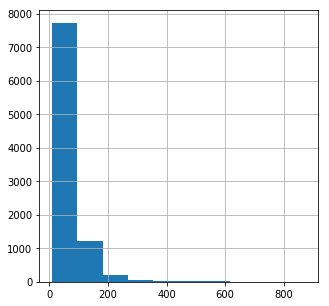

In [27]:
#Puedo ver la distribución también con un histograma
house_madrid['Price'].hist(figsize=(5,5));

### Experiences Offered

Compruebo los valores que puede tener esta caractística

In [28]:
house_madrid ['Experiences Offered'].value_counts()


none    9266
Name: Experiences Offered, dtype: int64

Todo el listado tiene en esta característica el valor none, por tanto la puedo eliminar

In [29]:
house_madrid.drop (['Experiences Offered'], axis=1, inplace=True)

### Host Since
Esta característica representa el momento en el que el propietario se une a Airbnb. Es una columna que habría que tranformar para que fuera de tipo datatime. Una vez transformada la voy a convertir en una medida del número de dias que ha estado la vivienda en la plataforma tomando la fecha de scraped de datos que era 8 de abril del 2017. Creo por tanto una nueva columna que se llamará Dias_activo y al final podré eliminar la columna Host Since

In [30]:
#Convierto a datatime
house_madrid ['Host Since'] = pd.to_datetime(house_madrid ['Host Since']) 
# Calculo el número de dias
house_madrid['Dias_activo'] = (datetime(2017, 4, 8) - house_madrid['Host Since']).astype('timedelta64[D]')
# Media y mediana
print("Media de dias como host:", round(house_madrid['Dias_activo'].mean(),0))
print("Mediana de dias como host:", house_madrid['Dias_activo'].median())

# Si hay valores nulos los sustituyo por la mediana
mediana_host_since = house_madrid.Dias_activo.median()  #Guardo este valor para usarlo después con las muestras de test
house_madrid.Dias_activo.fillna(house_madrid.Dias_activo.median(), inplace=True)


Media de dias como host: 906.0
Mediana de dias como host: 788.0


In [31]:
house_madrid.head(3)

,Price,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features,Dias_activo
0,85.0,2012-01-25,within an hour,100,40,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",150,40,2,20,2,1125,today,0,0,0,0,9,2014-04-02,2014-10-20,93,10,9,9,9,10,9,strict,0.24,"Host Has Profile Pic,Host Identity Verified,Is...",1900.0
1,49.0,2014-06-20,within an hour,100,1,Embajadores,Apartment,Entire home/apt,4,1,1,2,Real Bed,"Internet,Wireless Internet,Air conditioning,Ki...",99,20,2,10,1,1125,today,4,16,33,298,182,2014-08-09,2017-03-27,92,9,9,10,10,10,9,flexible,5.61,"Host Has Profile Pic,Host Identity Verified,Is...",1023.0
2,33.0,2016-08-05,within an hour,100,3,Goya,Apartment,Private room,2,1,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,E...",NaN,NaN,1,0,1,1125,yesterday,5,26,45,135,38,2016-09-12,2017-03-19,97,10,9,10,10,10,10,flexible,5.45,"Host Has Profile Pic,Host Identity Verified,Re...",246.0


Tras realizar la transformación elimino la columna original

In [32]:

house_madrid.drop (['Host Since'], axis=1, inplace=True)

### Host Response Time

Esta característica indica el promedio de tiempo que tarda el host en responder a los mensajes. Es de tipo categórico

In [33]:
print("Valores nulos:", house_madrid['Host Response Time'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Host Response Time'].isna().sum()/len(house_madrid))*100, 1)}%")



Valores nulos: 1157
Proporcion: 12.5%


Un 12,5% es desconocido. Voy a ver el resto de posibles valores

In [34]:
house_madrid ['Host Response Time'].value_counts()

within an hour        4995
within a few hours    1862
within a day          1075
a few days or more     177
Name: Host Response Time, dtype: int64

A los valores nulos le voy a dar la categoría de 'desconocido'

In [35]:
house_madrid ['Host Response Time'].fillna("unknown", inplace=True)

In [36]:
house_madrid ['Host Response Time'].value_counts()

within an hour        4995
within a few hours    1862
unknown               1157
within a day          1075
a few days or more     177
Name: Host Response Time, dtype: int64

Tenemos por tanto que 'Host Response Time' es una variable categórica con 5 posibles valores. 

### Host Response Rate

Esta característica representa el porcentaje de mensajes a los que el anfitrión responde. Es de tipo continuo. 



In [37]:
house_madrid ['Host Response Rate'] = pd.to_numeric(house_madrid ['Host Response Rate']) 

Voy a comprobar al igual que antes el número de nulos que tengo


In [38]:
print("Valores nulos:", house_madrid['Host Response Rate'].isna().sum())
print(f"Proporcion: {round((house_madrid['Host Response Rate'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 1157
Proporcion: 12.5%


Miro la mediana y media de esta característica y también el porcentaje que hay del 100%

In [39]:
print("Media host response rate:", round(house_madrid['Host Response Rate'].mean(),0))
print("Mediana host response rate:", house_madrid['Host Response Rate'].median())
print(f"Proporcion de 100% host response rates: {round(((house_madrid['Host Response Rate'] == 100.0).sum()/house_madrid['Host Response Rate'].count())*100,1)}%")

Media host response rate: 95.0
Mediana host response rate: 100.0
Proporcion de 100% host response rates: 77.1%


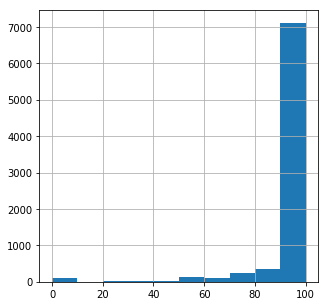

In [40]:
#Puedo ver la distribución también con un histograma
house_madrid['Host Response Rate'].hist(figsize=(5,5));

In [41]:
# Los agrupo en 4 categorías
house_madrid['Host Response Rate'] = pd.cut(house_madrid['Host Response Rate'], 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Convierto a cadena
house_madrid['Host Response Rate'] = house_madrid['Host Response Rate'].astype('str')

# Sustituyo los null por 'unknown'
house_madrid['Host Response Rate'].replace('nan', 'unknown', inplace=True)

# 
house_madrid['Host Response Rate'].value_counts()

100%       6253
unknown    1157
50-89%      921
90-99%      651
0-49%       284
Name: Host Response Rate, dtype: int64

La transformo en una variable de tipo categórico

### Host Listings Count

Esta característica representa el número de viviendas que tiene el anfitrión en total y es de tipo continuo.



In [42]:
house_madrid ['Host Listings Count'] = pd.to_numeric(house_madrid ['Host Listings Count']) 

Voy a comprobar si tengo valores nulos

In [43]:
print("Valores nulos:", house_madrid['Host Listings Count'].isna().sum())
print(f"Proporcion: {round((house_madrid['Host Listings Count'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 2
Proporcion: 0.0%


Miro la mediana y media de esta característica

In [44]:
print("Media Host Listings Count:", round(house_madrid['Host Listings Count'].mean(),0))
print("Mediana Host Listings Count:", house_madrid['Host Listings Count'].median())


Media Host Listings Count: 10.0
Mediana Host Listings Count: 2.0


Los 2 valores nulos los sustiuiré  por la mediana una vez haga tratamiento de outliers

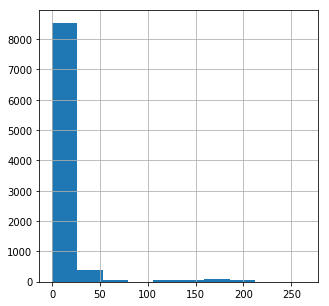

In [45]:
#Puedo ver la distribución también con un histograma
house_madrid['Host Listings Count'].hist(figsize=(5,5));

### Neighbourhood Cleansed

Esta característica representa el barrio de Madrid en el que está la vivienda y es de tipo categórico
Voy a comprobar los valores que tiene. Al principio ya comprobé que no tenía nulos. De todas formas para el caso de presentación de nuevos valores si hubiera nulos los elimino

In [46]:
house_madrid.dropna(subset=['Neighbourhood Cleansed'], inplace=True) 

In [47]:
house_madrid ['Neighbourhood Cleansed'].value_counts()

Embajadores    1289
Universidad     924
Palacio         784
Sol             675
               ... 
Hellín            2
El Goloso         2
El Plantío        2
Rosas             1
Name: Neighbourhood Cleansed, Length: 124, dtype: int64

Tengo 124 categorías. 

Son demasiadas categorias y además en las muestras de test o nuevas muestras pueden venir nuevos barrios que aquí no aparezcan. Lo que voy a hacer es quedarme con los 20 más frecuentes y el resto los agrupo como "Otro Barrio". Para las muestras de test o nuevas muestras compararé con los 20 más frecuentes de train y pondré "Otro Barrio" caso que no coincidan

In [48]:
barrios_frecuentes =  (list (house_madrid ['Neighbourhood Cleansed'].value_counts().index [0:20]))
barrios_frecuentes


['Embajadores',
 'Universidad',
 'Palacio',
 'Sol',
 'Justicia',
 'Cortes',
 'Trafalgar',
 'Argüelles',
 'Palos de Moguer',
 'Goya',
 'Puerta del Angel',
 'Guindalera',
 'Arapiles',
 'Recoletos',
 'Almagro',
 'Acacias',
 'Lista',
 'Pacífico',
 'Gaztambide',
 'Cuatro Caminos']

In [49]:
house_madrid['Neighbourhood Cleansed'] [~house_madrid['Neighbourhood Cleansed'].isin(barrios_frecuentes)]='Otro_Barrio'

In [50]:
house_madrid ['Neighbourhood Cleansed'].value_counts()

Otro_Barrio       2644
Embajadores       1289
Universidad        924
Palacio            784
                  ... 
Pacífico            95
Lista               95
Cuatro Caminos      94
Gaztambide          94
Name: Neighbourhood Cleansed, Length: 21, dtype: int64

### Property Type

Esta característica representa el tipo de propiedad y es de tipo categórico. Al principio ya comprobé que no tenía nulos la muestra de train.
Veo sus posibles valores

In [51]:
house_madrid ['Property Type'].value_counts()

Apartment          7695
House               667
Bed & Breakfast     229
Condominium         229
                   ... 
Casa particular       2
Camper/RV             1
Bungalow              1
Tent                  1
Name: Property Type, Length: 20, dtype: int64

Veo que la mayoritaria es "Apartment" por tanto caso de que aparezcan datos nuevos y tengan un null en esta característica les asociaré "Apartment"

In [52]:
house_madrid ['Property Type'] [house_madrid ['Property Type'].isnull()]="Apartment"

Revisando las categorias se ve que se puede agrupar ya que hay algunas que tienen muy pocas viviendas. Podemos usar como categorías: Apartment, House y Other. El resto las vamos a agrupar en cada una de estas categorías

In [53]:
tipos_propiedades =  (list (house_madrid ['Property Type'].value_counts().index [:]))
tipos_propiedades     #Lo voy a usar despues en test

['Apartment',
 'House',
 'Bed & Breakfast',
 'Condominium',
 'Loft',
 'Other',
 'Dorm',
 'Guesthouse',
 'Chalet',
 'Hostel',
 'Serviced apartment',
 'Townhouse',
 'Boutique hotel',
 'Guest suite',
 'Villa',
 'Earth House',
 'Casa particular',
 'Camper/RV',
 'Bungalow',
 'Tent']

In [54]:
# Sustituyo categorias por House ó Aparment ó Other
house_madrid ['Property Type'].replace({
    'Condominium': 'Other',
    'Bed & Breakfast': 'Other',  
    'Loft': 'Apartment',
    'Dorm': 'Other',
    'Guesthouse': 'Other',
    'Chalet': 'House',
    'Hostel':  'Other',
    'Serviced apartment': 'Apartment',  
    'Townhouse': 'House',
    'Boutique hotel': 'Other',
    'Villa': 'House',
    'Earth House': 'House',
    'Guest suite': 'Other',
    'Casa particular': 'House',
    'Camper/RV': 'Other',
    'Boat': 'Other',
    'Tent': 'Other',
    'Timeshare': 'Other',  
    'Bungalow': 'House',
    
    }, inplace=True)

In [55]:
house_madrid ['Property Type'].value_counts()

Apartment    7901
House         697
Other         668
Name: Property Type, dtype: int64

Las tengo agrupadas en 3 categorías 

### Room Type

Esta característica representa el tipo de vivienda y es de tipo categórico. Al principio ya comprobé que no tenía nulos. Veamos sus posibles valores:

In [56]:
house_madrid ['Room Type'].value_counts()

Entire home/apt    5579
Private room       3556
Shared room         131
Name: Room Type, dtype: int64

En este caso a los valores nulos si los hubiera en nuevos datos les voy a asignar la categoría mas frecuente

In [57]:
house_madrid ['Room Type'] [house_madrid ['Room Type'].isnull()]="Entire home/apt"

### Accommodates

Es una característica de tipo numérico que representa el número de personas que se pueden alojar en la propiedad. Ya se vio al principio que no tenía valores nulos

In [58]:
house_madrid ['Accommodates'] = pd.to_numeric(house_madrid ['Accommodates']) 

In [59]:
house_madrid ['Accommodates'].value_counts()

2     3299
4     2096
1     1347
3      934
      ... 
11       9
14       8
13       3
15       1
Name: Accommodates, Length: 16, dtype: int64

Miro la mediana y media de esta característica

In [60]:
print("Media Accommodates:", round(house_madrid['Accommodates'].mean(),0))
print("Mediana Accommodates:", house_madrid['Accommodates'].median())
    

Media Accommodates: 3.0
Mediana Accommodates: 2.0


Caso de que hubiera valores nulos en nuevos datos les asigno la mediana

In [61]:
mediana_accomodates = house_madrid['Accommodates'].median()  #lo guardo para usarlo después en test
house_madrid['Accommodates'].fillna(house_madrid['Accommodates'].median(), inplace=True)

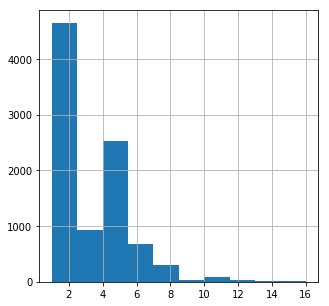

In [62]:
#Puedo ver la distribución también con un histograma
house_madrid['Accommodates'].hist(figsize=(5,5));

### Bathrooms

Variable de tipo numérico que representa el número de cuartos de baño de la vivienda. Al principio vi que tenía algunos valores nulos:

In [63]:
house_madrid ['Bathrooms'] = pd.to_numeric(house_madrid ['Bathrooms']) 

In [64]:
print("Valores nulos:", house_madrid['Bathrooms'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Bathrooms'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 34
Proporcion: 0.4%


Voy a sustituir los valores nulos por la mediana

In [65]:
print("Media Bathrooms:", round(house_madrid['Bathrooms'].mean(),0))
print("Mediana Bathrooms:", house_madrid['Bathrooms'].median())

Media Bathrooms: 1.0
Mediana Bathrooms: 1.0


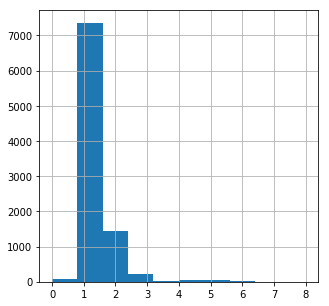

In [66]:
#Puedo ver la distribución también con un histograma
house_madrid['Bathrooms'].hist(figsize=(5,5));

In [67]:
mediana_bathrooms = house_madrid['Bathrooms'].median()  #Lo guardo para usarlo después en test
house_madrid['Bathrooms'].fillna(house_madrid['Bathrooms'].median(), inplace=True)

In [68]:
#Compruebo que ya no tengo nulos
print("Valores nulos:", house_madrid['Bathrooms'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Bathrooms'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


### Bedrooms

Variable de tipo numérico que representa el número de dormitorios de la vivienda. Al principio vi que tenía algunos valores nulos:

In [69]:
house_madrid ['Bedrooms'] = pd.to_numeric(house_madrid ['Bedrooms']) 

In [70]:
print("Valores nulos:", house_madrid['Bedrooms'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Bedrooms'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 18
Proporcion: 0.2%


Voy a sustituir los valores nulos por la mediana

In [71]:
print("Media Bedrooms:", round(house_madrid['Bedrooms'].mean(),0))
print("Mediana Bedrooms:", house_madrid['Bedrooms'].median())

Media Bedrooms: 1.0
Mediana Bedrooms: 1.0


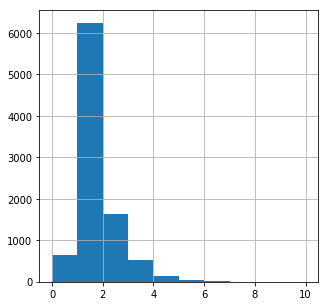

In [72]:
#Puedo ver la distribución también con un histograma
house_madrid['Bedrooms'].hist(figsize=(5,5));

In [73]:
mediana_bedrooms = house_madrid['Bedrooms'].median()    #Lo guardo para usarlo después en test
house_madrid['Bedrooms'].fillna(house_madrid['Bedrooms'].median(), inplace=True)

In [74]:
#Compruebo que ya no tengo nulos
print("Valores nulos:", house_madrid['Bedrooms'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Bedrooms'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


### Beds

Variable de tipo numérico que representa el número de camas de la vivienda. Al principio vi que tenía algunos valores nulos:

In [75]:
house_madrid ['Beds'] = pd.to_numeric(house_madrid ['Beds']) 

In [76]:
print("Valores nulos:", house_madrid['Beds'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Beds'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 33
Proporcion: 0.4%


Voy a sustituir los valores nulos por la mediana

In [77]:
print("Media Beds:", round(house_madrid['Beds'].mean(),0))
print("Mediana Beds:", house_madrid['Beds'].median())

Media Beds: 2.0
Mediana Beds: 1.0


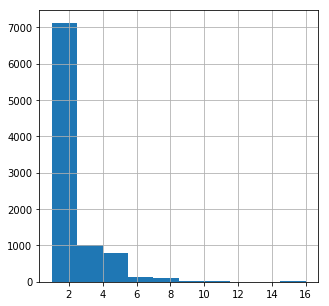

In [78]:
#Puedo ver la distribución también con un histograma
house_madrid['Beds'].hist(figsize=(5,5));

In [79]:
mediana_beds = house_madrid['Beds'].median()   #Lo guardo para usarlo después en test
house_madrid['Beds'].fillna(house_madrid['Beds'].median(), inplace=True)

In [80]:
#Compruebo que ya no tengo nulos
print("Valores nulos:", house_madrid['Beds'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Beds'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


### Bed Type

Esta característica representa el tipo cama y es de tipo categórico. Vi al principio que no tenía valores nulos

Voy a comprobar los valores que tiene:


In [81]:
house_madrid ['Bed Type'].value_counts()

Real Bed         9064
Pull-out Sofa     158
Futon              27
Couch              12
Airbed              5
Name: Bed Type, dtype: int64

La mayoria de las viviendas tiene el mismo tipo de capa "Real Bed", hay muy pocas que tenga otro tipo de cama por lo que esta característica no representa ninguna ventaja y no va a influir en el precio, así que la elimino

In [82]:
house_madrid.drop('Bed Type', axis=1, inplace=True)

In [83]:
house_madrid.head(5)

,Price,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Amenities,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features,Dias_activo
0,85.0,within an hour,100%,40.0,Sol,Apartment,Entire home/apt,4,1.0,1.0,2.0,"TV,Internet,Wireless Internet,Air conditioning...",150,40,2,20,2,1125,today,0,0,0,0,9,2014-04-02,2014-10-20,93,10,9,9,9,10,9,strict,0.24,"Host Has Profile Pic,Host Identity Verified,Is...",1900.0
1,49.0,within an hour,100%,1.0,Embajadores,Apartment,Entire home/apt,4,1.0,1.0,2.0,"Internet,Wireless Internet,Air conditioning,Ki...",99,20,2,10,1,1125,today,4,16,33,298,182,2014-08-09,2017-03-27,92,9,9,10,10,10,9,flexible,5.61,"Host Has Profile Pic,Host Identity Verified,Is...",1023.0
2,33.0,within an hour,100%,3.0,Goya,Apartment,Private room,2,1.0,1.0,1.0,"TV,Wireless Internet,Kitchen,Smoking allowed,E...",NaN,NaN,1,0,1,1125,yesterday,5,26,45,135,38,2016-09-12,2017-03-19,97,10,9,10,10,10,10,flexible,5.45,"Host Has Profile Pic,Host Identity Verified,Re...",246.0
3,35.0,unknown,unknown,1.0,Otro_Barrio,Apartment,Entire home/apt,6,1.0,3.0,4.0,"TV,Wireless Internet,Kitchen,Smoking allowed,F...",NaN,NaN,1,0,2,9,12 months ago,0,0,0,0,2,2016-04-05,2016-04-05,80,NaN,NaN,NaN,NaN,NaN,NaN,flexible,0.16,"Host Has Profile Pic,Is Location Exact,Require...",703.0
4,54.0,unknown,unknown,4.0,Otro_Barrio,Apartment,Entire home/apt,3,1.0,2.0,2.0,"TV,Wireless Internet,Kitchen,Smoking allowed,H...",100,30,1,10,2,1125,today,9,29,59,150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,NaN,"Host Has Profile Pic,Is Location Exact,Require...",10.0


### Amenities

Esta columna contiene un listado de comodidades de la vivienda

In [84]:
#Esto es un ejemplo de como vienen listadas esas comodidades
house_madrid ['Amenities'][:1].values

array(['TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Smoking allowed,Pets allowed,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Essentials'],
      dtype=object)

Vi también al principio que había valores nulos:

In [85]:
print("Valores nulos:", house_madrid['Amenities'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Amenities'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 81
Proporcion: 0.9%


Como voy a hacer un tratamiento de cadenas de caracteres a esos valores nulos les voy a asignar la cadena "nada"

In [86]:
house_madrid['Amenities'].fillna("nada", inplace=True)

In [87]:
#Creo un conjunto con las "amenities" que me encuentro en el dataset
amenities_list = list(house_madrid ['Amenities'])
amenities_list_string = "".join(str(amenities_list))
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', '')
amenities_list_string = amenities_list_string.replace("'", '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'24-hour check-in',
 'Air conditioning',
 'Baby bath',
 'Babysitter recommendations',
 'Bathtub',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Crib',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'Elevator in building',
 'Essentials',
 'Family/kid friendly',
 'Fire extinguisher',
 'First aid kit',
 'Free parking on premises',
 'Free parking on street',
 'Game console',
 'Gym',
 'Hair dryer',
 'Hangers',
 'Heating',
 'High chair',
 'Hot tub',
 'Indoor fireplace',
 'Internet',
 'Iron',
 'Keypad',
 'Kitchen',
 'Laptop friendly workspace',
 'Lock on bedroom door',
 'Lockbox',
 'Other pet(s)',
 'Outlet covers',
 'Pack ’n Play/travel crib',
 'Paid parking off premises',
 'Pets allowed',
 'Pets live on this property',
 'Pool',
 'Private entrance',
 'Private living room',
 'Room-darkening shades',
 'Safety card',
 'Self Check-In',
 'Shampoo',
 'Smartlock',
 'Smoke detector',
 'Sm

In [88]:
#Añado al dataset una columna por cada Amenities. Después eliminaré algunas
for amenities in amenities_set:
    house_madrid.loc[house_madrid['Amenities'].str.contains(amenities), amenities] = 1
    
    

In [89]:
indice = house_madrid.columns.get_loc("Dias_activo")+1

In [90]:
# Los nulos de las nuevas columnas que he añadido los sustituyo por 0 

cols_to_replace_nulls = house_madrid.iloc[:,indice:].columns
house_madrid[cols_to_replace_nulls] = house_madrid[cols_to_replace_nulls].fillna(0)

In [91]:
house_madrid.head(2)

,Price,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Amenities,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features,Dias_activo,Lock on bedroom door,Free parking on premises,Lockbox,Fire extinguisher,Hair dryer,Stair gates,Doorman Entry,High chair,Elevator in building,Children’s dinnerware,Wheelchair accessible,Shampoo,Bathtub,Smoke detector,Indoor fireplace,Pets live on this property,Wireless Internet,Pack ’n Play/travel crib,Babysitter recommendations,Table corner guards,Doorman,Baby bath,Buzzer/wireless intercom,Dryer,Outlet covers,Kitchen,Pets allowed,Hot tub,Smoking allowed,24-hour check-in,Free parking on street,Family/kid friendly,Gym,Private entrance,Cable TV,Dog(s),Smartlock,Children’s books and toys,Washer / Dryer,TV,Game console,Window guards,Hangers,Keypad,Self Check-In,Laptop friendly workspace,translation missing: en.hosting_amenity_50,Essentials,First aid kit,Room-darkening shades,Iron,Pool,Other pet(s),Heating,Carbon monoxide detector,Breakfast,Crib,Paid parking off premises,Suitable for events,translation missing: en.hosting_amenity_49,nada,Cat(s),Washer,Private living room,Internet,Safety card,Air conditioning
0,85.0,within an hour,100%,40.0,Sol,Apartment,Entire home/apt,4,1.0,1.0,2.0,"TV,Internet,Wireless Internet,Air conditioning...",150,40,2,20,2,1125,today,0,0,0,0,9,2014-04-02,2014-10-20,93,10,9,9,9,10,9,strict,0.24,"Host Has Profile Pic,Host Identity Verified,Is...",1900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,49.0,within an hour,100%,1.0,Embajadores,Apartment,Entire home/apt,4,1.0,1.0,2.0,"Internet,Wireless Internet,Air conditioning,Ki...",99,20,2,10,1,1125,today,4,16,33,298,182,2014-08-09,2017-03-27,92,9,9,10,10,10,9,flexible,5.61,"Host Has Profile Pic,Host Identity Verified,Is...",1023.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


Puedo reducir el número de características nuevas añadidas eliminando aquellas comodidades que añadan poca información o que no sea útiles para diferenciar las viviendas. Las comodidades que contenga menos del 10% de viviendas se podrían borrar


In [92]:
infrequent_amenities = []
for col in house_madrid.iloc[:,indice:].columns:
    if house_madrid[col].sum() < len(house_madrid)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)



['Lock on bedroom door', 'Free parking on premises', 'Lockbox', 'Stair gates', 'Doorman Entry', 'High chair', 'Children’s dinnerware', 'Bathtub', 'Indoor fireplace', 'Pets live on this property', 'Pack ’n Play/travel crib', 'Babysitter recommendations', 'Table corner guards', 'Baby bath', 'Outlet covers', 'Hot tub', 'Free parking on street', 'Gym', 'Private entrance', 'Cable TV', 'Dog(s)', 'Smartlock', 'Children’s books and toys', 'Washer / Dryer', 'Game console', 'Window guards', 'Keypad', 'Self Check-In', 'Room-darkening shades', 'Pool', 'Other pet(s)', 'Crib', 'Paid parking off premises', 'Suitable for events', 'nada', 'Cat(s)', 'Private living room']


In [93]:
# Elimino las menos frecuentes
house_madrid.drop(infrequent_amenities, axis=1, inplace=True)



In [94]:
#Las "amenities" que quedan
indice = house_madrid.columns.get_loc("Dias_activo")+1
house_madrid.columns[indice:]

Index(['Fire extinguisher', 'Hair dryer', 'Elevator in building',
       'Wheelchair accessible', 'Shampoo', 'Smoke detector',
       'Wireless Internet', 'Doorman', 'Buzzer/wireless intercom', 'Dryer',
       'Kitchen', 'Pets allowed', 'Smoking allowed', '24-hour check-in',
       'Family/kid friendly', 'TV', 'Hangers', 'Laptop friendly workspace',
       'translation missing: en.hosting_amenity_50', 'Essentials',
       'First aid kit', 'Iron', 'Heating', 'Carbon monoxide detector',
       'Breakfast', 'translation missing: en.hosting_amenity_49', 'Washer',
       'Internet', 'Safety card', 'Air conditioning'],
      dtype='object')

Voy a comprobar los valores de cada una de ellas ya que si hay un alto porcentaje del valor 1 las puedo eliminar. Voy a poner mas de un 90%

In [95]:
indice = house_madrid.columns.get_loc("Dias_activo")+1

In [96]:
frequent_amenities = []
for col in house_madrid.iloc[:,indice:].columns:
    if house_madrid[col].sum() > len(house_madrid)*90/100:
        frequent_amenities.append(col)
print(frequent_amenities)

['Wireless Internet', 'Kitchen', 'Heating', 'Internet']


Elimino las más frecuentes >90%

In [97]:
house_madrid.drop(frequent_amenities, axis=1, inplace=True)

In [98]:
house_madrid.head(2)

,Price,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Amenities,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features,Dias_activo,Fire extinguisher,Hair dryer,Elevator in building,Wheelchair accessible,Shampoo,Smoke detector,Doorman,Buzzer/wireless intercom,Dryer,Pets allowed,Smoking allowed,24-hour check-in,Family/kid friendly,TV,Hangers,Laptop friendly workspace,translation missing: en.hosting_amenity_50,Essentials,First aid kit,Iron,Carbon monoxide detector,Breakfast,translation missing: en.hosting_amenity_49,Washer,Safety card,Air conditioning
0,85.0,within an hour,100%,40.0,Sol,Apartment,Entire home/apt,4,1.0,1.0,2.0,"TV,Internet,Wireless Internet,Air conditioning...",150,40,2,20,2,1125,today,0,0,0,0,9,2014-04-02,2014-10-20,93,10,9,9,9,10,9,strict,0.24,"Host Has Profile Pic,Host Identity Verified,Is...",1900.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49.0,within an hour,100%,1.0,Embajadores,Apartment,Entire home/apt,4,1.0,1.0,2.0,"Internet,Wireless Internet,Air conditioning,Ki...",99,20,2,10,1,1125,today,4,16,33,298,182,2014-08-09,2017-03-27,92,9,9,10,10,10,9,flexible,5.61,"Host Has Profile Pic,Host Identity Verified,Is...",1023.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


Veo también que hay amenities que comienzan por "translation missing: " que se ve que debe ser algún error del scraper. Esas las voy a eliminar también

In [99]:
indice = house_madrid.columns.get_loc("Dias_activo")+1

In [100]:
translation_missing = []
for col in house_madrid.iloc[:,indice:].columns:
    if 'translation missing' in col:
        translation_missing.append(col)
print(translation_missing)

['translation missing: en.hosting_amenity_50', 'translation missing: en.hosting_amenity_49']


In [101]:
house_madrid.drop(translation_missing, axis=1, inplace=True)

In [102]:
#Las "amenities" que quedan
indice = house_madrid.columns.get_loc("Dias_activo")+1
amenities_def = house_madrid.columns[indice:]
amenities_def   #Lo usaré después para train

Index(['Fire extinguisher', 'Hair dryer', 'Elevator in building',
       'Wheelchair accessible', 'Shampoo', 'Smoke detector', 'Doorman',
       'Buzzer/wireless intercom', 'Dryer', 'Pets allowed', 'Smoking allowed',
       '24-hour check-in', 'Family/kid friendly', 'TV', 'Hangers',
       'Laptop friendly workspace', 'Essentials', 'First aid kit', 'Iron',
       'Carbon monoxide detector', 'Breakfast', 'Washer', 'Safety card',
       'Air conditioning'],
      dtype='object')

In [103]:
#Finalmente elimino la columna original "Amenities"

house_madrid.drop('Amenities', axis=1, inplace=True)

In [104]:
house_madrid.head(2)

,Price,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features,Dias_activo,Fire extinguisher,Hair dryer,Elevator in building,Wheelchair accessible,Shampoo,Smoke detector,Doorman,Buzzer/wireless intercom,Dryer,Pets allowed,Smoking allowed,24-hour check-in,Family/kid friendly,TV,Hangers,Laptop friendly workspace,Essentials,First aid kit,Iron,Carbon monoxide detector,Breakfast,Washer,Safety card,Air conditioning
0,85.0,within an hour,100%,40.0,Sol,Apartment,Entire home/apt,4,1.0,1.0,2.0,150,40,2,20,2,1125,today,0,0,0,0,9,2014-04-02,2014-10-20,93,10,9,9,9,10,9,strict,0.24,"Host Has Profile Pic,Host Identity Verified,Is...",1900.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49.0,within an hour,100%,1.0,Embajadores,Apartment,Entire home/apt,4,1.0,1.0,2.0,99,20,2,10,1,1125,today,4,16,33,298,182,2014-08-09,2017-03-27,92,9,9,10,10,10,9,flexible,5.61,"Host Has Profile Pic,Host Identity Verified,Is...",1023.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


### Security Deposit

Representa la cantidad que se requiere como deposito. Es de tipo numérico. Vimos al principio que tenía valores nulos:

In [105]:
house_madrid ['Security Deposit'] = pd.to_numeric(house_madrid ['Security Deposit']) 

In [106]:
print("Valores nulos:", house_madrid['Security Deposit'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Security Deposit'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 5255
Proporcion: 56.7%


En este caso los valores nulos los transformo en 0 al ser un precio. 

In [107]:
house_madrid['Security Deposit'].fillna(0, inplace=True)

In [108]:
#Compruebo que no queden valores nulos
print("Valores nulos:", house_madrid['Security Deposit'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Security Deposit'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


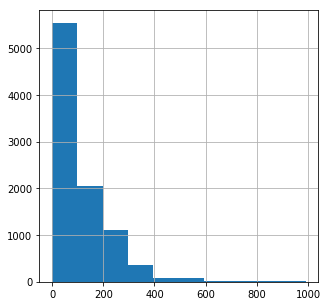

In [109]:
#Puedo ver la distribución también con un histograma
house_madrid['Security Deposit'].hist(figsize=(5,5));

### Cleaning Fee	

Representa la tasa que habría que pagar por limpieza. Es de tipo numérico. También tiene valores nulos:

In [110]:
house_madrid ['Cleaning Fee'] = pd.to_numeric(house_madrid ['Cleaning Fee']) 

In [111]:
print("Valores nulos:", house_madrid['Cleaning Fee'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Cleaning Fee'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 3734
Proporcion: 40.3%


Igual que antes sustituyo los valores nulos por 0 al tratarse de un precio. El tipo de datos es float

In [112]:
house_madrid['Cleaning Fee'].fillna(0, inplace=True)

In [113]:
#Compruebo que no queden valores nulos
print("Valores nulos:", house_madrid['Cleaning Fee'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Cleaning Fee'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


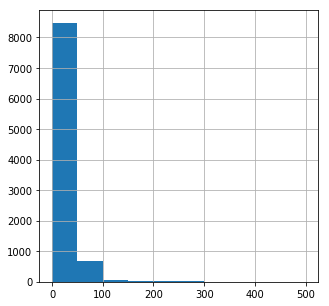

In [114]:
#Puedo ver la distribución también con un histograma
house_madrid['Cleaning Fee'].hist(figsize=(5,5));

### Guests Included

Representa el número de invitados incluidos. Es de tipo int y no tiene valores nulos

In [115]:
house_madrid ['Guests Included'] = pd.to_numeric(house_madrid ['Guests Included']) 

In [116]:
print("Valores nulos:", house_madrid['Guests Included'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Guests Included'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


Caso de que nuevos valores tuvieran valores nulos los remplazo por la mediana

In [117]:
print("Media Guests Included:", round(house_madrid['Guests Included'].mean(),0))
print("Mediana Guests Included:", house_madrid['Guests Included'].median())

Media Guests Included: 2.0
Mediana Guests Included: 1.0


In [118]:
mediana_guests_included = house_madrid['Guests Included'].median()  #lo guardo para usarlo después en test
house_madrid['Guests Included'].fillna(house_madrid['Guests Included'].median(), inplace=True)

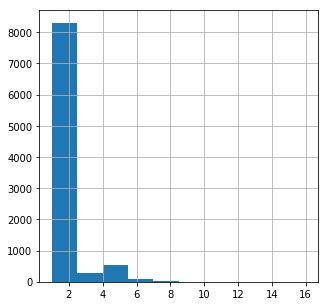

In [119]:
#Puedo ver la distribución también con un histograma
house_madrid['Guests Included'].hist(figsize=(5,5));

### Extra People

Representa el añadido de precio por persona extra. Es de tipo int y no tiene valores nulos:


In [120]:
house_madrid ['Extra People'] = pd.to_numeric(house_madrid ['Extra People']) 

In [121]:
print("Valores nulos:", house_madrid['Extra People'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Extra People'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


Caso de que nuevos valores tuvieran valores nulos los remplazo por la mediana cuando haga el tratamiento de outliers

In [122]:
print("Media Extra People:", round(house_madrid['Extra People'].mean(),0))
print("Mediana Extra People:", house_madrid['Extra People'].median())

Media Extra People: 7.0
Mediana Extra People: 5.0


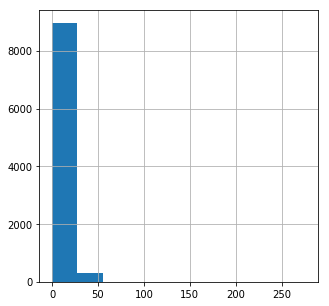

In [123]:
#Puedo ver la distribución también con un histograma
house_madrid['Extra People'].hist(figsize=(5,5));

### Minimum Nights

Representa el mínimo número de noches para la estancia. Es de tipo int y no tiene valores nulos.


In [124]:
house_madrid ['Minimum Nights'] = pd.to_numeric(house_madrid ['Minimum Nights']) 

In [125]:
print("Valores nulos:", house_madrid['Minimum Nights'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Minimum Nights'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


Caso de que nuevos valores tuvieran valores nulos los remplazo por la mediana tras el tratamiento de outliers

In [126]:
print("Media Minimum Nights:", round(house_madrid['Minimum Nights'].mean(),0))
print("Mediana Minimum Nights:", house_madrid['Minimum Nights'].median())

Media Minimum Nights: 3.0
Mediana Minimum Nights: 2.0


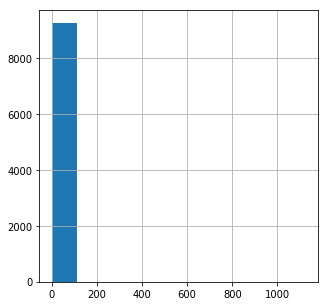

In [127]:
#Puedo ver la distribución también con un histograma
house_madrid['Minimum Nights'].hist(figsize=(5,5));

### Maximum Nights

El número máximo de noches que puede durar la estancia. Es de tipo int y no tiene valores nulos

In [128]:
house_madrid ['Maximum Nights'] = pd.to_numeric(house_madrid ['Maximum Nights']) 

In [129]:
print("Valores nulos:", house_madrid['Maximum Nights'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Maximum Nights'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


Caso de que nuevos valores tuvieran valores nulos los remplazo por la mediana cuando se haga el tratamiento de missings

In [130]:
print("Media Maximum Nights:", round(house_madrid['Maximum Nights'].mean(),0))
print("Mediana Maximum Nights:", house_madrid['Maximum Nights'].median())

Media Maximum Nights: 996.0
Mediana Maximum Nights: 1125.0


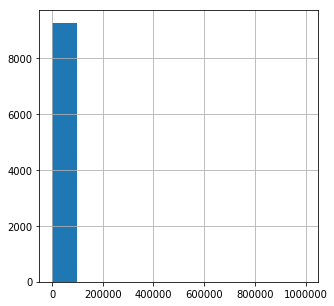

In [131]:
#Puedo ver la distribución también con un histograma
house_madrid['Maximum Nights'].hist(figsize=(5,5));

### Calendar Updated

Representa cuando realizó el anfitrión la última actualización del calendario. Esta columna no debe afectar al precio así que la voy a eliminar

In [132]:
house_madrid.drop('Calendar Updated', axis=1, inplace=True)

### Availability

Representa cuantas noches está disponibles para ser alquilado en los próximos, 30, 60, 90 y 365 dias
Vemos que tenemos 4 características: Availability 30, Availability 60, Availability 90, Availability 365. La 4 estarán correladas unas con otras así que me voy a quedar solo con una Availability 90, ya que en muchos sitios el límite legal de alquilér para este tipo de viviendas es de 90 dias. Elimino por tanto las otras columnas

In [133]:
house_madrid.drop(['Availability 30', 'Availability 60', 'Availability 365'], axis=1, inplace=True)

In [134]:
house_madrid ['Availability 90'] = pd.to_numeric(house_madrid ['Availability 90']) 

Si hubiera valores nulos los reemplazo por la mediana

In [135]:
mediana_availability_90 = house_madrid['Availability 90'].median()   #lo guardo para usarlo en test
house_madrid['Availability 90'].fillna(house_madrid['Availability 90'].median(), inplace=True)

### Number of Reviews

Número de reviews que tiene la propiedad. Es de tipo int y no tiene valores nulos.

In [136]:
house_madrid ['Number of Reviews'] = pd.to_numeric(house_madrid ['Number of Reviews']) 

In [137]:
print("Valores nulos:", house_madrid['Number of Reviews'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Number of Reviews'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


Si tuviera valores nulos lo reemplazamos con un 0

In [138]:
house_madrid['Number of Reviews'].fillna(0, inplace=True)

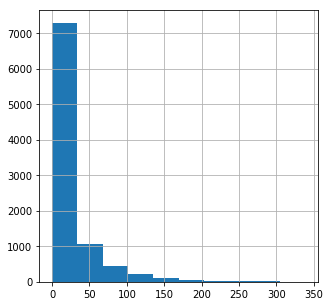

In [139]:
#Puedo ver la distribución también con un histograma
house_madrid['Number of Reviews'].hist(figsize=(5,5));

In [140]:
house_madrid.head(3)

,Price,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features,Dias_activo,Fire extinguisher,Hair dryer,Elevator in building,Wheelchair accessible,Shampoo,Smoke detector,Doorman,Buzzer/wireless intercom,Dryer,Pets allowed,Smoking allowed,24-hour check-in,Family/kid friendly,TV,Hangers,Laptop friendly workspace,Essentials,First aid kit,Iron,Carbon monoxide detector,Breakfast,Washer,Safety card,Air conditioning
0,85.0,within an hour,100%,40.0,Sol,Apartment,Entire home/apt,4,1.0,1.0,2.0,150.0,40.0,2,20,2,1125,0,9,2014-04-02,2014-10-20,93,10,9,9,9,10,9,strict,0.24,"Host Has Profile Pic,Host Identity Verified,Is...",1900.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49.0,within an hour,100%,1.0,Embajadores,Apartment,Entire home/apt,4,1.0,1.0,2.0,99.0,20.0,2,10,1,1125,33,182,2014-08-09,2017-03-27,92,9,9,10,10,10,9,flexible,5.61,"Host Has Profile Pic,Host Identity Verified,Is...",1023.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
2,33.0,within an hour,100%,3.0,Goya,Apartment,Private room,2,1.0,1.0,1.0,0.0,0.0,1,0,1,1125,45,38,2016-09-12,2017-03-19,97,10,9,10,10,10,10,flexible,5.45,"Host Has Profile Pic,Host Identity Verified,Re...",246.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### First Review y Last Review

Las fecha en la que la vivienda recibe la primera y la última review. Compruebo los valores nulos de First Review

In [141]:
print("Valores nulos:", house_madrid['First Review'].isna().sum())
print(f"Proporcion: {round((house_madrid ['First Review'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 1915
Proporcion: 20.7%


Se puede ver que hay un alto porcentaje 20.6% de viviendas que no tienen Reviews. Es un porcentaje demasiado alto para prescindir de esa característica que además es una de las que los usuarios miramos más a la hora de alquilar una casa. Por otro lado el porcentaje también es muy alto para sustituirlo por la media o la mediana. Lo que voy a hacer es categorizar incluyendo una etiqueta de "no review"

En primer lugar transformo First Review a datatime

In [142]:
house_madrid['First Review'] = pd.to_datetime(house_madrid['First Review']) 

Me creo una nueva columna con el número de dias entre la primera review y la fecha del scraper:

In [143]:

house_madrid['time_since_first_review'] = (pd.datetime(2017, 4, 8) - house_madrid['First Review']).astype('timedelta64[D]')

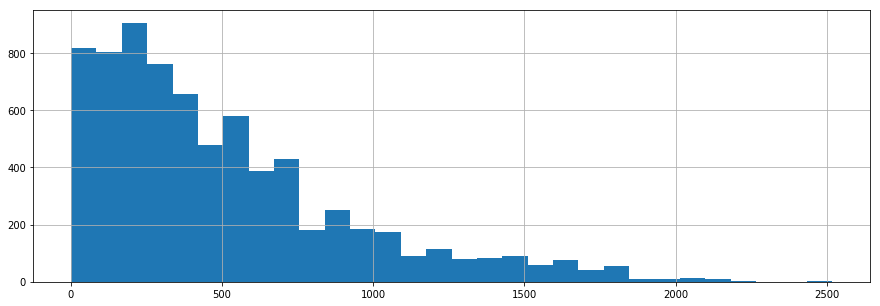

In [144]:
# Distribución del número de dias desde la primera review
house_madrid['time_since_first_review'].hist(figsize=(15,5), bins=30);

In [145]:
#Función de agrupación
def bin_column(col, bins, labels):
    """
    Toma la columna, agrupa por etiquetas y reemplaza el contenido original por la
    nueva etiqueta. Si hay un nulo lo sustituyo por unknown si no se especifica
    Takes in a column name, bin cut points and labels).
    """
    house_madrid[col] = pd.cut(house_madrid[col], bins=bins, labels=labels, include_lowest=True)
    house_madrid[col] = house_madrid[col].astype('str')
    
    

In [146]:
# Agrupación de time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(house_madrid['time_since_first_review'])],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'])

In [147]:
#Los nan los sustituo por 'no reviews'
house_madrid.loc[house_madrid['time_since_first_review'].str.contains('nan'), 'time_since_first_review'] = 'no reviews'

Con esto lo tengo ya convertido a una variable de tipo categórico

Finalmente elimino la columna original First Review 

In [148]:
house_madrid.drop(['First Review'], axis=1, inplace=True)

Realizo el mismo proceso con Last Review

In [149]:
print("Valores nulos:", house_madrid['Last Review'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Last Review'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 1916
Proporcion: 20.7%


In [150]:
#transformo a datatime
house_madrid['Last Review'] = pd.to_datetime(house_madrid['Last Review'])

Me creo una nueva columna con el número de dias entre la primera review y la fecha del scraper:

In [151]:
house_madrid['time_since_last_review'] = (pd.datetime(2017, 4, 8) - house_madrid['Last Review']).astype('timedelta64[D]')

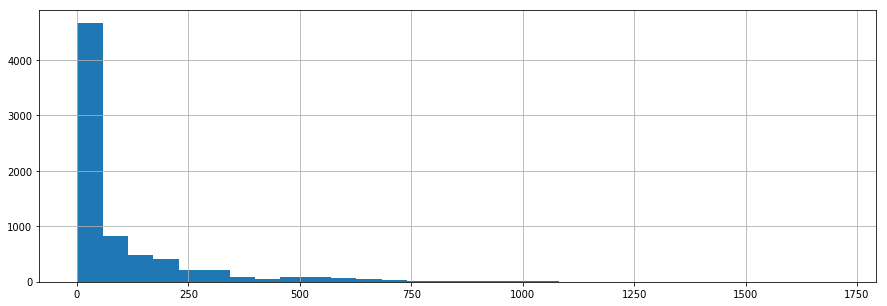

In [152]:
# Distribución del número de dias desde la primera review
house_madrid['time_since_last_review'].hist(figsize=(15,5), bins=30);

In [153]:
# Agrupación
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(house_madrid['time_since_last_review'])],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'])

In [154]:
#Los nan los sustituo por 'no reviews'
house_madrid.loc[house_madrid['time_since_last_review'].str.contains('nan'), 'time_since_last_review'] = 'no reviews'

Con esto lo tengo ya convertido a una variable de tipo categórico.

Finalmente elimino la columna original Last Review

In [155]:
house_madrid.drop(['Last Review'], axis=1, inplace=True)

In [156]:
house_madrid.head(5)

,Price,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features,Dias_activo,Fire extinguisher,Hair dryer,Elevator in building,Wheelchair accessible,Shampoo,Smoke detector,Doorman,Buzzer/wireless intercom,Dryer,Pets allowed,Smoking allowed,24-hour check-in,Family/kid friendly,TV,Hangers,Laptop friendly workspace,Essentials,First aid kit,Iron,Carbon monoxide detector,Breakfast,Washer,Safety card,Air conditioning,time_since_first_review,time_since_last_review
0,85.0,within an hour,100%,40.0,Sol,Apartment,Entire home/apt,4,1.0,1.0,2.0,150.0,40.0,2,20,2,1125,0,9,93,10,9,9,9,10,9,strict,0.24,"Host Has Profile Pic,Host Identity Verified,Is...",1900.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2-3 years,1+ year
1,49.0,within an hour,100%,1.0,Embajadores,Apartment,Entire home/apt,4,1.0,1.0,2.0,99.0,20.0,2,10,1,1125,33,182,92,9,9,10,10,10,9,flexible,5.61,"Host Has Profile Pic,Host Identity Verified,Is...",1023.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2-3 years,0-2 weeks
2,33.0,within an hour,100%,3.0,Goya,Apartment,Private room,2,1.0,1.0,1.0,0.0,0.0,1,0,1,1125,45,38,97,10,9,10,10,10,10,flexible,5.45,"Host Has Profile Pic,Host Identity Verified,Re...",246.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6-12 months,2-8 weeks
3,35.0,unknown,unknown,1.0,Otro_Barrio,Apartment,Entire home/apt,6,1.0,3.0,4.0,0.0,0.0,1,0,2,9,0,2,80,NaN,NaN,NaN,NaN,NaN,NaN,flexible,0.16,"Host Has Profile Pic,Is Location Exact,Require...",703.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1-2 years,1+ year
4,54.0,unknown,unknown,4.0,Otro_Barrio,Apartment,Entire home/apt,3,1.0,2.0,2.0,100.0,30.0,1,10,2,1125,59,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,NaN,"Host Has Profile Pic,Is Location Exact,Require...",10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,no reviews,no reviews


### Columnas Reviews Scores

Representan la puntación que le dan los visitantes a los diferentes servicios.
Estamos en un caso parecido a las anteriores caracterísitcas, contienen bastantes valores nulos y no podemos prescindir de ellos ni tampoco sustituirlos por la media o la mediana al ser un porcentaje alto, así que volvemos a categorizar incluyendo la categoría "no reviews" 

In [157]:
house_madrid ['Review Scores Rating'] = pd.to_numeric(house_madrid ['Review Scores Rating'])
house_madrid ['Review Scores Accuracy'] = pd.to_numeric(house_madrid ['Review Scores Accuracy'])
house_madrid ['Review Scores Cleanliness'] = pd.to_numeric(house_madrid ['Review Scores Cleanliness'])
house_madrid ['Review Scores Checkin'] = pd.to_numeric(house_madrid ['Review Scores Checkin'])
house_madrid ['Review Scores Communication'] = pd.to_numeric(house_madrid ['Review Scores Communication'])
house_madrid ['Review Scores Location'] = pd.to_numeric(house_madrid ['Review Scores Location'])
house_madrid ['Review Scores Value'] = pd.to_numeric(house_madrid ['Review Scores Value'])

In [158]:
print("Valores nulos:", house_madrid['Review Scores Rating'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Review Scores Rating'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 2007
Proporcion: 21.7%


Voy a dibujar la distribución de los diferentes ratings para ver como puedo ir agrupando cada característica

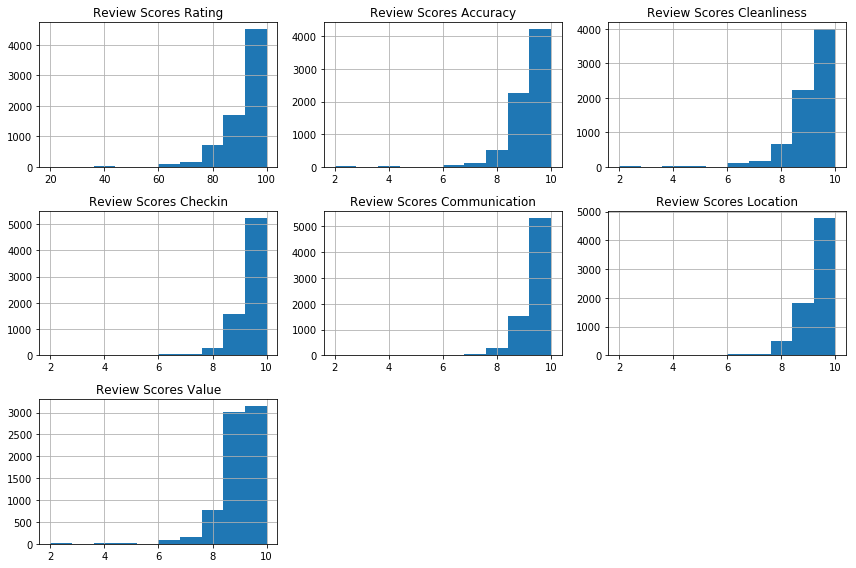

In [159]:
variables_to_plot = list(house_madrid.columns[house_madrid.columns.str.startswith("Review Scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    house_madrid[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()


Se puede ver que la primera de ellas Review Score Rating tiene una distribución diferente a las otras. Voy a tratar esa por un lado y el resto por otro

In [160]:
#Quito la primera, Review Score Rating
variables_to_plot.pop(0)

'Review Scores Rating'

In [161]:
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 4, 7, 8, 9, 10],
               labels=['0-4/10','5-7/10','8/10', '9/10', '10/10'])

In [162]:
#Los nan los sustituo por 'no reviews'
for col in variables_to_plot:
    house_madrid.loc[house_madrid[col].str.contains('nan'), col] = 'no reviews'

In [163]:
# Voy ahora con 
bin_column('Review Scores Rating',
           bins=[0, 50, 80, 95, 100],
           labels=['0-49/100', '50-79/100','80-94/100', '95-100/100'])

In [164]:
#Los nan los sustituo por 'no reviews'
house_madrid.loc[house_madrid['Review Scores Rating'].str.contains('nan'), 'Review Scores Rating'] = 'no reviews'

In [165]:
house_madrid.head (5)

,Price,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features,Dias_activo,Fire extinguisher,Hair dryer,Elevator in building,Wheelchair accessible,Shampoo,Smoke detector,Doorman,Buzzer/wireless intercom,Dryer,Pets allowed,Smoking allowed,24-hour check-in,Family/kid friendly,TV,Hangers,Laptop friendly workspace,Essentials,First aid kit,Iron,Carbon monoxide detector,Breakfast,Washer,Safety card,Air conditioning,time_since_first_review,time_since_last_review
0,85.0,within an hour,100%,40.0,Sol,Apartment,Entire home/apt,4,1.0,1.0,2.0,150.0,40.0,2,20,2,1125,0,9,80-94/100,10/10,9/10,9/10,9/10,10/10,9/10,strict,0.24,"Host Has Profile Pic,Host Identity Verified,Is...",1900.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2-3 years,1+ year
1,49.0,within an hour,100%,1.0,Embajadores,Apartment,Entire home/apt,4,1.0,1.0,2.0,99.0,20.0,2,10,1,1125,33,182,80-94/100,9/10,9/10,10/10,10/10,10/10,9/10,flexible,5.61,"Host Has Profile Pic,Host Identity Verified,Is...",1023.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2-3 years,0-2 weeks
2,33.0,within an hour,100%,3.0,Goya,Apartment,Private room,2,1.0,1.0,1.0,0.0,0.0,1,0,1,1125,45,38,95-100/100,10/10,9/10,10/10,10/10,10/10,10/10,flexible,5.45,"Host Has Profile Pic,Host Identity Verified,Re...",246.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6-12 months,2-8 weeks
3,35.0,unknown,unknown,1.0,Otro_Barrio,Apartment,Entire home/apt,6,1.0,3.0,4.0,0.0,0.0,1,0,2,9,0,2,50-79/100,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,flexible,0.16,"Host Has Profile Pic,Is Location Exact,Require...",703.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1-2 years,1+ year
4,54.0,unknown,unknown,4.0,Otro_Barrio,Apartment,Entire home/apt,3,1.0,2.0,2.0,100.0,30.0,1,10,2,1125,59,0,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,strict,NaN,"Host Has Profile Pic,Is Location Exact,Require...",10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,no reviews,no reviews


### Cancellation Policy

Es una variable categórica que representa el tipo de política de cancelación. No contiene valores nulos
Vamos a ver que valores puede tener:

In [166]:
house_madrid ['Cancellation Policy'].value_counts()

strict             3520
flexible           2978
moderate           2763
super_strict_60       5
Name: Cancellation Policy, dtype: int64

De la "super_strict_60" hay muy pocas viviendas así que las voy a agrupar junto con los strict para así tener solo 3 categorías y ya de camino lo dejo preparado también para el test

Caso de que haya un valor nulo le asigno la más frecuente que es "strict"

In [167]:
house_madrid ['Cancellation Policy'] [house_madrid ['Cancellation Policy'].isnull()]="strict"

In [168]:
tipo_cancelacion = ['strict', 'flexible', 'moderate' ]
tipo_cancelacion   #Lo usaré en test

['strict', 'flexible', 'moderate']

In [169]:
house_madrid['Cancellation Policy'] [~house_madrid['Cancellation Policy'].isin(tipo_cancelacion)]='strict'

In [170]:
house_madrid ['Cancellation Policy'].value_counts()

strict      3525
flexible    2978
moderate    2763
Name: Cancellation Policy, dtype: int64

### Reviews per Month

Es un campo calculado que representa el número medio de reviews por mes.
Es una columna que va a estar altamente correlada con la "Number of Reviews" por tanto la voy a eliminar



In [171]:
house_madrid.drop(['Reviews per Month' ], axis=1, inplace=True)

In [172]:
house_madrid.head(5)

,Price,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Features,Dias_activo,Fire extinguisher,Hair dryer,Elevator in building,Wheelchair accessible,Shampoo,Smoke detector,Doorman,Buzzer/wireless intercom,Dryer,Pets allowed,Smoking allowed,24-hour check-in,Family/kid friendly,TV,Hangers,Laptop friendly workspace,Essentials,First aid kit,Iron,Carbon monoxide detector,Breakfast,Washer,Safety card,Air conditioning,time_since_first_review,time_since_last_review
0,85.0,within an hour,100%,40.0,Sol,Apartment,Entire home/apt,4,1.0,1.0,2.0,150.0,40.0,2,20,2,1125,0,9,80-94/100,10/10,9/10,9/10,9/10,10/10,9/10,strict,"Host Has Profile Pic,Host Identity Verified,Is...",1900.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2-3 years,1+ year
1,49.0,within an hour,100%,1.0,Embajadores,Apartment,Entire home/apt,4,1.0,1.0,2.0,99.0,20.0,2,10,1,1125,33,182,80-94/100,9/10,9/10,10/10,10/10,10/10,9/10,flexible,"Host Has Profile Pic,Host Identity Verified,Is...",1023.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2-3 years,0-2 weeks
2,33.0,within an hour,100%,3.0,Goya,Apartment,Private room,2,1.0,1.0,1.0,0.0,0.0,1,0,1,1125,45,38,95-100/100,10/10,9/10,10/10,10/10,10/10,10/10,flexible,"Host Has Profile Pic,Host Identity Verified,Re...",246.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6-12 months,2-8 weeks
3,35.0,unknown,unknown,1.0,Otro_Barrio,Apartment,Entire home/apt,6,1.0,3.0,4.0,0.0,0.0,1,0,2,9,0,2,50-79/100,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,flexible,"Host Has Profile Pic,Is Location Exact,Require...",703.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1-2 years,1+ year
4,54.0,unknown,unknown,4.0,Otro_Barrio,Apartment,Entire home/apt,3,1.0,2.0,2.0,100.0,30.0,1,10,2,1125,59,0,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,strict,"Host Has Profile Pic,Is Location Exact,Require...",10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,no reviews,no reviews


### Features

Esta columna representa características del host. No tiene valores nulos. 

In [173]:
#Esto es un ejemplo de como vienen listadas esas features
house_madrid ['Features'][:1].values

array(['Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License'],
      dtype=object)

Para el caso de que tuviera valores nulos le asigno "nada"

In [174]:
house_madrid['Features'].fillna("nada", inplace=True)

Saco el listado de todas las features

In [175]:
features_list = list(house_madrid ['Features'])
features_list_string = "".join(str(features_list))
features_list_string = features_list_string.replace('{', '')
features_list_string = features_list_string.replace('[', '')
features_list_string = features_list_string.replace(']', '')
features_list_string = features_list_string.replace("'", '')
features_list_string = features_list_string.replace('}', ',')
features_list_string = features_list_string.replace('"', '')
features_set = [x.strip() for x in features_list_string.split(',')]
features_set = set(features_set)
features_set

{'Host Has Profile Pic',
 'Host Identity Verified',
 'Host Is Superhost',
 'Instant Bookable',
 'Is Location Exact',
 'Require Guest Phone Verification',
 'Require Guest Profile Picture',
 'Requires License'}

In [176]:
#Añado al dataset una columna por cada Feature. Después eliminaré algunas
for features in features_set:
    house_madrid.loc[house_madrid['Features'].str.contains(features), features] = 1
    

In [177]:
house_madrid.head(2)

,Price,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Features,Dias_activo,Fire extinguisher,Hair dryer,Elevator in building,Wheelchair accessible,Shampoo,Smoke detector,Doorman,Buzzer/wireless intercom,Dryer,Pets allowed,Smoking allowed,24-hour check-in,Family/kid friendly,TV,Hangers,Laptop friendly workspace,Essentials,First aid kit,Iron,Carbon monoxide detector,Breakfast,Washer,Safety card,Air conditioning,time_since_first_review,time_since_last_review,Requires License,Require Guest Profile Picture,Host Identity Verified,Host Has Profile Pic,Instant Bookable,Require Guest Phone Verification,Host Is Superhost,Is Location Exact
0,85.0,within an hour,100%,40.0,Sol,Apartment,Entire home/apt,4,1.0,1.0,2.0,150.0,40.0,2,20,2,1125,0,9,80-94/100,10/10,9/10,9/10,9/10,10/10,9/10,strict,"Host Has Profile Pic,Host Identity Verified,Is...",1900.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2-3 years,1+ year,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0
1,49.0,within an hour,100%,1.0,Embajadores,Apartment,Entire home/apt,4,1.0,1.0,2.0,99.0,20.0,2,10,1,1125,33,182,80-94/100,9/10,9/10,10/10,10/10,10/10,9/10,flexible,"Host Has Profile Pic,Host Identity Verified,Is...",1023.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2-3 years,0-2 weeks,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0


In [178]:
indice = house_madrid.columns.get_loc("time_since_last_review")+1


In [179]:
# Los nulos de las nuevas columnas que he añadido los sustituyo por 0 
cols_to_replace_nulls = house_madrid.iloc[:,indice:].columns
house_madrid[cols_to_replace_nulls] = house_madrid[cols_to_replace_nulls].fillna(0)

Puedo reducir el número de características nuevas añadidas eliminando aquellas features que añadan poca información o que no sea útiles para diferenciar las viviendas. Las features que contenga menos del 10% de viviendas se podrían borrar

In [180]:
infrequent_features = []
for col in house_madrid.iloc[:,indice:].columns:
    if house_madrid[col].sum() < len(house_madrid)/10:
        infrequent_features.append(col)
print(infrequent_features)

['Require Guest Profile Picture', 'Require Guest Phone Verification']


In [181]:
# Elimino las menos frecuentes
house_madrid.drop(infrequent_features, axis=1, inplace=True)

Voy a comprobar los valores de cada una de ellas ya que si hay un alto porcentaje del valor 1 las puedo eliminar. 

In [182]:
indice = house_madrid.columns.get_loc("time_since_last_review")+1

In [183]:
frequent_features = []
for col in house_madrid.iloc[:,indice:].columns:
    if house_madrid[col].sum() > len(house_madrid)*90/100:
        frequent_features.append(col)
print(frequent_features)

['Requires License', 'Host Has Profile Pic']


In [184]:
#Elimino estas columnas frecuentes
house_madrid.drop(frequent_features, axis=1, inplace=True)

In [185]:
#Las "features" que quedan
indice = house_madrid.columns.get_loc("time_since_last_review")+1
features_def = house_madrid.columns[indice:]
features_def

Index(['Host Identity Verified', 'Instant Bookable', 'Host Is Superhost',
       'Is Location Exact'],
      dtype='object')

In [186]:
#Elimino la columna features original
house_madrid.drop('Features', axis=1, inplace=True)

In [187]:
house_madrid.head(5)

,Price,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Dias_activo,Fire extinguisher,Hair dryer,Elevator in building,Wheelchair accessible,Shampoo,Smoke detector,Doorman,Buzzer/wireless intercom,Dryer,Pets allowed,Smoking allowed,24-hour check-in,Family/kid friendly,TV,Hangers,Laptop friendly workspace,Essentials,First aid kit,Iron,Carbon monoxide detector,Breakfast,Washer,Safety card,Air conditioning,time_since_first_review,time_since_last_review,Host Identity Verified,Instant Bookable,Host Is Superhost,Is Location Exact
0,85.0,within an hour,100%,40.0,Sol,Apartment,Entire home/apt,4,1.0,1.0,2.0,150.0,40.0,2,20,2,1125,0,9,80-94/100,10/10,9/10,9/10,9/10,10/10,9/10,strict,1900.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2-3 years,1+ year,1.0,0.0,0.0,1.0
1,49.0,within an hour,100%,1.0,Embajadores,Apartment,Entire home/apt,4,1.0,1.0,2.0,99.0,20.0,2,10,1,1125,33,182,80-94/100,9/10,9/10,10/10,10/10,10/10,9/10,flexible,1023.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2-3 years,0-2 weeks,1.0,1.0,0.0,1.0
2,33.0,within an hour,100%,3.0,Goya,Apartment,Private room,2,1.0,1.0,1.0,0.0,0.0,1,0,1,1125,45,38,95-100/100,10/10,9/10,10/10,10/10,10/10,10/10,flexible,246.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6-12 months,2-8 weeks,1.0,1.0,0.0,0.0
3,35.0,unknown,unknown,1.0,Otro_Barrio,Apartment,Entire home/apt,6,1.0,3.0,4.0,0.0,0.0,1,0,2,9,0,2,50-79/100,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,flexible,703.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1-2 years,1+ year,0.0,0.0,0.0,1.0
4,54.0,unknown,unknown,4.0,Otro_Barrio,Apartment,Entire home/apt,3,1.0,2.0,2.0,100.0,30.0,1,10,2,1125,59,0,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,strict,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,no reviews,no reviews,0.0,0.0,0.0,1.0


Con esto ya tendría realizada toda la limpieza de dataset. He añadido nuevas columnas y categorizado

In [188]:
#Tipos de datos y columnas que me quedan finalmente
dato = house_madrid.dtypes
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

Price                          float64
Host Response Time              object
Host Response Rate              object
Host Listings Count            float64
Neighbourhood Cleansed          object
Property Type                   object
Room Type                       object
Accommodates                     int64
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Security Deposit               float64
Cleaning Fee                   float64
Guests Included                  int64
Extra People                     int64
Minimum Nights                   int64
Maximum Nights                   int64
Availability 90                  int64
Number of Reviews                int64
Review Scores Rating            object
Review Scores Accuracy          object
Review Scores Cleanliness       object
Review Scores Checkin           object
Review Scores Communication     object
Review Scores Location          object
Review Scores Value      

In [189]:
print(f"El dataset limpio train contiene {len(house_madrid)} viviendas Airbnb con {len(house_madrid.columns)} características")
pd.set_option('display.max_columns', len(house_madrid)) # Para ver todas las columnas
house_madrid.head(5)  

El dataset limpio train contiene 9266 viviendas Airbnb con 58 características


,Price,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Dias_activo,Fire extinguisher,Hair dryer,Elevator in building,Wheelchair accessible,Shampoo,Smoke detector,Doorman,Buzzer/wireless intercom,Dryer,Pets allowed,Smoking allowed,24-hour check-in,Family/kid friendly,TV,Hangers,Laptop friendly workspace,Essentials,First aid kit,Iron,Carbon monoxide detector,Breakfast,Washer,Safety card,Air conditioning,time_since_first_review,time_since_last_review,Host Identity Verified,Instant Bookable,Host Is Superhost,Is Location Exact
0,85.0,within an hour,100%,40.0,Sol,Apartment,Entire home/apt,4,1.0,1.0,2.0,150.0,40.0,2,20,2,1125,0,9,80-94/100,10/10,9/10,9/10,9/10,10/10,9/10,strict,1900.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2-3 years,1+ year,1.0,0.0,0.0,1.0
1,49.0,within an hour,100%,1.0,Embajadores,Apartment,Entire home/apt,4,1.0,1.0,2.0,99.0,20.0,2,10,1,1125,33,182,80-94/100,9/10,9/10,10/10,10/10,10/10,9/10,flexible,1023.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2-3 years,0-2 weeks,1.0,1.0,0.0,1.0
2,33.0,within an hour,100%,3.0,Goya,Apartment,Private room,2,1.0,1.0,1.0,0.0,0.0,1,0,1,1125,45,38,95-100/100,10/10,9/10,10/10,10/10,10/10,10/10,flexible,246.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6-12 months,2-8 weeks,1.0,1.0,0.0,0.0
3,35.0,unknown,unknown,1.0,Otro_Barrio,Apartment,Entire home/apt,6,1.0,3.0,4.0,0.0,0.0,1,0,2,9,0,2,50-79/100,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,flexible,703.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1-2 years,1+ year,0.0,0.0,0.0,1.0
4,54.0,unknown,unknown,4.0,Otro_Barrio,Apartment,Entire home/apt,3,1.0,2.0,2.0,100.0,30.0,1,10,2,1125,59,0,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,strict,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,no reviews,no reviews,0.0,0.0,0.0,1.0


In [190]:
#Voy a guardar el dataset limpio

airbnb_cleaned = house_madrid.to_csv(r'./data/airbnb_cleaned.csv', index=id, header=True)


## 5.- Análisis exploratorio



## 5.1. Analisis exploratorio de variables de tipo numérico

Vamos ahora a realizar un análisis básico de los datos de tipo numérico. 

Voy a resumir toda la información posible de los datos. Me interesa saber la media, desviación estándar y quartiles de cada una de las variables. Esto nos permitirá, por una lado, tener una idea de cómo son las ditribuciones de cada una de las variables y por otra, nos permitirá verificar si existen datos anómalos, también conocidos como outliers 

In [191]:
house_madrid.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,9266.0,66.269912,55.964575,9.0,32.0,53.0,80.0,875.0
Host Listings Count,9264.0,9.982729,28.042875,0.0,1.0,2.0,5.0,265.0
Accommodates,9266.0,3.192640,1.987580,1.0,2.0,2.0,4.0,16.0
Bathrooms,9266.0,1.258148,0.611326,0.0,1.0,1.0,1.0,8.0
Bedrooms,9266.0,1.295057,0.831731,0.0,1.0,1.0,2.0,10.0
Beds,9266.0,1.988776,1.528461,1.0,1.0,1.0,2.0,16.0
Security Deposit,9266.0,79.018023,115.460192,0.0,0.0,0.0,150.0,990.0
Cleaning Fee,9266.0,18.047809,26.088764,0.0,0.0,10.0,30.0,500.0
Guests Included,9266.0,1.573494,1.073170,1.0,1.0,1.0,2.0,16.0
Extra People,9266.0,7.464926,10.490656,0.0,0.0,5.0,15.0,276.0


### Price

In [192]:
print(f"Los precios se encuentran en el rango desde  {min(house_madrid.Price)} € to {max(house_madrid.Price)} €.")

Los precios se encuentran en el rango desde  9.0 € to 875.0 €.


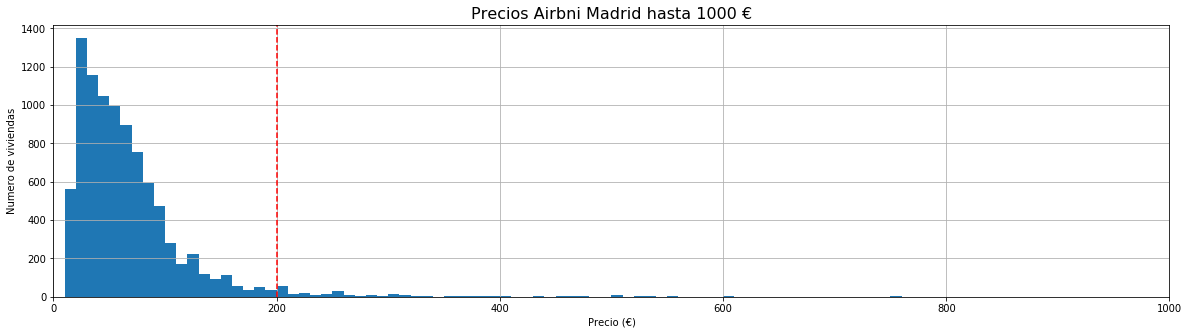

In [193]:
# Distribución  de precios desde 0 € a 1000 €
plt.figure(figsize=(20,5))
house_madrid.Price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='red', linestyle='--')
plt.title("Precios Airbni Madrid hasta 1000 €", fontsize=16)
plt.xlabel("Precio (€)")
plt.ylabel("Numero de viviendas")
plt.show()

Se aprecia que la mayoría de las viviendas tienen un precio por debajo de los 200 € la noche.

In [194]:
#Voy a mirar la vivienda de precio más alto
house_madrid [house_madrid.Price == 875]

,Price,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Dias_activo,Fire extinguisher,Hair dryer,Elevator in building,Wheelchair accessible,Shampoo,Smoke detector,Doorman,Buzzer/wireless intercom,Dryer,Pets allowed,Smoking allowed,24-hour check-in,Family/kid friendly,TV,Hangers,Laptop friendly workspace,Essentials,First aid kit,Iron,Carbon monoxide detector,Breakfast,Washer,Safety card,Air conditioning,time_since_first_review,time_since_last_review,Host Identity Verified,Instant Bookable,Host Is Superhost,Is Location Exact
1548,875.0,within a few hours,100%,68.0,Otro_Barrio,House,Entire home/apt,10,5.0,5.0,9.0,0.0,375.0,1,0,30,1125,0,0,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,no reviews,strict,712.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,no reviews,no reviews,1.0,0.0,0.0,0.0


Se ve que es una vivienda para 10 personas, con 5 dormitorios

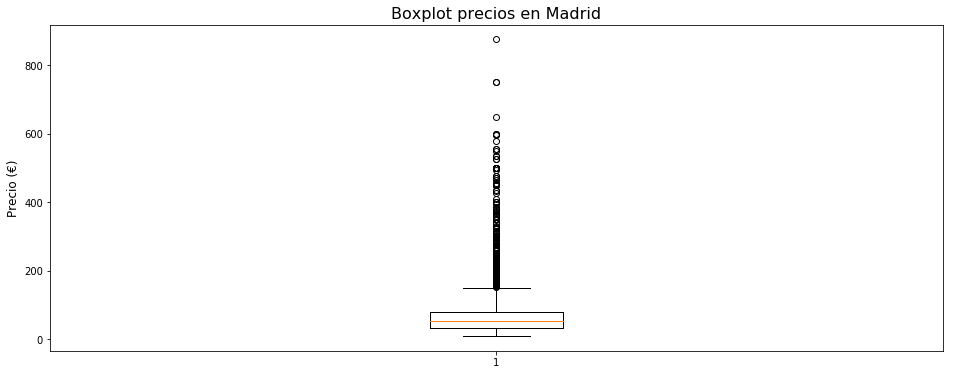

In [195]:
#Dibujo un Boxplot para los precios
plt.figure(figsize=(16,6))
plt.boxplot(house_madrid.Price)
plt.ylabel('Precio (€)', fontsize=12)
plt.title('Boxplot precios en Madrid', fontsize=16)
plt.show()

Tratamiento de outliers: Voy a considerar outiliers a partir de 200. Veo en la distribución que por debajo de ese valor están la mayoría de las observaciones

In [196]:
house_madrid = house_madrid [house_madrid ['Price']<=200]

## Host Listing Count

Revisando los valores llama la atención es Host Listings Count que tiene un máximo de 265


In [197]:
print("Mediana del número de viviendas por host:", int(house_madrid['Host Listings Count'].median()))
print("Media del número de viviendas por host:", int(round(house_madrid['Host Listings Count'].mean())))
print("Mayor número de viviendas por host:", int(round(house_madrid['Host Listings Count'].max())))
print ("Porcentaje de viviendas cuyo anfitrión solo tiene una vivienda:", int(round (100*len(house_madrid[house_madrid["Host Listings Count"] == 1])/len(house_madrid))))

Mediana del número de viviendas por host: 2
Media del número de viviendas por host: 9
Mayor número de viviendas por host: 265
Porcentaje de viviendas cuyo anfitrión solo tiene una vivienda: 43


La media vemos que es significativamente más alta (9) que la mediana lo que significa que hay anfitriones que tienen un número muy alto de propiedades. Se puede ver que el más alto tiene 265 propiedades. El 43% de los anfitriones tienen solo una vivienda pero es muy llamativo que más de la mitad tengan más de una vivienda

In [198]:
#Muestro un listado de los mayores Host Listing Count.
house_madrid.sort_values('Host Listings Count').drop_duplicates('Host Listings Count',keep='last').tail(10)[['Host Listings Count']]

,Host Listings Count
387,57.0
8071,68.0
6770,81.0
9724,114.0
5091,136.0
5267,142.0
1591,164.0
9250,207.0
6923,265.0
8032,NaN


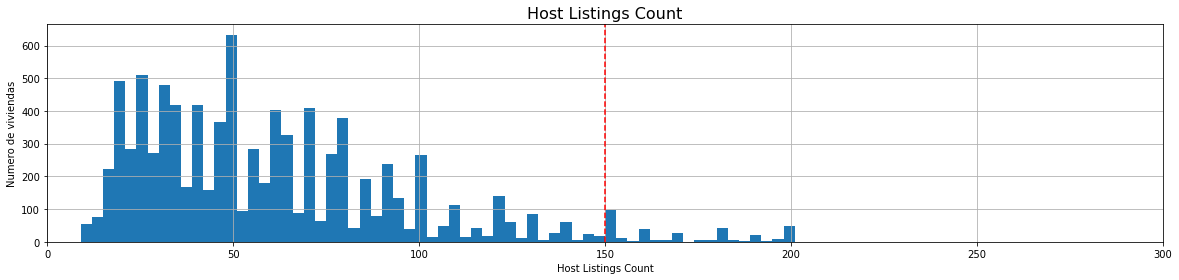

In [199]:
# Distribución  de Host Listings Count desde 0, 300 
plt.figure(figsize=(20,4))
house_madrid.Price.hist(bins=100, range=(0,300))
plt.margins(x=0)
plt.axvline(150, color='red', linestyle='--')
plt.title("Host Listings Count", fontsize=16)
plt.xlabel("Host Listings Count")
plt.ylabel("Numero de viviendas")
plt.show()

De todas formas nos encontramos con dos dificultades para saber el número de propiedades que tiene un anfitrión

1) Anfitriones que tengan más propiedades en Madrid van a aparecer varias veces en el listado ya que el dataset viene a nivel de propiedad y no de anfitrión

2) Un anfitrión puede tener propiedades en otras ciudades

Tratamiento de outliers: Voy a considerar outiliers a partir de 150. Veo en la distribución que por debajo de ese valor están la mayoría de las observaciones

In [200]:
house_madrid = house_madrid [house_madrid ['Host Listings Count']<=150]

Tratamiento de valores missings: Los sustituyo por la mediana

In [201]:
mediana_host_listings_count = house_madrid['Host Listings Count'].median() #Lo guardo para usarlo en test
house_madrid['Host Listings Count'].fillna(house_madrid['Host Listings Count'].median(), inplace=True)

In [202]:
#Compruebo que ya no tengo valores nulos
print("Valores nulos:", house_madrid['Host Listings Count'].isna().sum())
print(f"Proporcion: {round((house_madrid['Host Listings Count'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


## Accommodates, bathrooms, bedrooms, beds y Guests Included

Analizando lo datos vemos que no parece existir outliers

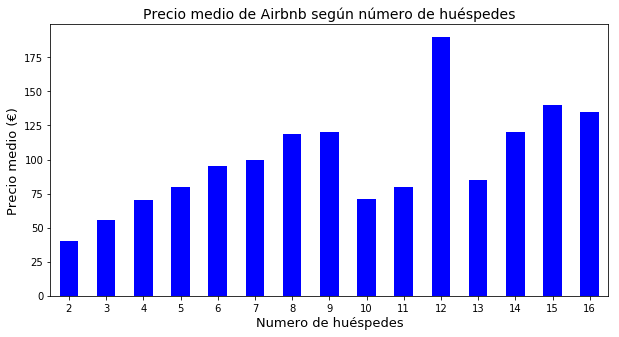

In [203]:
plt.figure(figsize=(10,5))
house_madrid.groupby('Accommodates').Price.median().plot(kind='bar', color='b')
plt.title('Precio medio de Airbnb según número de huéspedes', fontsize=14)
plt.xlabel('Numero de huéspedes', fontsize=13)
plt.ylabel('Precio medio (€)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

Se ve como el precio se va incrementando hasta los 9 huéspedes. Luego sorprendentemente comienza a bajar y a partir de 12 sube de nuevo. Es curioso como el precio para 8 huespedes es similar al de 14

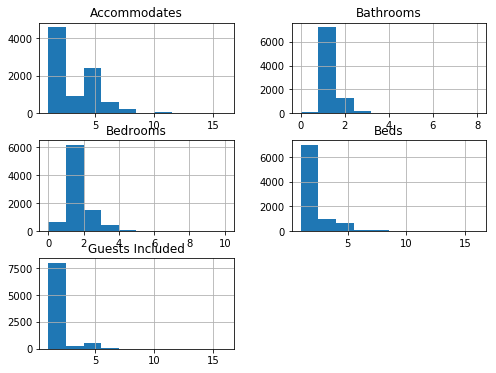

In [204]:
house_madrid[['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included']].hist(figsize=(8,6));

## Security Deposit

In [205]:
print(f"El Security Deposit se encuentran en el rango desde  {min(house_madrid['Security Deposit'])} € to {max(house_madrid['Security Deposit'])} €.")

El Security Deposit se encuentran en el rango desde  0.0 € to 990.0 €.


Me parece un valor muy elevado los 990€. Veamos la distribución que tiene

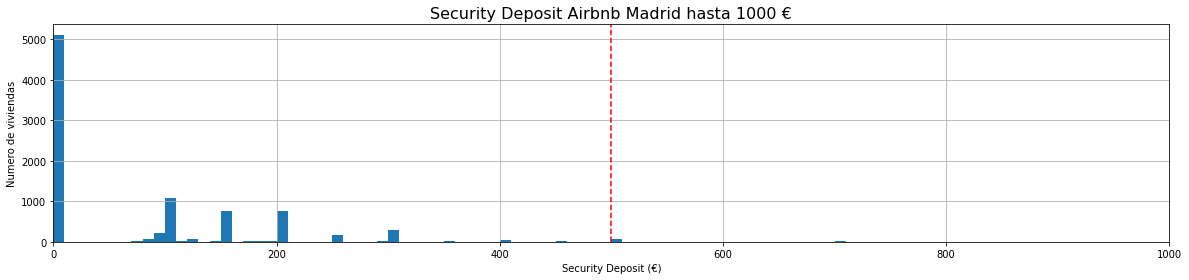

In [206]:
# Distribución  de precios desde 0 € a 1000 €
plt.figure(figsize=(20,4))
house_madrid['Security Deposit'].hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(500, color='red', linestyle='--')
plt.title("Security Deposit Airbnb Madrid hasta 1000 €", fontsize=16)
plt.xlabel("Security Deposit (€)")
plt.ylabel("Numero de viviendas")
plt.show()

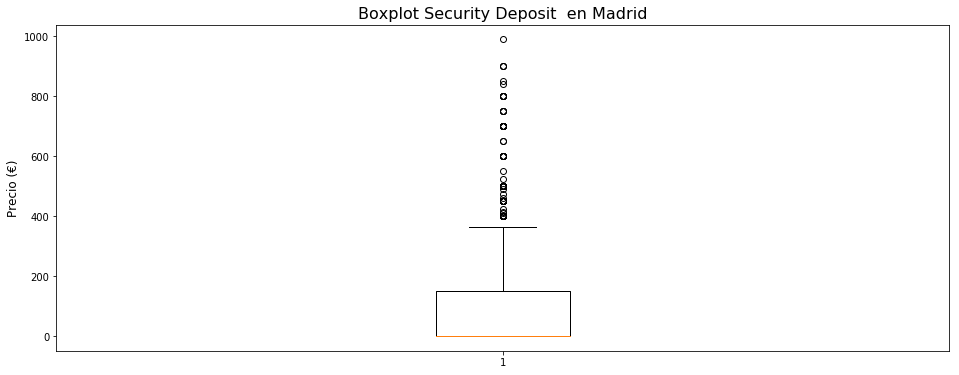

In [207]:
plt.figure(figsize=(16,6))
plt.boxplot(house_madrid['Security Deposit'])
plt.ylabel('Precio (€)', fontsize=12)
plt.title('Boxplot Security Deposit  en Madrid', fontsize=16)
plt.show()

Voy a eliminar aquellos que tienen más de 500 € de Security Deposit

In [208]:
house_madrid = house_madrid [house_madrid ['Security Deposit']<=500]

## Cleaning Fee

In [209]:
print(f"El Cleaning Fee se encuentran en el rango desde  {min(house_madrid['Cleaning Fee'])} € to {max(house_madrid['Cleaning Fee'])} €.")

El Cleaning Fee se encuentran en el rango desde  0.0 € to 250.0 €.


Me parece un valor muy elevado los 250 €. Veamos la distribución que tiene

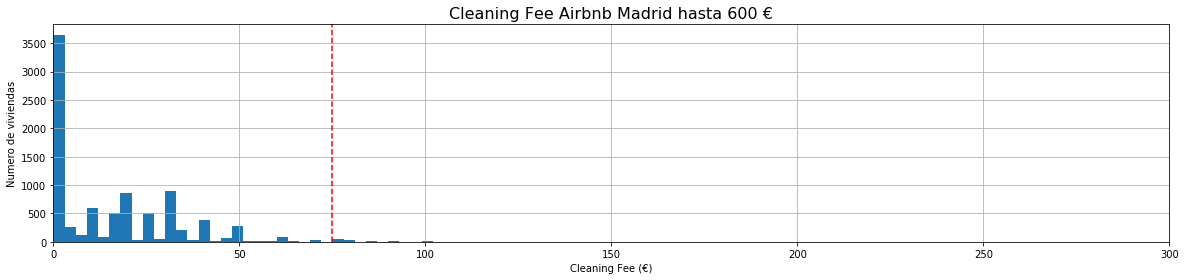

In [210]:
# Distribución  de precios desde 0 € a 300 €
plt.figure(figsize=(20,4))
house_madrid['Cleaning Fee'].hist(bins=100, range=(0,300))
plt.margins(x=0)
plt.axvline(75, color='red', linestyle='--')
plt.title("Cleaning Fee Airbnb Madrid hasta 600 €", fontsize=16)
plt.xlabel("Cleaning Fee (€)")
plt.ylabel("Numero de viviendas")
plt.show()

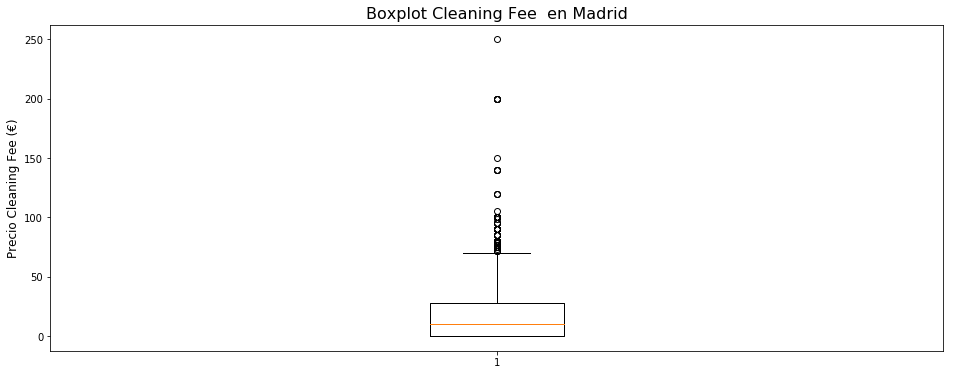

In [211]:
plt.figure(figsize=(16,6))
plt.boxplot(house_madrid['Cleaning Fee'])
plt.ylabel('Precio Cleaning Fee (€)', fontsize=12)
plt.title('Boxplot Cleaning Fee  en Madrid', fontsize=16)
plt.show()

Voy a eliminar aquellos que tienen más de 75 € de Cleaning Fee

In [212]:
house_madrid = house_madrid [house_madrid ['Cleaning Fee']<=75]

## Extra People

In [213]:
print(f"Extra People se encuentran en el rango desde  {min(house_madrid['Extra People'])} € to {max(house_madrid['Extra People'])} €.")

Extra People se encuentran en el rango desde  0 € to 276 €.


Parece que 276 € extra por una persona es un valor demasiado alto. Veamos la distribución

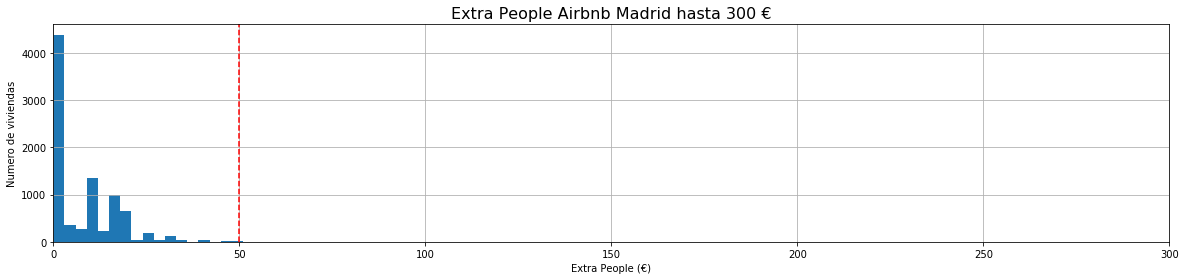

In [214]:
# Distribución  de precios desde 0 € a 300 €
plt.figure(figsize=(20,4))
house_madrid['Extra People'].hist(bins=100, range=(0,300))
plt.margins(x=0)
plt.axvline(50, color='red', linestyle='--')
plt.title("Extra People Airbnb Madrid hasta 300 €", fontsize=16)
plt.xlabel("Extra People (€)")
plt.ylabel("Numero de viviendas")
plt.show()

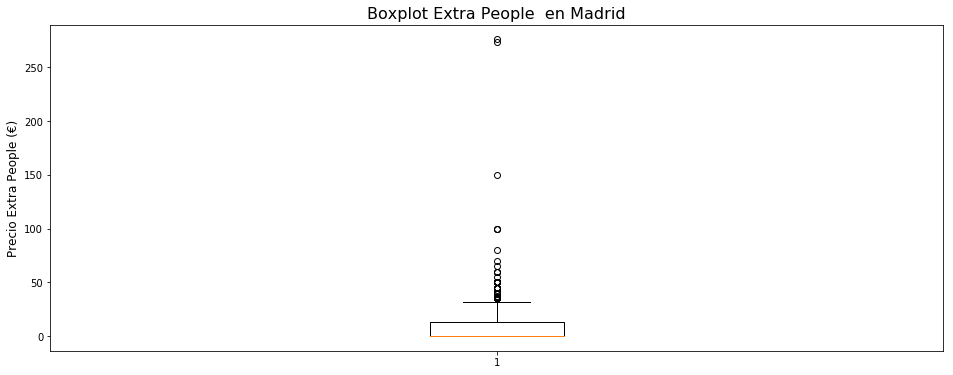

In [215]:
plt.figure(figsize=(16,6))
plt.boxplot(house_madrid['Extra People'])
plt.ylabel('Precio Extra People (€)', fontsize=12)
plt.title('Boxplot Extra People  en Madrid', fontsize=16)
plt.show()

Voy a eliminar aquellos que tienen más de 50 € de Extra People

In [216]:
house_madrid = house_madrid [house_madrid ['Extra People']<=50]

Tratamiento de missings: Lo sustituyo por la mediana

In [217]:
mediana_extra_people = house_madrid['Extra People'].median() #lo guardo para usarlo después en test
house_madrid['Extra People'].fillna(house_madrid['Extra People'].median(), inplace=True)

## Minimum Nights

In [218]:
print(f"Minimum Nights se encuentran en el rango desde  {min(house_madrid['Minimum Nights'])}  to {max(house_madrid['Minimum Nights'])}.")

Minimum Nights se encuentran en el rango desde  1  to 1125.


El valor 1125 es demasiado alto para ser el número mínimo de noches. Veamos la distribución

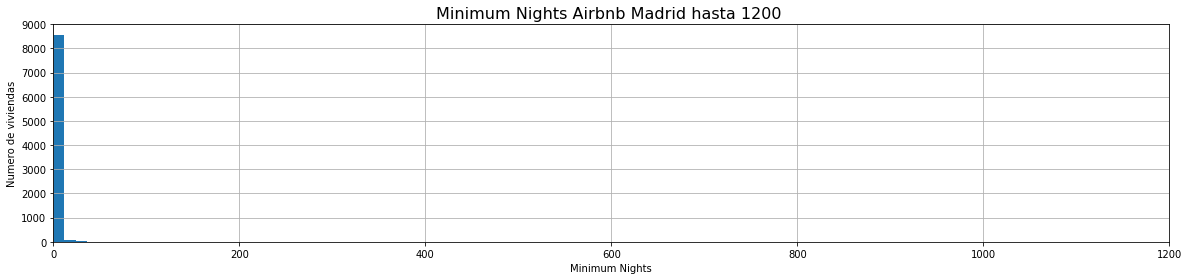

In [219]:
# Distribución  de Minimum Nights desde 0  a 1200 
plt.figure(figsize=(20,4))
house_madrid['Minimum Nights'].hist(bins=100, range=(0,1200))
plt.margins(x=0)
#plt.axvline(50, color='red', linestyle='--')
plt.title("Minimum Nights Airbnb Madrid hasta 1200 ", fontsize=16)
plt.xlabel("Minimum Nights")
plt.ylabel("Numero de viviendas")
plt.show()

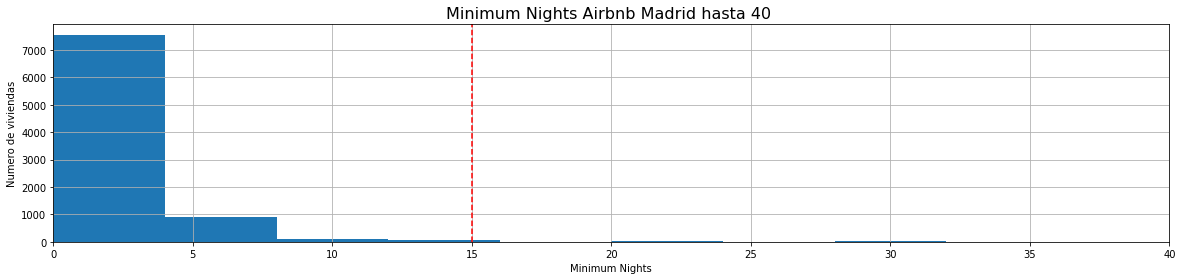

In [220]:
# Distribución  de Minimum Nights desde 0 a 40 
plt.figure(figsize=(20,4))
house_madrid['Minimum Nights'].hist(bins=10, range=(0,40))
plt.margins(x=0)
plt.axvline(15, color='red', linestyle='--')
plt.title("Minimum Nights Airbnb Madrid hasta 40 ", fontsize=16)
plt.xlabel("Minimum Nights")
plt.ylabel("Numero de viviendas")
plt.show()

Voy a eliminar los valores de Minimum Nights mayores a 15

In [221]:
house_madrid = house_madrid [house_madrid ['Minimum Nights']<=15]

Tratamiento de missings: lo sustituyo por la mediana

In [222]:
mediana_minimum_nights = house_madrid['Minimum Nights'].median()  #Lo guardo para usarlo después en test
house_madrid['Minimum Nights'].fillna(house_madrid['Minimum Nights'].median(), inplace=True)

## Maximum Nights

In [223]:
print(f"Maximum Nights se encuentran en el rango desde  {min(house_madrid['Maximum Nights'])}  to {max(house_madrid['Maximum Nights'])}.")

Maximum Nights se encuentran en el rango desde  1  to 1000000.


Claramente hay valores outliers. Veamos la distribución

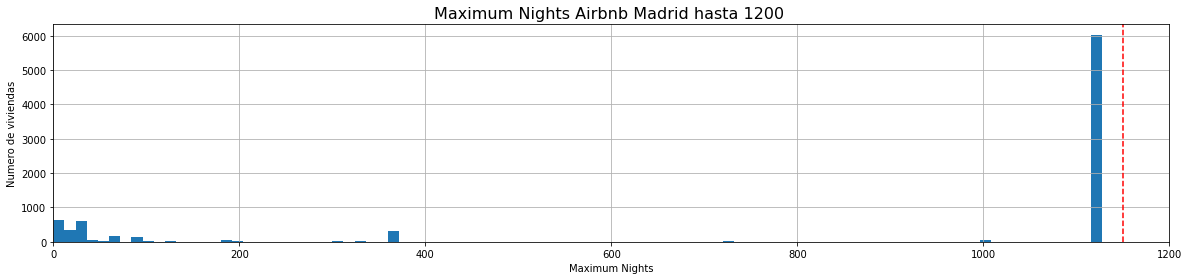

In [224]:
# Distribución  de Minimum Nights desde 0  a 1200 
plt.figure(figsize=(20,4))
house_madrid['Maximum Nights'].hist(bins=100, range=(0,1200))
plt.margins(x=0)
plt.axvline(1150, color='red', linestyle='--')
plt.title("Maximum Nights Airbnb Madrid hasta 1200 ", fontsize=16)
plt.xlabel("Maximum Nights")
plt.ylabel("Numero de viviendas")
plt.show()

Voy a eliminar los valores menos a 1150

In [225]:
house_madrid = house_madrid [house_madrid ['Maximum Nights']<=1150]

Tratamiento de missings: los sustituyo por la mediana

In [226]:
mediana_maximum_nights = house_madrid['Maximum Nights'].median()  #Lo guardo para usarlo después en test
house_madrid['Maximum Nights'].fillna(house_madrid['Maximum Nights'].median(), inplace=True)

In [227]:
house_madrid.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,8586.0,58.394596,35.188695,9.0,30.0,50.0,75.00,200.0
Host Listings Count,8586.0,5.928605,13.265583,0.0,1.0,2.0,4.00,142.0
Accommodates,8586.0,3.055090,1.817502,1.0,2.0,2.0,4.00,16.0
Bathrooms,8586.0,1.221698,0.567643,0.0,1.0,1.0,1.00,8.0
Bedrooms,8586.0,1.236781,0.746463,0.0,1.0,1.0,1.00,10.0
Beds,8586.0,1.892150,1.385007,1.0,1.0,1.0,2.00,16.0
Security Deposit,8586.0,71.454810,100.125107,0.0,0.0,0.0,150.00,500.0
Cleaning Fee,8586.0,14.691242,16.400458,0.0,0.0,10.0,25.00,75.0
Guests Included,8586.0,1.527952,0.985497,1.0,1.0,1.0,2.00,16.0
Extra People,8586.0,7.192989,8.844461,0.0,0.0,0.0,13.00,50.0


##  5.2. Analisis exploratorio de variables de tipo categórico

## Neighbourhood Cleansed

Creo un dataframe para ver el número de viviendas y precio medio por barrio

In [228]:

barrio_df = pd.DataFrame(house_madrid.groupby('Neighbourhood Cleansed').size())
barrio_df.rename(columns={0: 'number_of_listings'}, inplace=True)
barrio_df['median_price'] = house_madrid.groupby('Neighbourhood Cleansed').Price.median().values

In [229]:
#Ordeno de mayor a menor por precio medio de los barrios
barrio_df.sort_values('median_price', ascending=False)

,number_of_listings,median_price
Neighbourhood Cleansed,,
Recoletos,87,78.0
Sol,632,75.0
Cortes,467,65.0
Palacio,710,62.0
Justicia,507,60.0
Goya,141,60.0
Universidad,855,60.0
Almagro,90,55.0
Trafalgar,196,55.0


## Property Type

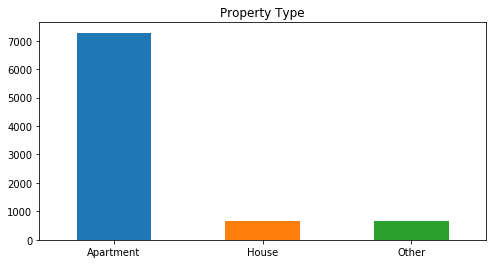

Apartment    0.848125
House        0.076054
Other        0.075821
Name: Property Type, dtype: float64


In [230]:
figsize=(8,4)
plt.figure(figsize=figsize)
house_madrid['Property Type'].value_counts().plot(kind='bar')
plt.title('Property Type')
plt.xticks(rotation=0)
plt.show()
print(house_madrid['Property Type'].value_counts(normalize=True))

El 85% de las viviendas son de tipo "Apartament". El resto está repartido entre los de tipo "House" y "Other" (otros tipos de viviendas, menos comunes)

## Room Type

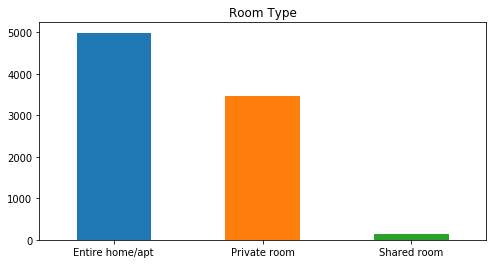

Entire home/apt    0.580829
Private room       0.404146
Shared room        0.015024
Name: Room Type, dtype: float64


In [231]:
figsize=(8,4)
plt.figure(figsize=figsize)
house_madrid['Room Type'].value_counts().plot(kind='bar')
plt.title('Room Type')
plt.xticks(rotation=0)
plt.show()
print(house_madrid['Room Type'].value_counts(normalize=True))

El 58% de las viviendas son de alquiler completo "Entire home/apt". El 40% son "Private Room" mientras que solo un 1% son "Shared room"

## Review Scores

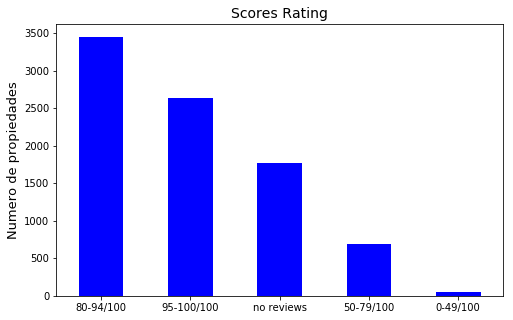

80-94/100     0.401817
95-100/100    0.306429
no reviews    0.206615
50-79/100     0.080014
0-49/100      0.005125
Name: Review Scores Rating, dtype: float64


In [232]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Scores Rating', fontsize=14)
house_madrid['Review Scores Rating'].value_counts().plot(kind='bar', ax=ax, color='b')
plt.xticks(rotation=0)
ax.set_ylabel('Numero de propiedades', fontsize=13)
plt.show()
print(house_madrid['Review Scores Rating'].value_counts(normalize=True))

Se puede ver que la mayoría de las propiedades 40% tienen un rating entre 80-94 sobre 100 y un 30% entre 95-100 por lo que la opinión de los huéspedes es muy favorable

Veamos ahora todos los scores rating con sus categorías:


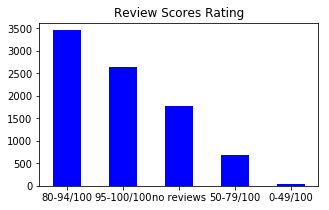

80-94/100     0.401817
95-100/100    0.306429
no reviews    0.206615
50-79/100     0.080014
0-49/100      0.005125
Name: Review Scores Rating, dtype: float64


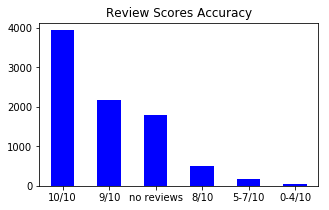

10/10         0.458304
9/10          0.252853
no reviews    0.207780
8/10          0.056953
5-7/10        0.020149
0-4/10        0.003960
Name: Review Scores Accuracy, dtype: float64


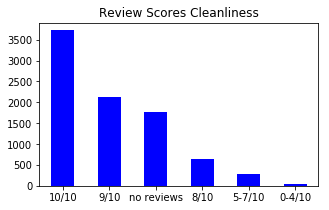

10/10         0.433496
9/10          0.247612
no reviews    0.207314
8/10          0.074307
5-7/10        0.033194
0-4/10        0.004076
Name: Review Scores Cleanliness, dtype: float64


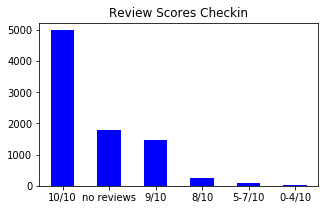

10/10         0.579315
no reviews    0.208246
9/10          0.171209
8/10          0.029816
5-7/10        0.009201
0-4/10        0.002213
Name: Review Scores Checkin, dtype: float64


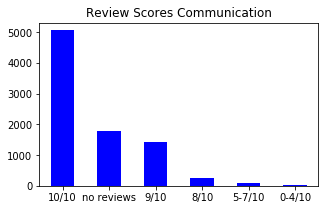

10/10         0.588167
no reviews    0.207314
9/10          0.165153
8/10          0.028418
5-7/10        0.008735
0-4/10        0.002213
Name: Review Scores Communication, dtype: float64


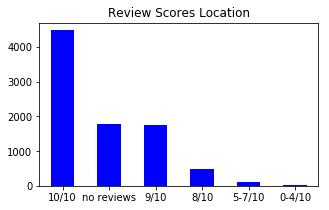

10/10         0.520498
no reviews    0.208479
9/10          0.202888
8/10          0.055090
5-7/10        0.011996
0-4/10        0.001048
Name: Review Scores Location, dtype: float64


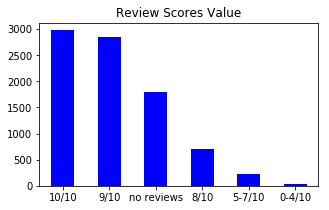

10/10         0.346028
9/10          0.332518
no reviews    0.208479
8/10          0.082926
5-7/10        0.026438
0-4/10        0.003611
Name: Review Scores Value, dtype: float64


In [233]:
figsize= figsize=(5,3)
for col in list(house_madrid.columns[house_madrid.columns.str.startswith("Review Scores") == True]):
    
    plt.figure(figsize=figsize)
    house_madrid[col].value_counts().plot(kind='bar', color='b')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()
    print(house_madrid[col].value_counts(normalize=True))
    
    
    

Vemos que para cada categoría la mayoría de las viviendas tienen una puntación de 10/10. Por debajo de 8 ya son raras las viviendas que hay. La más alta puntación se la lleva la categoría de Checkin con un 58% de viviendas valoradas con un 10 y de Communication con un 59%

## time_since_first_review  y time_since_last_review

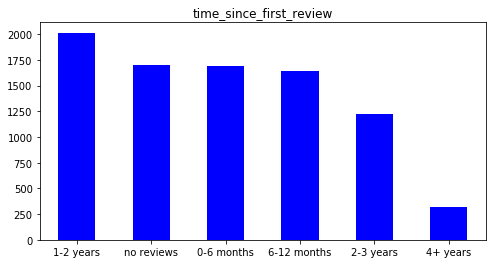

1-2 years      0.234684
no reviews     0.197647
0-6 months     0.197298
6-12 months    0.191009
2-3 years      0.142325
4+ years       0.037037
Name: time_since_first_review, dtype: float64


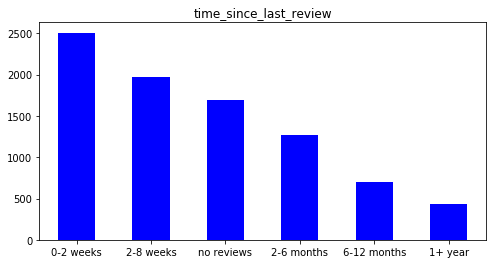

0-2 weeks      0.292103
2-8 weeks      0.229443
no reviews     0.197764
2-6 months     0.147915
6-12 months    0.081877
1+ year        0.050897
Name: time_since_last_review, dtype: float64


In [234]:
figsize = figsize=(8,4)
for col in ['time_since_first_review', 'time_since_last_review']:
    plt.figure(figsize=figsize)
    house_madrid[col].value_counts().plot(kind='bar', color='b')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()
    print(house_madrid[col].value_counts(normalize=True))

La mayoría de las propiedades tienen su primer review 1-2 años antes de la fecha de la toma de datos (08/04/2017), esto significa que la mayoría de las propiedades han estado activas al menos durante 1-2 años. Sin embargo se ve que hay muy pocas que hayan estado activas durante más de 4 años.
Se ve además que la mayoría tienen su último review 0-2 semanas antes de la fecha de la toma de datos lo que significa que la mayoría están activas y recibiendo visitas

## Host Response Rate

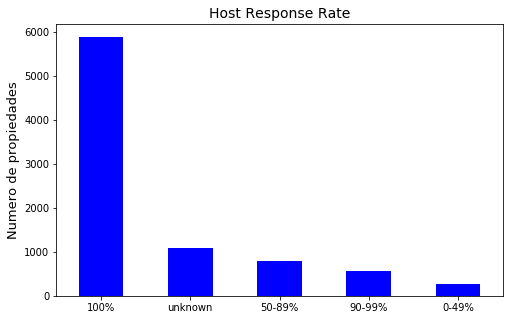

100%       0.684603
unknown    0.126601
50-89%     0.092243
90-99%     0.065222
0-49%      0.031330
Name: Host Response Rate, dtype: float64


In [235]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Host Response Rate', fontsize=14)
house_madrid['Host Response Rate'].value_counts().plot(kind='bar', ax=ax, color='b')
plt.xticks(rotation=0)
ax.set_ylabel('Numero de propiedades', fontsize=13)
plt.show()
print(house_madrid['Host Response Rate'].value_counts(normalize=True))

El 68% de las anfitriones tienen un Host Response Rate del 100%. Hay un 12% que no tienen valoración

##  5.3. Analisis exploratorio de variables de tipo booleano

Muchas características son de tipo booleano (true o false). En esta parte de análisis veremos que proporción es true o false de cada característica y la media del precio de cada categoría para estudiar la relación entre esa categoría y el precio

In [236]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    house_madrid.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    house_madrid.groupby(col).Price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Precio medio (€)')
    ax2.set_xlabel('')
    
    plt.show()

## Host Is Superhost

Vamos a ver que proporción de anfitriones son Superhosts y si merece la pena ser uno de ellos en cuanto al precio

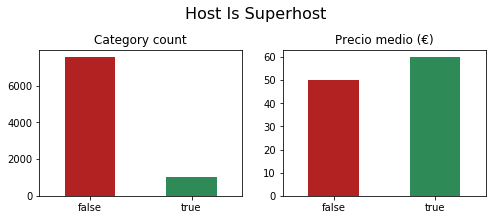

0.0    0.88062
1.0    0.11938
Name: Host Is Superhost, dtype: float64


In [237]:
binary_count_and_price_plot('Host Is Superhost')
print(house_madrid ['Host Is Superhost'].value_counts(normalize=True))

Un 11% son Superhost y si parece que influye en el precio siendo el precio algo más alto, por lo que parece que merece la pena convertirse en Superhost

## Is Location Exact

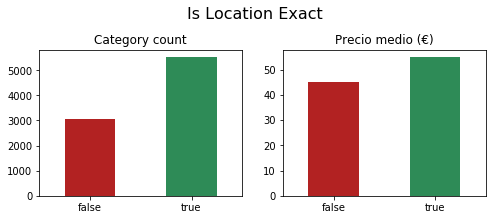

1.0    0.643722
0.0    0.356278
Name: Is Location Exact, dtype: float64


In [238]:
binary_count_and_price_plot('Is Location Exact')
print(house_madrid ['Is Location Exact'].value_counts(normalize=True))

El 64% de las viviendas tiene localización exacta y parece influir positivamente en el precio

## Host Identity Verified


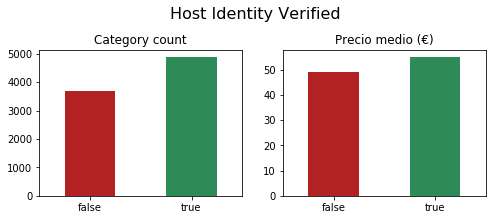

1.0    0.568949
0.0    0.431051
Name: Host Identity Verified, dtype: float64


In [239]:
binary_count_and_price_plot('Host Identity Verified')
print(house_madrid ['Host Identity Verified'].value_counts(normalize=True))

Un 57% de los anfitriones tienen verificada su identidad. Cabría esperar que esto diera más confianza a los huéspedes pero se ve que a nivel de precio la diferencia es poca (aunque la hay). Podríamos plantearnos eliminar esta categoría aunque de momento la dejo por si tuviera interacciones con otras

## Instant Bookable

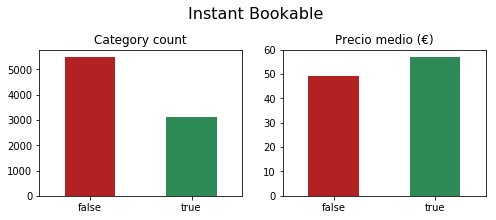

0.0    0.639413
1.0    0.360587
Name: Instant Bookable, dtype: float64


In [240]:
binary_count_and_price_plot('Instant Bookable')
print(house_madrid ['Instant Bookable'].value_counts(normalize=True))

Solo un 36% de las propiedades se pueden alquilar de forma inmediata. Esta característica parece que influye positivamente en el precio.

## Amenities

Voy a ver que comodidad de las ofrecidas es la más común y cuales incrementa el precio de alquilé

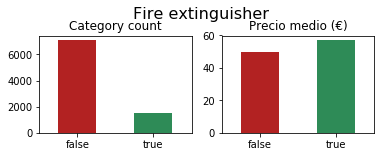

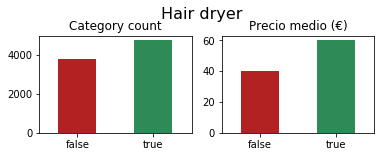

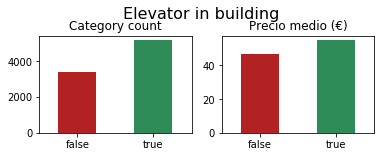

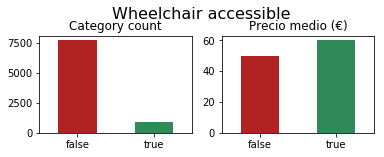

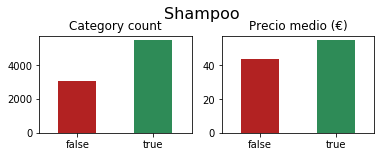

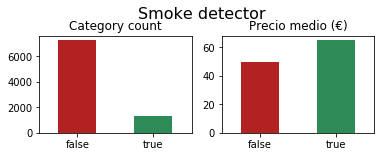

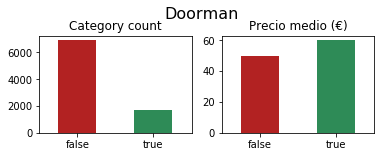

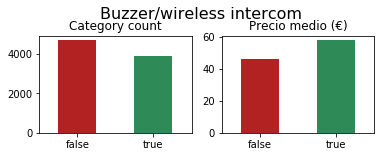

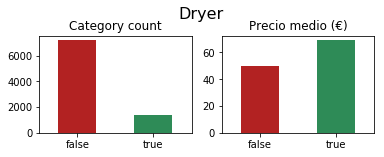

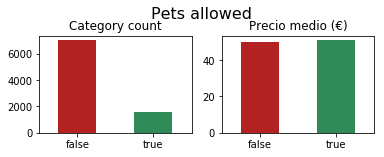

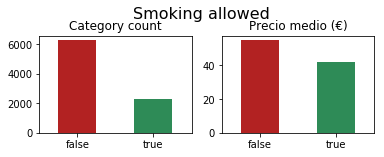

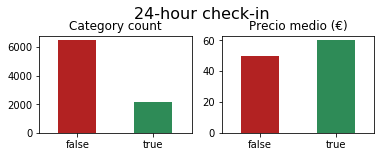

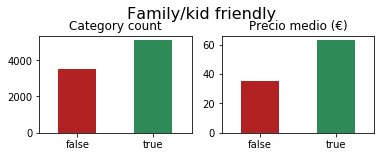

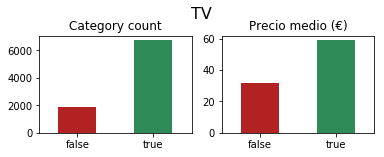

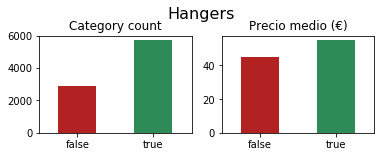

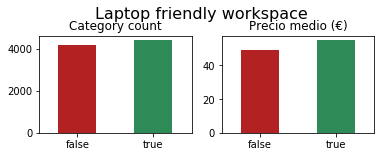

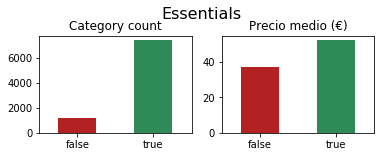

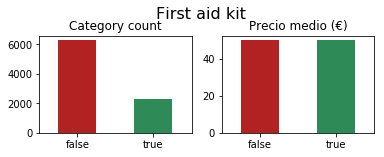

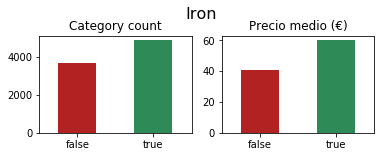

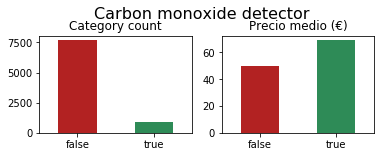

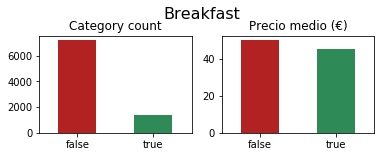

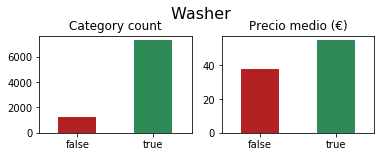

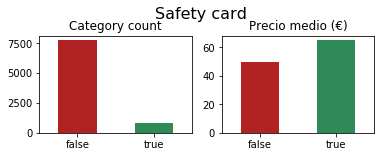

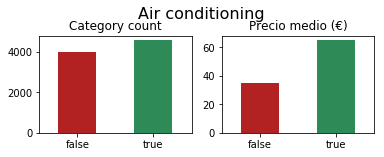

In [241]:
indice_inicial = house_madrid.columns.get_loc("Dias_activo")+1
indice_final = house_madrid.columns.get_loc("time_since_first_review")
for col in house_madrid.iloc[:,indice_inicial:indice_final].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

Tras analizar los gráficos anteriores podemos sacar dividir las características de esta forma:

Características poco comunes pero que aumentan el precio medio:

- Doorman
- Fire extinguisher
- Dryer
- Carbon monixide detector
- Smoke detector
- Wheelchair accesible
- 24-hour check-in
- Safety card

Características muy comunes y que aumentan el precio medio:

- Family/kid friendly
- Iron
- Elevator
- Air conditioning
- Essentials
- Washer
- Shampoo
- TV
- Hair dryer

Características poco comunes y que bajan el precio medio:

- Smoking allowed
- Breakfast (probablemente porque estos sean de tipo bed&breakfast y por tanto no sean de alquilé completo por lo que el precio será menor)

Características poco comunes pero que no provocan diferencia de precio

- First aid kit
- Pets allowed




En base a este análisis para mejorar el precio de una vivienda habría que asegurarse de tener las características comunes y añadir alguna de las poco comunes que mejoran el precio

## 6.- Preparación de datos para el modelado

## 6.1.- Codificación de variables categóricas

Tenemos varias variables categóricas que hay que codificar para el modelado. Utilizo el método get_dummies que se puede aplicar directamente sobre el dataframe

In [242]:
transformed_df = pd.get_dummies(house_madrid)
transformed_df.head()

,Price,Host Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Number of Reviews,Dias_activo,Fire extinguisher,Hair dryer,Elevator in building,Wheelchair accessible,Shampoo,Smoke detector,Doorman,Buzzer/wireless intercom,Dryer,Pets allowed,Smoking allowed,24-hour check-in,Family/kid friendly,TV,Hangers,Laptop friendly workspace,Essentials,First aid kit,Iron,Carbon monoxide detector,Breakfast,Washer,Safety card,Air conditioning,Host Identity Verified,Instant Bookable,Host Is Superhost,Is Location Exact,Host Response Time_a few days or more,Host Response Time_unknown,Host Response Time_within a day,Host Response Time_within a few hours,Host Response Time_within an hour,Host Response Rate_0-49%,Host Response Rate_100%,Host Response Rate_50-89%,Host Response Rate_90-99%,Host Response Rate_unknown,Neighbourhood Cleansed_Acacias,Neighbourhood Cleansed_Almagro,Neighbourhood Cleansed_Arapiles,Neighbourhood Cleansed_Argüelles,Neighbourhood Cleansed_Cortes,Neighbourhood Cleansed_Cuatro Caminos,Neighbourhood Cleansed_Embajadores,Neighbourhood Cleansed_Gaztambide,Neighbourhood Cleansed_Goya,Neighbourhood Cleansed_Guindalera,Neighbourhood Cleansed_Justicia,Neighbourhood Cleansed_Lista,Neighbourhood Cleansed_Otro_Barrio,Neighbourhood Cleansed_Pacífico,Neighbourhood Cleansed_Palacio,Neighbourhood Cleansed_Palos de Moguer,Neighbourhood Cleansed_Puerta del Angel,Neighbourhood Cleansed_Recoletos,Neighbourhood Cleansed_Sol,Neighbourhood Cleansed_Trafalgar,Neighbourhood Cleansed_Universidad,Property Type_Apartment,Property Type_House,Property Type_Other,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Review Scores Rating_0-49/100,Review Scores Rating_50-79/100,Review Scores Rating_80-94/100,Review Scores Rating_95-100/100,Review Scores Rating_no reviews,Review Scores Accuracy_0-4/10,Review Scores Accuracy_10/10,Review Scores Accuracy_5-7/10,Review Scores Accuracy_8/10,Review Scores Accuracy_9/10,Review Scores Accuracy_no reviews,Review Scores Cleanliness_0-4/10,Review Scores Cleanliness_10/10,Review Scores Cleanliness_5-7/10,Review Scores Cleanliness_8/10,Review Scores Cleanliness_9/10,Review Scores Cleanliness_no reviews,Review Scores Checkin_0-4/10,Review Scores Checkin_10/10,Review Scores Checkin_5-7/10,Review Scores Checkin_8/10,Review Scores Checkin_9/10,Review Scores Checkin_no reviews,Review Scores Communication_0-4/10,Review Scores Communication_10/10,Review Scores Communication_5-7/10,Review Scores Communication_8/10,Review Scores Communication_9/10,Review Scores Communication_no reviews,Review Scores Location_0-4/10,Review Scores Location_10/10,Review Scores Location_5-7/10,Review Scores Location_8/10,Review Scores Location_9/10,Review Scores Location_no reviews,Review Scores Value_0-4/10,Review Scores Value_10/10,Review Scores Value_5-7/10,Review Scores Value_8/10,Review Scores Value_9/10,Review Scores Value_no reviews,Cancellation Policy_flexible,Cancellation Policy_moderate,Cancellation Policy_strict,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months,time_since_first_review_no reviews,time_since_last_review_0-2 weeks,time_since_last_review_1+ year,time_since_last_review_2-6 months,time_since_last_review_2-8 weeks,time_since_last_review_6-12 months,time_since_last_review_no reviews
0,85.0,40.0,4,1.0,1.0,2.0,150.0,40.0,2,20,2,1125,0,9,1900.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
1,49.0,1.0,4,1.0,1.0,2.0,99.0,20.0,2,10,1,1125,33,182,1023.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.

## 6.2. Análsis de correlación

El siguiente paso consiste en evaluar las correlaciones entre las diferente variables del problema. Habitualmente, esto nos puede servir para identificar posibles atributos que estén altamente correlacionados. Las altamente correladas se podrían eliminar

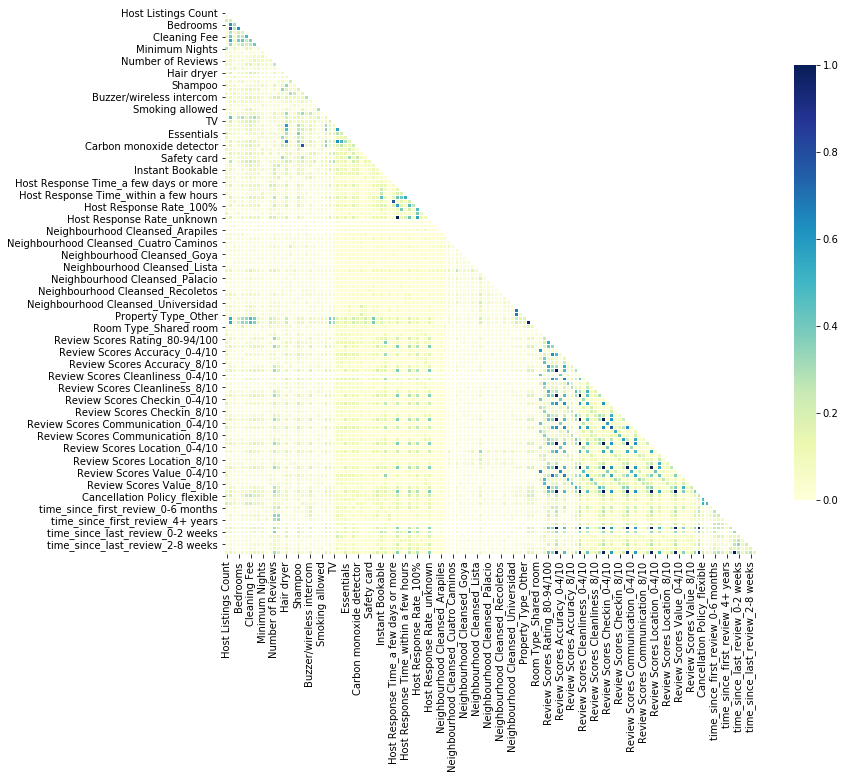

In [243]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(transformed_df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

No parece haber una ninguna correlación relevante con los barrios así que temporalmente los voy a quitar para poder ver el mapa anterior más claro

In [244]:
transformed_df_sinbarrios = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('Neighbourhood')]), axis=1)

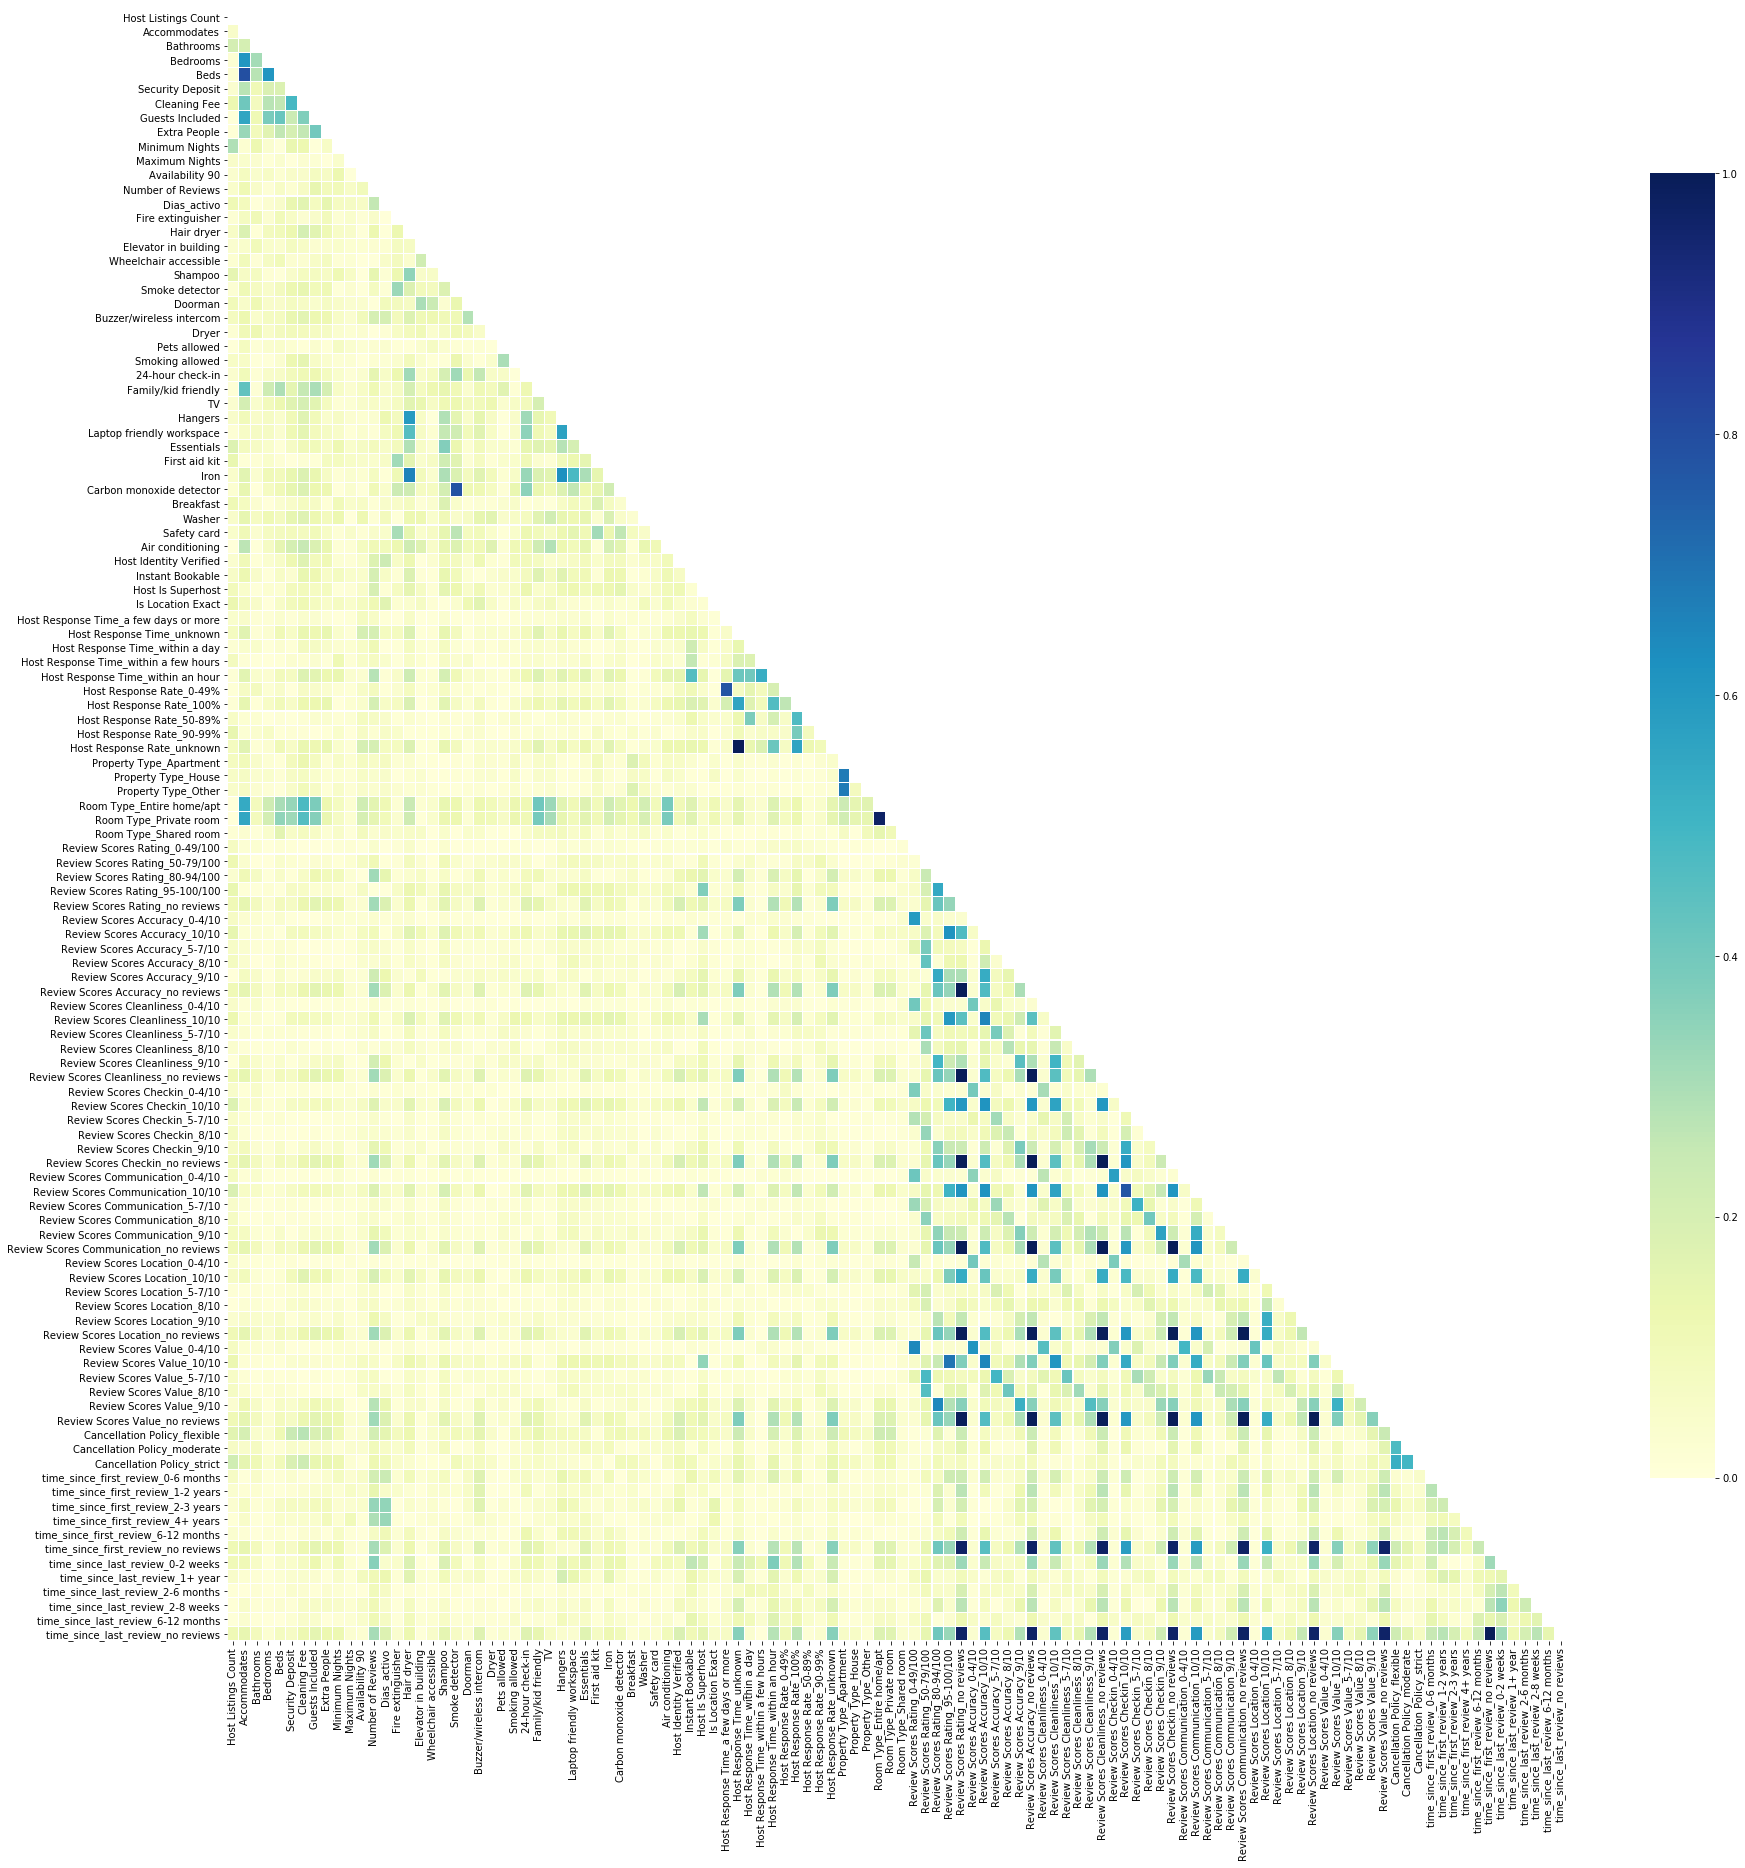

In [245]:
# Compute the correlation matrix
corr = np.abs(transformed_df_sinbarrios.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Tras analizar la matriz de correlación vemos:

- Beds, Beedrooms, Accomodates y Guest Included están altamente correlados. Me voy a quedar con Accomodates que suele ser el parámetro que se usa más en la búsquedas y eliminaré los otros 3

- A nivel de Amenities se ve que existe alta correlación entre " Carbon monoxide detector" y "Smoke detector" lo cual tiene sentido porque seguramente se usa el mismo dispositivo. Me quedo con "Smoke detector" y elimino la otra

- También existe una alta correlación entre "Host Response Rate_0-49%" y "Host Response Time_a few days or more". Elimino "Host Response Rate_0-49%"

- Alta correlación hay también entre "Host Response Rate_unknown" y Host Response Time_unknown. Elimino "Host Response Rate_unknown"


- Igualmente existe alta correlación negativa entre Property Type_Apartment y Property Type_House. Voy a eliminar Property Type_House y me quedo con la de tipo Apartamento.

- Tenemos también alta correlación negativa entre Room Type_Entire home/apt y Room Type_Private room. Voy a eliminar Room Type_Private room

- Y por último obviamente tenemos una alta correlación entre las diferentes categoría de Review Scores de tipo "no reviews" y "time_since_first_review_no reviews" y "time_since_last_review_no reviews". Elimino todas estas caractarísticas "no review"

In [246]:
to_drop = ['Beds',
           'Bedrooms',
           'Guests Included', 
           'Carbon monoxide detector',
           'Host Response Rate_0-49%',
           'Host Response Rate_unknown',
           'Property Type_House',
           'Room Type_Private room']

to_drop.extend(list(transformed_df.columns[transformed_df.columns.str.endswith('no reviews')]))
           
           

In [247]:
transformed_df.drop(to_drop, axis=1, inplace=True)

In [248]:
transformed_df.head(5)

,Price,Host Listings Count,Accommodates,Bathrooms,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Maximum Nights,Availability 90,Number of Reviews,Dias_activo,Fire extinguisher,Hair dryer,Elevator in building,Wheelchair accessible,Shampoo,Smoke detector,Doorman,Buzzer/wireless intercom,Dryer,Pets allowed,Smoking allowed,24-hour check-in,Family/kid friendly,TV,Hangers,Laptop friendly workspace,Essentials,First aid kit,Iron,Breakfast,Washer,Safety card,Air conditioning,Host Identity Verified,Instant Bookable,Host Is Superhost,Is Location Exact,Host Response Time_a few days or more,Host Response Time_unknown,Host Response Time_within a day,Host Response Time_within a few hours,Host Response Time_within an hour,Host Response Rate_100%,Host Response Rate_50-89%,Host Response Rate_90-99%,Neighbourhood Cleansed_Acacias,Neighbourhood Cleansed_Almagro,Neighbourhood Cleansed_Arapiles,Neighbourhood Cleansed_Argüelles,Neighbourhood Cleansed_Cortes,Neighbourhood Cleansed_Cuatro Caminos,Neighbourhood Cleansed_Embajadores,Neighbourhood Cleansed_Gaztambide,Neighbourhood Cleansed_Goya,Neighbourhood Cleansed_Guindalera,Neighbourhood Cleansed_Justicia,Neighbourhood Cleansed_Lista,Neighbourhood Cleansed_Otro_Barrio,Neighbourhood Cleansed_Pacífico,Neighbourhood Cleansed_Palacio,Neighbourhood Cleansed_Palos de Moguer,Neighbourhood Cleansed_Puerta del Angel,Neighbourhood Cleansed_Recoletos,Neighbourhood Cleansed_Sol,Neighbourhood Cleansed_Trafalgar,Neighbourhood Cleansed_Universidad,Property Type_Apartment,Property Type_Other,Room Type_Entire home/apt,Room Type_Shared room,Review Scores Rating_0-49/100,Review Scores Rating_50-79/100,Review Scores Rating_80-94/100,Review Scores Rating_95-100/100,Review Scores Accuracy_0-4/10,Review Scores Accuracy_10/10,Review Scores Accuracy_5-7/10,Review Scores Accuracy_8/10,Review Scores Accuracy_9/10,Review Scores Cleanliness_0-4/10,Review Scores Cleanliness_10/10,Review Scores Cleanliness_5-7/10,Review Scores Cleanliness_8/10,Review Scores Cleanliness_9/10,Review Scores Checkin_0-4/10,Review Scores Checkin_10/10,Review Scores Checkin_5-7/10,Review Scores Checkin_8/10,Review Scores Checkin_9/10,Review Scores Communication_0-4/10,Review Scores Communication_10/10,Review Scores Communication_5-7/10,Review Scores Communication_8/10,Review Scores Communication_9/10,Review Scores Location_0-4/10,Review Scores Location_10/10,Review Scores Location_5-7/10,Review Scores Location_8/10,Review Scores Location_9/10,Review Scores Value_0-4/10,Review Scores Value_10/10,Review Scores Value_5-7/10,Review Scores Value_8/10,Review Scores Value_9/10,Cancellation Policy_flexible,Cancellation Policy_moderate,Cancellation Policy_strict,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months,time_since_last_review_0-2 weeks,time_since_last_review_1+ year,time_since_last_review_2-6 months,time_since_last_review_2-8 weeks,time_since_last_review_6-12 months
0,85.0,40.0,4,1.0,150.0,40.0,20,2,1125,0,9,1900.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
1,49.0,1.0,4,1.0,99.0,20.0,10,1,1125,33,182,1023.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0
2,33.0,3.0,2,1.0,0.0,0.0,0,1,1125,45,38,246.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,35.0,1.0,6,1.0,0.0,0.0,

Así quedan ahora las correlaciones:

In [249]:
transformed_df_sinbarrios = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('Neighbourhood')]), axis=1)

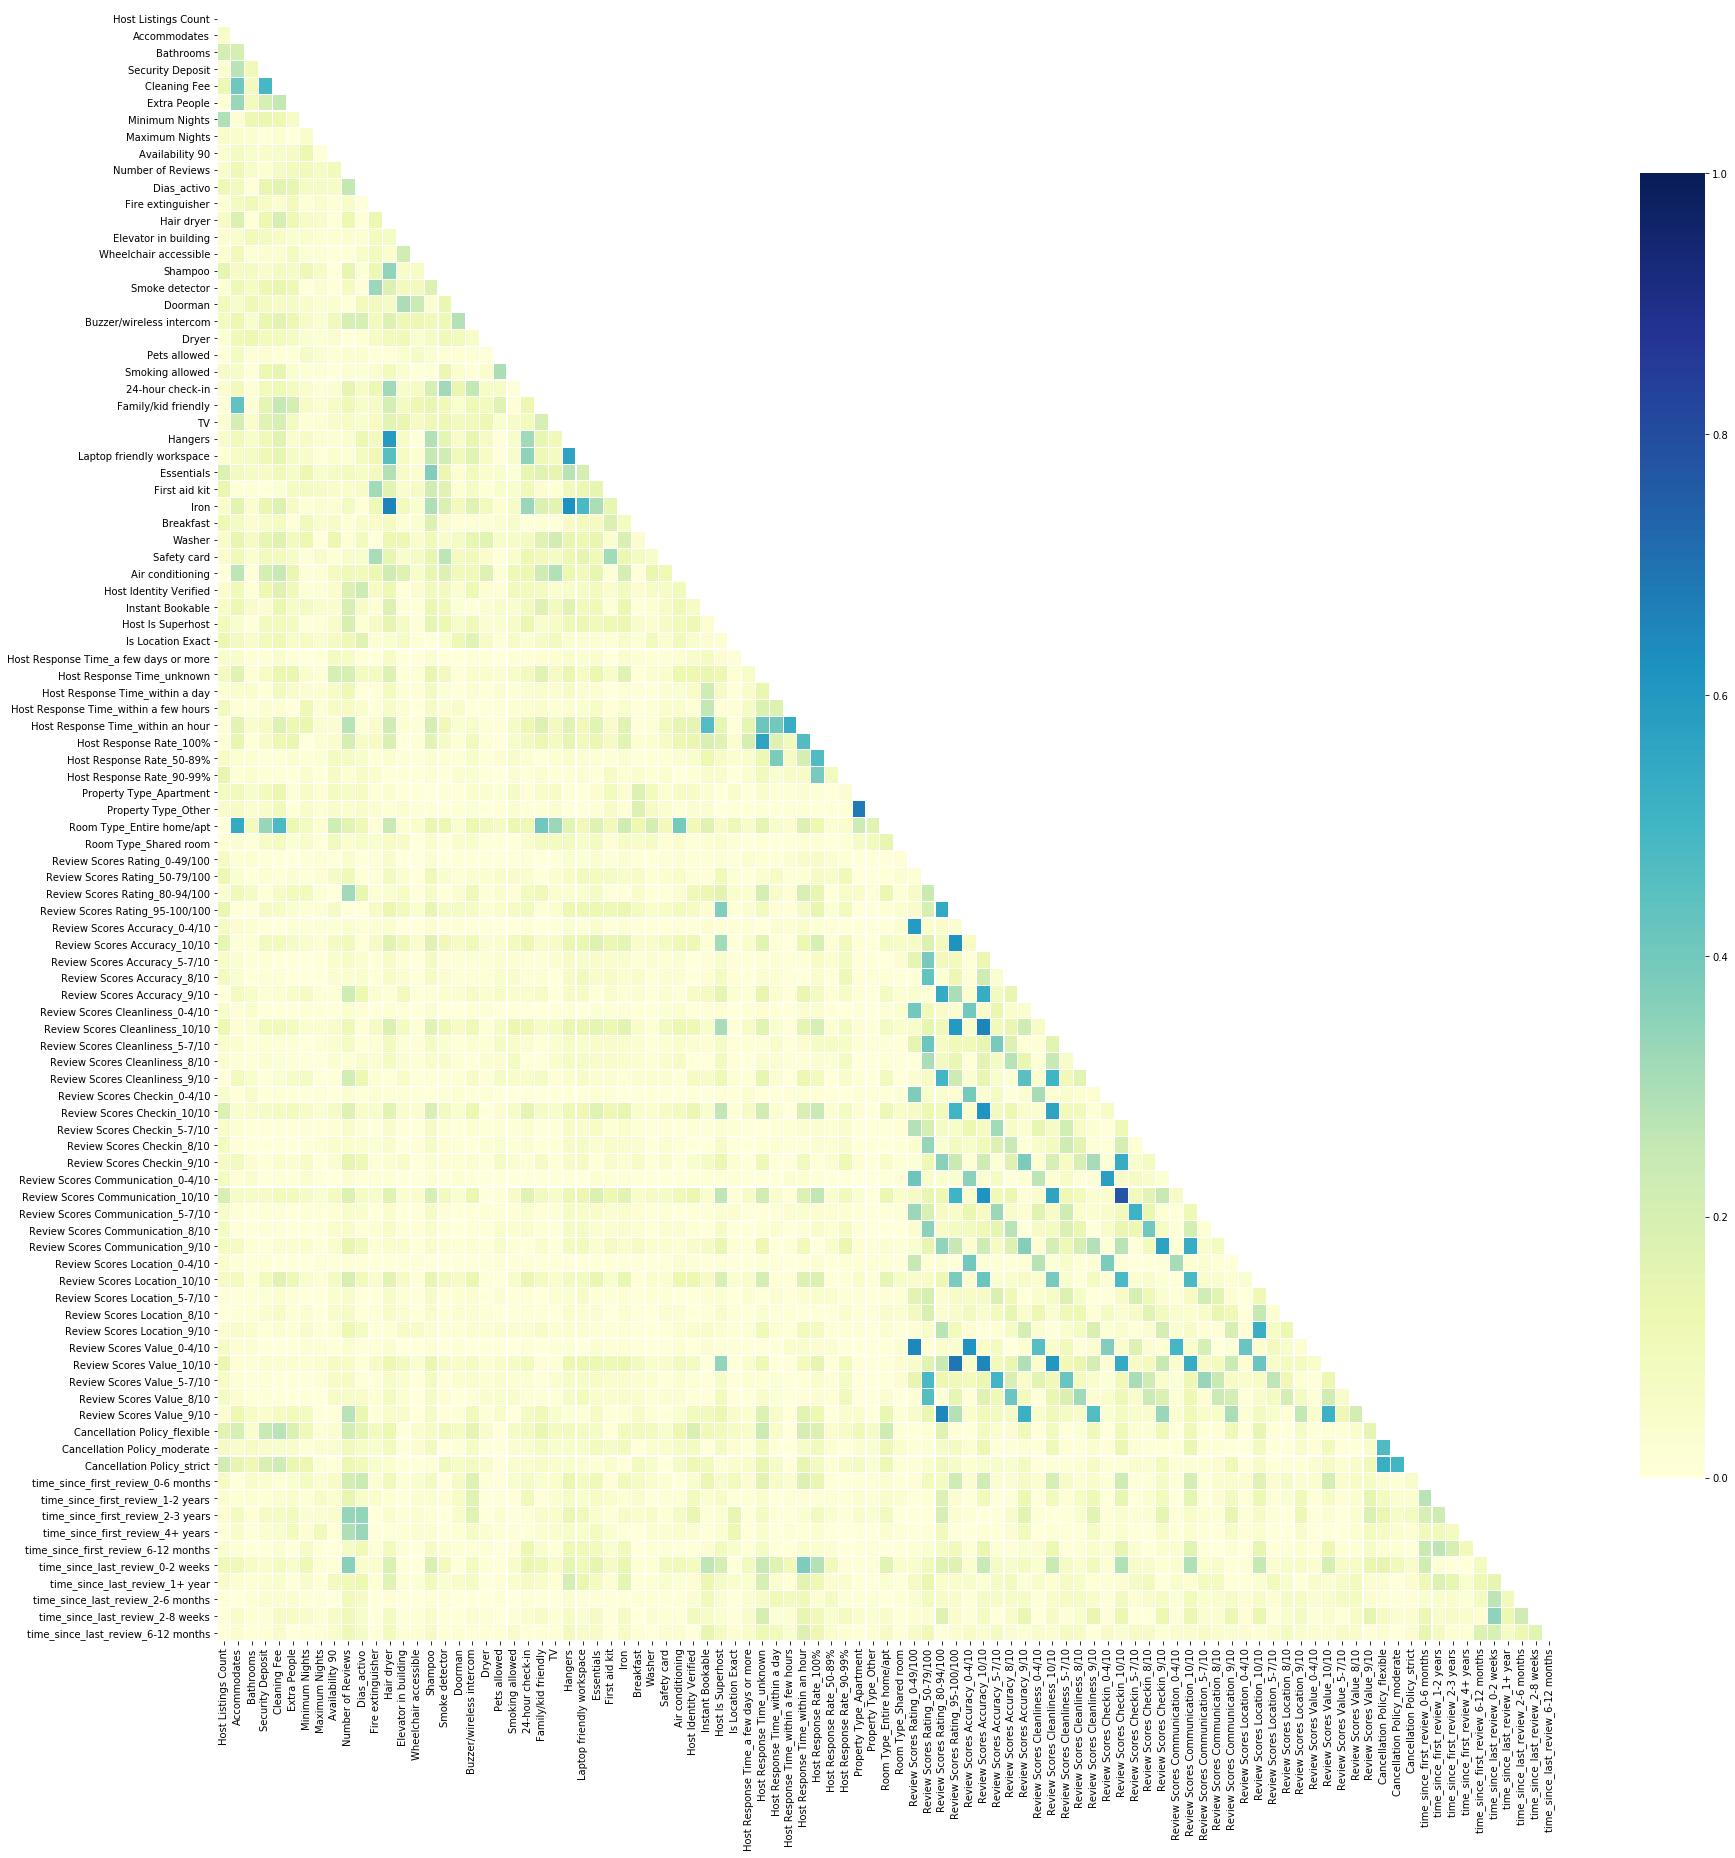

In [250]:
# Compute the correlation matrix
corr = np.abs(transformed_df_sinbarrios.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Se ve que aun quedan algunas características correladas por ejemplo si una propiedad tiene una categoría de review con 10/10 suele tener otro 10/10 en otras categorías. De momento lo voy a dejar y luego veré si experimentando con ellas se consigue mejorar el modelo

## 6.3. Estandarización y Normalización

Voy a representar el histograma de las variables numéricas para ver si a algunas de ellas se les podría aplicar alguna transformación logarítmica

In [251]:
numerical_columns = ['Price', 'Host Listings Count', 'Accommodates', 'Bathrooms', 'Security Deposit',
                    'Cleaning Fee', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 90', 'Number of Reviews',
                    'Dias_activo']

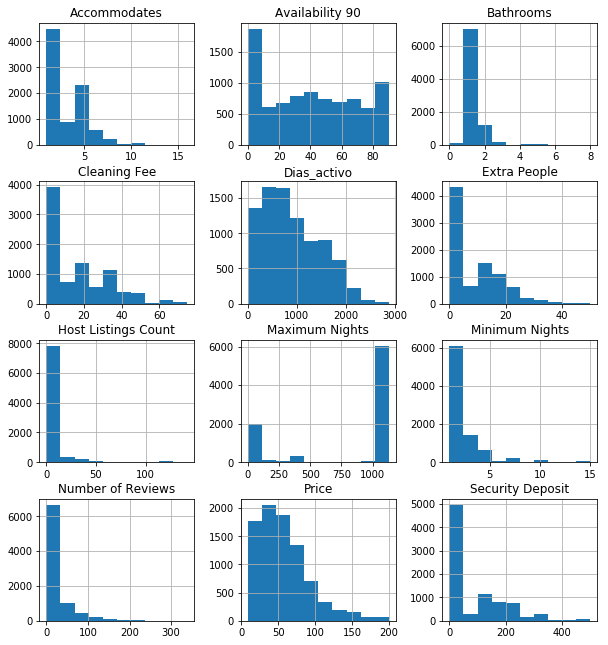

In [252]:
transformed_df[numerical_columns].hist(figsize=(10,11));

A exepción de  "Availability 90" y "Dias_activo" el resto de características numéricas se ve como están desplazadas hacia los laterales de la gráfica por lo que se pueden beneficiar de una transformación logarítmica 

In [253]:
# Transformación logarítmica de columnas
numerical_columns = [i for i in numerical_columns if i not in ['Availability 90', 'Dias_activo']] # Quito las que no se van a transformar

for col in numerical_columns:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])

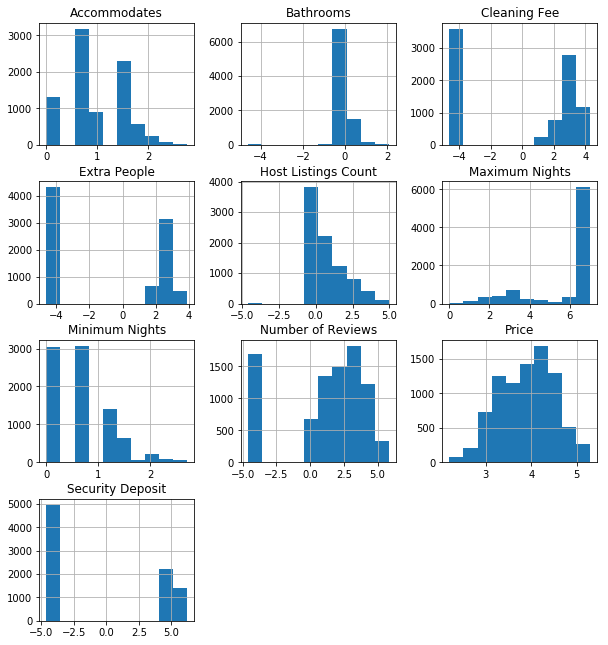

In [254]:
transformed_df[numerical_columns].hist(figsize=(10,11));

Vemos como la transformación ayuda al algunas variable sobre todo a la de Price que ahora aparace mucho más normalmente distribuida. Hay otras como "Cleaning Fee", "Extra People" y "Security Deposit" que contienen muchos 0 lo cual significa que no están normalmente distribuidas

Finalmente voy a separar las variables predictivas X de la variable objetivo y escalamos X. Utilizaré StandardScaler de sklearn

In [255]:
# Separamos X and y
X_train = transformed_df.drop('Price', axis=1)
y_train = transformed_df.Price

# Scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=list(X_train.columns))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## 6.4. Aplicar todas las transformaciones a las muestra de test

Antes de comenzar con el modelado tengo que coger las muestras de test que aparté en un principio y aplicarle todas las transformaciones que se le han hecho a las muestras de train

In [256]:
#Convierto de nuevo a pandas para seguir con el procesamiento
datos_test = pd.DataFrame(datos_test)

#Añado el nombre de las columnas
datos_test.columns = feature_names

precios_df = pd.DataFrame(price_test)
precios_df.columns = ['Price']

#Uno los dos dataframe para seguir con el analisis
house_data_test = pd.concat([precios_df, datos_test], axis=1)



Aplico a las muestras de test las mimas transformaciones que he aplicado a las de train sin mirar los datos

In [257]:
caracteristicas_para_borrar = ['ID','Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary','Space', 'Description', 
                               'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
                              'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL',
                              'Host Name', 'Host Location', 'Host About', 'Host Thumbnail Url', 'Host Picture Url',
                              'Host Neighbourhood', 'Host Verifications', 'Calendar last Scraped' 
                              ]
house_data_test.drop (caracteristicas_para_borrar, axis=1, inplace=True)
house_data_test.drop (['Host Acceptance Rate', 'Square Feet', 'Weekly Price', 'Monthly Price', 'Has Availability', 'License',
                  'Jurisdiction Names'], axis=1, inplace=True)
house_data_test.drop (['Host Total Listings Count'], axis=1, inplace=True)
house_data_test.drop (['Calculated host listings count'], axis=1, inplace=True)
    
house_data_test.dropna(subset=['City'], inplace=True)
house_madrid = house_data_test [house_data_test.City.str.contains("Madrid", case=False) |
               house_data_test.City.str.contains("Madrid,", case=False) |
               house_data_test.City.str.contains("Madid", case=False) |
               house_data_test.City.str.contains("(Madrid)", case=False) |
               house_data_test.City.str.contains("Delicias", case=False) |
               house_data_test.City.str.contains("Delicias-Madrid", case=False)]
house_madrid.drop (['City'], axis=1, inplace=True)
    
house_madrid.drop (['State', 'Street', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'Zipcode', 'Market', 
                    'Smart Location',  'Country Code', 'Country', 'Latitude', 'Longitude', 'Geolocation'], axis=1, inplace=True)
    
house_madrid ['Price'] = pd.to_numeric(house_madrid ['Price']) 
house_madrid.dropna(subset=['Price'], inplace=True) 
    
house_madrid.drop (['Experiences Offered'], axis=1, inplace=True)
    
house_madrid ['Host Since'] = pd.to_datetime(house_madrid ['Host Since']) 
# Calculo el número de dias
house_madrid['Dias_activo'] = (datetime(2017, 4, 8) - house_madrid['Host Since']).astype('timedelta64[D]')
# Si hay valores nulos los sustituyo por la mediana calculada en train
house_madrid.Dias_activo.fillna(mediana_host_since, inplace=True)
house_madrid.drop (['Host Since'], axis=1, inplace=True)
    
house_madrid ['Host Response Time'].fillna("unknown", inplace=True)
    
house_madrid ['Host Response Rate'] = pd.to_numeric(house_madrid ['Host Response Rate']) 
# Los agrupo en las mismas 4 categorías que en train
house_madrid['Host Response Rate'] = pd.cut(house_madrid['Host Response Rate'], 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)
# Convierto a cadena
house_madrid['Host Response Rate'] = house_madrid['Host Response Rate'].astype('str')
# Sustituyo los null por 'unknown'
house_madrid['Host Response Rate'].replace('nan', 'unknown', inplace=True)
    
house_madrid ['Host Listings Count'] = pd.to_numeric(house_madrid ['Host Listings Count']) 
house_madrid['Host Listings Count'].fillna(mediana_host_listings_count, inplace=True) #Relleno con la mediana calculada en train
    
house_madrid.dropna(subset=['Neighbourhood Cleansed'], inplace=True) 
house_madrid['Neighbourhood Cleansed'] [~house_madrid['Neighbourhood Cleansed'].isin(barrios_frecuentes)]='Otro_Barrio'


house_madrid ['Property Type'] [house_madrid ['Property Type'].isnull()]="Apartment"
house_madrid['Property Type'] [~house_madrid['Property Type'].isin(tipos_propiedades)]='Other'
    
house_madrid ['Property Type'].replace({
    'Condominium': 'Other',
    'Bed & Breakfast': 'Other',  
    'Loft': 'Apartment',
    'Dorm': 'Other',
    'Guesthouse': 'Other',
    'Chalet': 'House',
    'Hostel':  'Other',
    'Serviced apartment': 'Apartment',  
    'Townhouse': 'House',
    'Boutique hotel': 'Other',
    'Villa': 'House',
    'Earth House': 'House',
    'Guest suite': 'Other',
    'Casa particular': 'House',
    'Camper/RV': 'Other',
    'Boat': 'Other',
    'Tent': 'Other',
    'Timeshare': 'Other',  
    'Bungalow': 'House',
    
    }, inplace=True)
    
house_madrid ['Room Type'] [house_madrid ['Room Type'].isnull()]="Entire home/apt"
    
house_madrid ['Accommodates'] = pd.to_numeric(house_madrid ['Accommodates']) 
house_madrid['Accommodates'].fillna(mediana_accomodates, inplace=True) #Uso el valor de la mediana obtenido en train
    
house_madrid ['Bathrooms'] = pd.to_numeric(house_madrid ['Bathrooms']) 
house_madrid['Bathrooms'].fillna(mediana_bathrooms, inplace=True)   #Uso el valor de la mediana obtenido en train
    
house_madrid ['Bedrooms'] = pd.to_numeric(house_madrid ['Bedrooms']) 
house_madrid['Bedrooms'].fillna(mediana_bedrooms, inplace=True)   #Uso el valor de la mediana obtenido en train
    
house_madrid ['Beds'] = pd.to_numeric(house_madrid ['Beds']) 
house_madrid['Beds'].fillna(mediana_beds, inplace=True)   #Uso el valor de la mediana obtenido en train
    
house_madrid.drop('Bed Type', axis=1, inplace=True)
    
house_madrid['Amenities'].fillna("nada", inplace=True)

amenities_set = list (amenities_def)   
for amenities in amenities_set:
        house_madrid.loc[house_madrid['Amenities'].str.contains(amenities), amenities] = 1
indice = house_madrid.columns.get_loc("Dias_activo")+1
cols_to_replace_nulls = house_madrid.iloc[:,indice:].columns
house_madrid[cols_to_replace_nulls] = house_madrid[cols_to_replace_nulls].fillna(0)

house_madrid.drop('Amenities', axis=1, inplace=True)
    
house_madrid ['Security Deposit'] = pd.to_numeric(house_madrid ['Security Deposit']) 
house_madrid['Security Deposit'].fillna(0, inplace=True)
    
house_madrid ['Cleaning Fee'] = pd.to_numeric(house_madrid ['Cleaning Fee']) 
house_madrid['Cleaning Fee'].fillna(0, inplace=True)
    
house_madrid ['Guests Included'] = pd.to_numeric(house_madrid ['Guests Included']) 
house_madrid['Guests Included'].fillna(mediana_guests_included, inplace=True)  #uso la mediana calculada en train
    
house_madrid ['Extra People'] = pd.to_numeric(house_madrid ['Extra People']) 
house_madrid['Extra People'].fillna(mediana_extra_people, inplace=True)   #uso la mediana calculada en train
    
house_madrid ['Minimum Nights'] = pd.to_numeric(house_madrid ['Minimum Nights']) 
house_madrid['Minimum Nights'].fillna(mediana_minimum_nights, inplace=True)   #uso la mediana calculada en train
    
house_madrid ['Maximum Nights'] = pd.to_numeric(house_madrid ['Maximum Nights']) 
house_madrid['Maximum Nights'].fillna(mediana_maximum_nights, inplace=True)  #uso la mediana calculada en train
    
house_madrid.drop('Calendar Updated', axis=1, inplace=True)
    
house_madrid.drop(['Availability 30', 'Availability 60', 'Availability 365'], axis=1, inplace=True)
house_madrid ['Availability 90'] = pd.to_numeric(house_madrid ['Availability 90']) 
house_madrid['Availability 90'].fillna(mediana_availability_90, inplace=True)  #uso la mediana calculada en train
    
house_madrid ['Number of Reviews'] = pd.to_numeric(house_madrid ['Number of Reviews']) 
house_madrid['Number of Reviews'].fillna(0, inplace=True)
    
house_madrid['First Review'] = pd.to_datetime(house_madrid['First Review']) 
house_madrid['time_since_first_review'] = (pd.datetime(2017, 4, 8) - house_madrid['First Review']).astype('timedelta64[D]')

# Agrupación de time since first review. La misma que tengo en train
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(house_madrid['time_since_first_review'])],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'])
house_madrid.loc[house_madrid['time_since_first_review'].str.contains('nan'), 'time_since_first_review'] = 'no reviews'
house_madrid.drop(['First Review'], axis=1, inplace=True)

house_madrid['Last Review'] = pd.to_datetime(house_madrid['Last Review'])
house_madrid['time_since_last_review'] = (pd.datetime(2017, 4, 8) - house_madrid['Last Review']).astype('timedelta64[D]')

bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(house_madrid['time_since_last_review'])],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'])
house_madrid.loc[house_madrid['time_since_last_review'].str.contains('nan'), 'time_since_last_review'] = 'no reviews'
house_madrid.drop(['Last Review'], axis=1, inplace=True)
    
house_madrid ['Review Scores Rating'] = pd.to_numeric(house_madrid ['Review Scores Rating'])
house_madrid ['Review Scores Accuracy'] = pd.to_numeric(house_madrid ['Review Scores Accuracy'])
house_madrid ['Review Scores Cleanliness'] = pd.to_numeric(house_madrid ['Review Scores Cleanliness'])
house_madrid ['Review Scores Checkin'] = pd.to_numeric(house_madrid ['Review Scores Checkin'])
house_madrid ['Review Scores Communication'] = pd.to_numeric(house_madrid ['Review Scores Communication'])
house_madrid ['Review Scores Location'] = pd.to_numeric(house_madrid ['Review Scores Location'])
house_madrid ['Review Scores Value'] = pd.to_numeric(house_madrid ['Review Scores Value'])

variables_to_plot = list(house_madrid.columns[house_madrid.columns.str.startswith("Review Scores") == True])
variables_to_plot.pop(0)
for col in variables_to_plot:
        bin_column(col,
               bins=[0, 4, 7, 8, 9, 10],
               labels=['0-4/10','5-7/10','8/10', '9/10', '10/10'])
#Los nan los sustituo por 'no reviews'
for col in variables_to_plot:
        house_madrid.loc[house_madrid[col].str.contains('nan'), col] = 'no reviews'  
        
bin_column('Review Scores Rating',
           bins=[0, 50, 80, 95, 100],
           labels=['0-49/100', '50-79/100','80-94/100', '95-100/100'])
house_madrid.loc[house_madrid['Review Scores Rating'].str.contains('nan'), 'Review Scores Rating'] = 'no reviews'
    

house_madrid ['Cancellation Policy'] [house_madrid ['Cancellation Policy'].isnull()]="strict"
house_madrid['Cancellation Policy'] [~house_madrid['Cancellation Policy'].isin(tipo_cancelacion)]='strict'
    
house_madrid.drop(['Reviews per Month' ], axis=1, inplace=True)
    
house_madrid['Features'].fillna("nada", inplace=True)

features_set = list (features_def)  
    
for features in features_set:
        house_madrid.loc[house_madrid['Features'].str.contains(features), features] = 1
indice = house_madrid.columns.get_loc("time_since_last_review")+1
# Los nulos de las nuevas columnas que he añadido los sustituyo por 0 
cols_to_replace_nulls = house_madrid.iloc[:,indice:].columns
house_madrid[cols_to_replace_nulls] = house_madrid[cols_to_replace_nulls].fillna(0)

house_madrid.drop('Features', axis=1, inplace=True)

#Outliers
house_madrid = house_madrid [house_madrid ['Price']<=200]
house_madrid = house_madrid [house_madrid ['Host Listings Count']<=150]
house_madrid = house_madrid [house_madrid ['Security Deposit']<=500]
house_madrid = house_madrid [house_madrid ['Cleaning Fee']<=75]
house_madrid = house_madrid [house_madrid ['Extra People']<=50]
house_madrid = house_madrid [house_madrid ['Minimum Nights']<=15]
house_madrid = house_madrid [house_madrid ['Maximum Nights']<1150]
    
transformed_df = pd.get_dummies(house_madrid)

to_drop = ['Beds',
           'Bedrooms',
           'Guests Included', 
           'Carbon monoxide detector',
           'Host Response Rate_0-49%',
           'Host Response Rate_unknown',
           'Property Type_House',
           'Room Type_Private room']

to_drop.extend(list(transformed_df.columns[transformed_df.columns.str.endswith('no reviews')]))
transformed_df.drop(to_drop, axis=1, inplace=True)
    
numerical_columns = ['Price', 'Host Listings Count', 'Accommodates', 'Bathrooms', 'Security Deposit',
                    'Cleaning Fee', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 90', 'Number of Reviews',
                    'Dias_activo']
    
numerical_columns = [i for i in numerical_columns if i not in ['Availability 90', 'Dias_activo']] # Quito las que no se van a transformar

for col in numerical_columns:
        transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
        transformed_df[col] = np.log(transformed_df[col])
        
# Separamos X and y
X_test = transformed_df.drop('Price', axis=1)
y_test = transformed_df.Price

# Scaling
scaler = StandardScaler()
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=list(X_test.columns)) 
    
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## 7.- Modelado

Una vez terminado el procesamiento de los datos vamos a aplicar diferentes modelos "Supervised Machine Learning" y los compararemos entre si. La métrica que usaré al ser un problema de regresión es el RMSE (Error cuadrático medio)

Al haber dividido en train y test antes de cualquier procesado y haber realizado la conversión de variables categóricas con el metodo dumy podría ocurrir que tenga diferente número de características en un cojunto y en otro. Voya asegurarme que tengo en los dos lo mismo y que las características están ordenadas de la misma manera:

In [258]:
missing_cols = set (X_train.columns) - set (X_test.columns)
#Caso de que que en test no tenga las mismas columnas las añado con valor 0
for c in missing_cols:
    X_test [c]=0
#Me aseguro que el orden de las columnas en test sea el mismo que en train
X_test = X_test[X_train.columns]    

In [259]:
X_train.head(1)

,Host Listings Count,Accommodates,Bathrooms,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Maximum Nights,Availability 90,Number of Reviews,Dias_activo,Fire extinguisher,Hair dryer,Elevator in building,Wheelchair accessible,Shampoo,Smoke detector,Doorman,Buzzer/wireless intercom,Dryer,Pets allowed,Smoking allowed,24-hour check-in,Family/kid friendly,TV,Hangers,Laptop friendly workspace,Essentials,First aid kit,Iron,Breakfast,Washer,Safety card,Air conditioning,Host Identity Verified,Instant Bookable,Host Is Superhost,Is Location Exact,Host Response Time_a few days or more,Host Response Time_unknown,Host Response Time_within a day,Host Response Time_within a few hours,Host Response Time_within an hour,Host Response Rate_100%,Host Response Rate_50-89%,Host Response Rate_90-99%,Neighbourhood Cleansed_Acacias,Neighbourhood Cleansed_Almagro,Neighbourhood Cleansed_Arapiles,Neighbourhood Cleansed_Argüelles,Neighbourhood Cleansed_Cortes,Neighbourhood Cleansed_Cuatro Caminos,Neighbourhood Cleansed_Embajadores,Neighbourhood Cleansed_Gaztambide,Neighbourhood Cleansed_Goya,Neighbourhood Cleansed_Guindalera,Neighbourhood Cleansed_Justicia,Neighbourhood Cleansed_Lista,Neighbourhood Cleansed_Otro_Barrio,Neighbourhood Cleansed_Pacífico,Neighbourhood Cleansed_Palacio,Neighbourhood Cleansed_Palos de Moguer,Neighbourhood Cleansed_Puerta del Angel,Neighbourhood Cleansed_Recoletos,Neighbourhood Cleansed_Sol,Neighbourhood Cleansed_Trafalgar,Neighbourhood Cleansed_Universidad,Property Type_Apartment,Property Type_Other,Room Type_Entire home/apt,Room Type_Shared room,Review Scores Rating_0-49/100,Review Scores Rating_50-79/100,Review Scores Rating_80-94/100,Review Scores Rating_95-100/100,Review Scores Accuracy_0-4/10,Review Scores Accuracy_10/10,Review Scores Accuracy_5-7/10,Review Scores Accuracy_8/10,Review Scores Accuracy_9/10,Review Scores Cleanliness_0-4/10,Review Scores Cleanliness_10/10,Review Scores Cleanliness_5-7/10,Review Scores Cleanliness_8/10,Review Scores Cleanliness_9/10,Review Scores Checkin_0-4/10,Review Scores Checkin_10/10,Review Scores Checkin_5-7/10,Review Scores Checkin_8/10,Review Scores Checkin_9/10,Review Scores Communication_0-4/10,Review Scores Communication_10/10,Review Scores Communication_5-7/10,Review Scores Communication_8/10,Review Scores Communication_9/10,Review Scores Location_0-4/10,Review Scores Location_10/10,Review Scores Location_5-7/10,Review Scores Location_8/10,Review Scores Location_9/10,Review Scores Value_0-4/10,Review Scores Value_10/10,Review Scores Value_5-7/10,Review Scores Value_8/10,Review Scores Value_9/10,Cancellation Policy_flexible,Cancellation Policy_moderate,Cancellation Policy_strict,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months,time_since_last_review_0-2 weeks,time_since_last_review_1+ year,time_since_last_review_2-6 months,time_since_last_review_2-8 weeks,time_since_last_review_6-12 months
0,2.487998,0.752749,-0.260085,1.166313,1.007893,1.121345,0.082189,0.578171,-1.366825,0.345699,1.72383,-0.458977,-1.116453,0.810093,2.949864,-1.3313,-0.425653,2.02674,1.100794,-0.438748,2.131415,1.655158,-0.573136,0.827557,0.524426,-1.409041,-1.025243,0.399162,-0.605789,-1.15024,-0.439692,0.417991,-0.328655,0.936334,0.870417,-0.750956,-0.36819,0.743952,-0.139545,-0.380726,-0.369006,-0.485176,0.91572,0.67875,-0.318774,-0.264146,-0.107451,-0.102923,-0.114444,-0.146747,-0.239832,-0.102344,-0.408331,-0.102923,-0.129214,-0.117027,-0.25051,-0.098799,-0.641282,-0.104073,-0.300245,-0.144663,-0.126865,-0.101176,3.547597,-0.152844,-0.332556,0.423169,-0.286429,0.849515,-0.123506,-0.071771,-0.294912,1.220121,-0.664691,-0.063053,1.087178,-0.143399,-0.245749,-0.581744,-0.063977,-0.874765,-0.185292,-0.283323,1.743149,-0.047094,-1.173489,-0.096366,-0.175306,2.200186,-0.047094,-1.19506,-0.093873,-0.171025,2.248334,-0.032393,0.95981,-0.11019,-0.241457,-0.504509,-0.060196,-0.727405,-0.16

In [260]:
X_test.head(1)

,Host Listings Count,Accommodates,Bathrooms,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Maximum Nights,Availability 90,Number of Reviews,Dias_activo,Fire extinguisher,Hair dryer,Elevator in building,Wheelchair accessible,Shampoo,Smoke detector,Doorman,Buzzer/wireless intercom,Dryer,Pets allowed,Smoking allowed,24-hour check-in,Family/kid friendly,TV,Hangers,Laptop friendly workspace,Essentials,First aid kit,Iron,Breakfast,Washer,Safety card,Air conditioning,Host Identity Verified,Instant Bookable,Host Is Superhost,Is Location Exact,Host Response Time_a few days or more,Host Response Time_unknown,Host Response Time_within a day,Host Response Time_within a few hours,Host Response Time_within an hour,Host Response Rate_100%,Host Response Rate_50-89%,Host Response Rate_90-99%,Neighbourhood Cleansed_Acacias,Neighbourhood Cleansed_Almagro,Neighbourhood Cleansed_Arapiles,Neighbourhood Cleansed_Argüelles,Neighbourhood Cleansed_Cortes,Neighbourhood Cleansed_Cuatro Caminos,Neighbourhood Cleansed_Embajadores,Neighbourhood Cleansed_Gaztambide,Neighbourhood Cleansed_Goya,Neighbourhood Cleansed_Guindalera,Neighbourhood Cleansed_Justicia,Neighbourhood Cleansed_Lista,Neighbourhood Cleansed_Otro_Barrio,Neighbourhood Cleansed_Pacífico,Neighbourhood Cleansed_Palacio,Neighbourhood Cleansed_Palos de Moguer,Neighbourhood Cleansed_Puerta del Angel,Neighbourhood Cleansed_Recoletos,Neighbourhood Cleansed_Sol,Neighbourhood Cleansed_Trafalgar,Neighbourhood Cleansed_Universidad,Property Type_Apartment,Property Type_Other,Room Type_Entire home/apt,Room Type_Shared room,Review Scores Rating_0-49/100,Review Scores Rating_50-79/100,Review Scores Rating_80-94/100,Review Scores Rating_95-100/100,Review Scores Accuracy_0-4/10,Review Scores Accuracy_10/10,Review Scores Accuracy_5-7/10,Review Scores Accuracy_8/10,Review Scores Accuracy_9/10,Review Scores Cleanliness_0-4/10,Review Scores Cleanliness_10/10,Review Scores Cleanliness_5-7/10,Review Scores Cleanliness_8/10,Review Scores Cleanliness_9/10,Review Scores Checkin_0-4/10,Review Scores Checkin_10/10,Review Scores Checkin_5-7/10,Review Scores Checkin_8/10,Review Scores Checkin_9/10,Review Scores Communication_0-4/10,Review Scores Communication_10/10,Review Scores Communication_5-7/10,Review Scores Communication_8/10,Review Scores Communication_9/10,Review Scores Location_0-4/10,Review Scores Location_10/10,Review Scores Location_5-7/10,Review Scores Location_8/10,Review Scores Location_9/10,Review Scores Value_0-4/10,Review Scores Value_10/10,Review Scores Value_5-7/10,Review Scores Value_8/10,Review Scores Value_9/10,Cancellation Policy_flexible,Cancellation Policy_moderate,Cancellation Policy_strict,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months,time_since_last_review_0-2 weeks,time_since_last_review_1+ year,time_since_last_review_2-6 months,time_since_last_review_2-8 weeks,time_since_last_review_6-12 months
0,-0.787484,-1.652829,-0.23132,-0.801669,0.498374,-0.979693,-1.054284,0.565433,0.201424,0.395924,-0.986738,-0.443151,-1.114509,0.824973,-0.347945,-1.351844,-0.415359,-0.471638,1.07868,-0.430001,-0.472493,-0.61313,-0.561136,-1.20405,0.507666,0.702101,0.962371,0.396863,1.669527,0.880225,-0.443586,0.415359,-0.333133,-1.052682,0.873001,1.333677,2.682292,0.757734,-0.154175,-0.379828,-0.363358,-0.488668,0.920533,0.696965,-0.31378,-0.289813,-0.109644,-0.115786,-0.123899,-0.135727,-0.235736,-0.084078,-0.412226,-0.110898,-0.128318,-0.1294,-0.242674,-0.091869,1.510225,-0.104485,-0.278719,-0.139797,-0.122771,-0.099069,-0.269035,-0.132599,-0.354734,0.453141,-0.312741,-1.139821,-0.128318,-0.063766,-0.302221,-0.829603,1.504472,-0.063766,1.079266,-0.14376,-0.256111,-0.58317,-0.065866,1.13234,-0.166574,-0.297408,-0.579013,-0.049353,0.848287,-0.101811,-0.18611,-0.456599,-0.05203,0.81668,-0.105797,-0.170806,-0.436155,-0.03288,-1.030709,-0.122771,-0.227322,1.884242,-0.063766,1.355844,-0

## 7.1.- Modelo Regresión Lineal 

Aplico un modelo de regresión simple:

In [261]:
hpm_reg_start = time.time()

# Modelo de regresión lineal de Scikit-Learn
hpm_reg = LinearRegression() 

# Entreno el modelo con los datos de train:
hpm_reg.fit(X_train, y_train) 

# Tras el entrenamiento hacemos la predicción usando las muestras de test 
training_preds_hpm_reg = hpm_reg.predict(X_train)
val_preds_hpm_reg = hpm_reg.predict(X_test)

hpm_reg_end = time.time()

print(f"Time taken to run: {round((hpm_reg_end - hpm_reg_start)/60,1)} minutes")

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, training_preds_hpm_reg),4))
print("Test RMSE:", round(mean_squared_error(y_test, val_preds_hpm_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_hpm_reg),4))
print("Test r2:", round(r2_score(y_test, val_preds_hpm_reg),4))

Time taken to run: 0.0 minutes

Training RMSE: 0.1009
Test RMSE: 4206736812985092.5

Training r2: 0.722
Test r2: -1.1209748867894376e+16


Vemos que en train si tenemos un resultado aceptable pero el error en Test es muy alto con lo que este modelo simple de regresión lineal no nos sirve. 

## 7.2.- Regularización: Ridge Regression

Consiste en penalizar los coeficientes de alto valor añadiendo un parámetro alfa. Voy a probar la regularización con alpha = 0.01, 0.1, 1, 10, 100

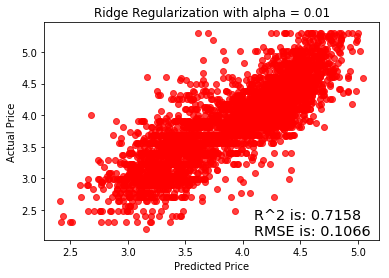

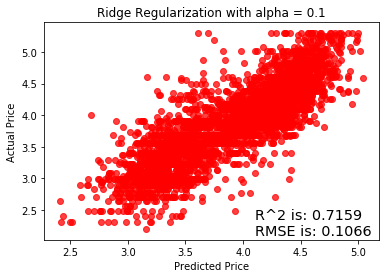

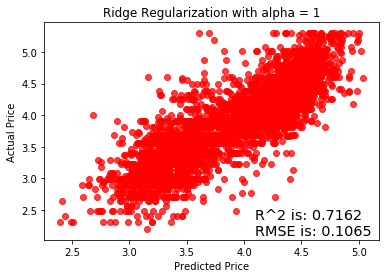

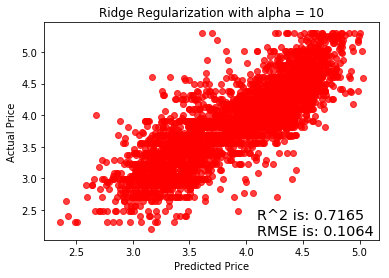

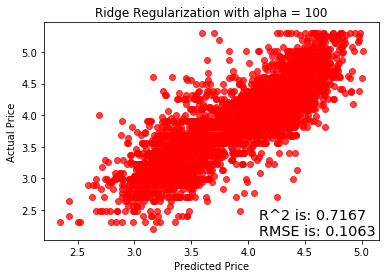

In [264]:
#lr = LinearRegression()
actual_values = y_test

for i in range (-2, 3):
    alpha = 10**i
    rm = Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='r')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                   
                   round(ridge_model.score(X_test, y_test), 4),
                   round(mean_squared_error(y_test, preds_ridge),4))
                    
    plt.annotate( s=overlay,xy=(4.1,2.1),size='x-large')
    plt.show()
    

Se puede ver que el error en test ha mejorado. Para encontrar el mejor valor de alfa recurrimos a la validación cruzada

Valores de alpha: [1.00000000e-15 4.52035366e-15 2.04335972e-14 9.23670857e-14
 4.17531894e-13 1.88739182e-12 8.53167852e-12 3.85662042e-11
 1.74332882e-10 7.88046282e-10 3.56224789e-09 1.61026203e-08
 7.27895384e-08 3.29034456e-07 1.48735211e-06 6.72335754e-06
 3.03919538e-05 1.37382380e-04 6.21016942e-04 2.80721620e-03
 1.26896100e-02 5.73615251e-02 2.59294380e-01 1.17210230e+00
 5.29831691e+00 2.39502662e+01 1.08263673e+02 4.89390092e+02
 2.21221629e+03 1.00000000e+04]
best mean cross-validation score: -0.104
best parameters: {'alpha': 23.950266199874907}


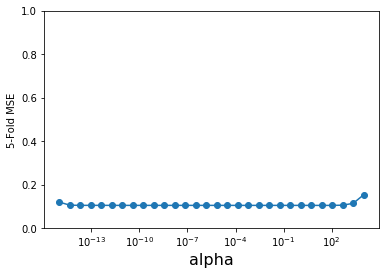

In [265]:
alpha_vector = np.logspace(-15,4,30)
param_grid = {'alpha': alpha_vector }
print (f'Valores de alpha: {alpha_vector}')
grid = GridSearchCV(Ridge(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.ylim((0, 1))
plt.show()

Entreno ahora el modelo con el valor de alfa óptimo que he encontrado usando validación cruzada

In [266]:
alpha_optimo = grid.best_params_['alpha']
ridge = Ridge(alpha = alpha_optimo).fit(X_train,y_train)

# predicción
y_hat = ridge.predict(X_test)
w = ridge.coef_
norm_w2 = np.dot(w,w.T)

# error
error_test = np.mean(np.power(y_test - y_hat,2)) 

print ('alpha_optimo =', alpha_optimo )
print ('RMSE test =', np.sqrt(error_test) )
print ('R^2 test =', round (ridge.score(X_test, y_test), 4))
print ('Coeficientes:')
print (w)



alpha_optimo = 23.950266199874907
RMSE test = 0.3260955447996575
R^2 test = 0.7166
Coeficientes:
[-2.72737290e-02  2.20531364e-01  2.71561416e-02  2.15746600e-02
 -4.67686385e-03 -7.33920395e-02 -6.37144125e-03  5.83254263e-03
  6.83816428e-02 -1.68146166e-01  2.92283185e-02  1.50298598e-02
  1.03368728e-02 -5.21596656e-04  2.80846349e-02  1.29518621e-04
  4.11660911e-02  2.36261263e-03  3.33072505e-02 -4.85882334e-03
  1.85595147e-02  4.72572052e-03  1.49961798e-02 -9.45981079e-04
  2.36961091e-03  1.81519838e-02 -2.04260504e-02 -1.23681674e-03
 -4.91063268e-03 -1.25971375e-02 -1.23858436e-02  5.58003495e-03
  7.37628463e-03  5.74906946e-03  2.62109980e-02  6.62801832e-03
  5.07769904e-03 -1.78274190e-03  1.03895270e-02  3.24221945e-02
 -9.94064878e-03 -1.71286827e-02 -4.51315943e-03  2.61062122e-02
  1.00900018e-02  2.78540367e-03 -4.66396237e-03  1.15058721e-02
  6.21490537e-03 -5.50524722e-03  2.58596817e-02 -7.82507348e-04
  5.19695305e-03 -9.23116874e-03  1.32360908e-02 -9.254278

## 7.3.- Selección de características: Lasso

Con la selección de características buscamos reducir la dimensionalidad del problema

best mean cross-validation score: -0.104
best parameters: {'alpha': 0.0006951927961775605}


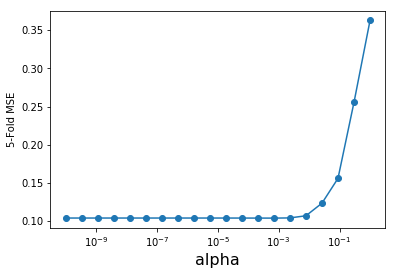

In [267]:
import warnings
warnings.filterwarnings('ignore')

#Ya tengo los datos escalados tanto de train como de test

alpha_vector = np.logspace(-10,0,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))


scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [269]:
feature_names = X_train.columns[0:]

#Ya lo tengo escalado

alpha_optimo = grid.best_params_['alpha']*10
lasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)

ytrainLasso = lasso.predict(X_train)
ytestLasso  = lasso.predict(X_test)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

print ('R^2 test =', round (lasso.score(X_test, y_test), 4))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

RMSE Modelo Lasso (train): 0.323
RMSE Modelo Lasso (test) : 0.331
R^2 test = 0.7089
Host Listings Count -0.017960506828767306
Accommodates 0.21151941537545565
Bathrooms 0.02076229659076727
Security Deposit 0.015484111668080757
Cleaning Fee 0.0
Extra People -0.06024942613426128
Minimum Nights -0.0
Maximum Nights 0.0
Availability 90 0.056091122792041315
Number of Reviews -0.07859669243320591
Dias_activo 0.024189942624168626
Hair dryer 0.007473409647411096
Shampoo 0.0067917106391671865
Buzzer/wireless intercom 0.0
Dryer 0.023277577244303443
Safety card 0.0
Air conditioning 0.04364155849347717
Breakfast 0.0
Elevator in building 0.029781190755855735
Wheelchair accessible -0.0
TV 0.017216436525245554
24-hour check-in 0.0
Family/kid friendly 0.007585419049639569
Fire extinguisher 0.0
Essentials 0.0
Doorman 0.013143891573466767
Hangers -0.003471756270886539
Laptop friendly workspace -0.0
Pets allowed -0.0
Washer -0.0015127536529374386
Smoking allowed -0.010545718463291902
First aid kit 0.00233

Se puede apreciar que el error es un poco más alto que el conseguido con Ridge (RMSE=0.326) pero con este modelo
se ve que hay algunas características que se pueden eliminar (coeficientes a 0) con lo que se reduce la complejidad del modelo a cambio de tener un error algo más alto (RMSE = 0.331)

In [270]:
#Características que se pueden eliminar del modelo al salir con coeficiente 0
for f,wi in zip(feature_names,w):
    if (wi==0):
        print(f)

Cleaning Fee
Minimum Nights
Maximum Nights
Buzzer/wireless intercom
Safety card
Breakfast
Wheelchair accessible
24-hour check-in
Fire extinguisher
Essentials
Laptop friendly workspace
Pets allowed
Iron
Is Location Exact
Host Identity Verified
Instant Bookable
Host Response Time_within a day
Host Response Time_within an hour
Host Response Rate_100%
Host Response Rate_50-89%
Neighbourhood Cleansed_Acacias
Neighbourhood Cleansed_Arapiles
Neighbourhood Cleansed_Cuatro Caminos
Neighbourhood Cleansed_Embajadores
Neighbourhood Cleansed_Lista
Neighbourhood Cleansed_Trafalgar
Review Scores Rating_0-49/100
Review Scores Rating_80-94/100
Review Scores Accuracy_0-4/10
Review Scores Accuracy_5-7/10
Review Scores Accuracy_9/10
Review Scores Cleanliness_0-4/10
Review Scores Cleanliness_9/10
Review Scores Checkin_0-4/10
Review Scores Checkin_10/10
Review Scores Checkin_8/10
Review Scores Communication_0-4/10
Review Scores Communication_10/10
Review Scores Communication_5-7/10
Review Scores Communicati

Viendo todas las características que se puede eliminar y el pequeño incremento de error de RMSE=0.326 a RMSE = 0.331 me quedo con este modelo de Lasso de momento

## 7.4.- Árbol de Regresión

Utilizo GridSearch para determinar el mejor parámetro de profundidad.

best mean cross-validation score: 0.686
best parameters: {'max_depth': 7}


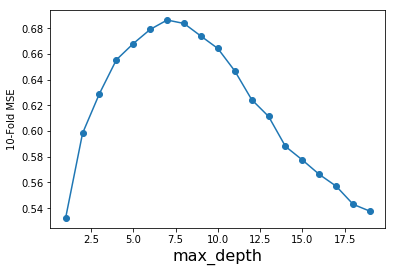

In [271]:
maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [272]:
#El varlos ótimo es 7, viendo la gráfica no hay mucha diferencia si
#pruebo con 5 y es menos complejo
#maxDepthOptimo = grid.best_params_['max_depth']
maxDepthOptimo = 5
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)


ytrainarbol = treeModel.predict(X_train)
ytestarbol = treeModel.predict(X_test)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))

print ('R^2 test =', round (treeModel.score(X_test, y_test), 4))




RMSE Modelo  (train): 0.337
RMSE Modelo  (test) : 0.35
R^2 test = 0.6733


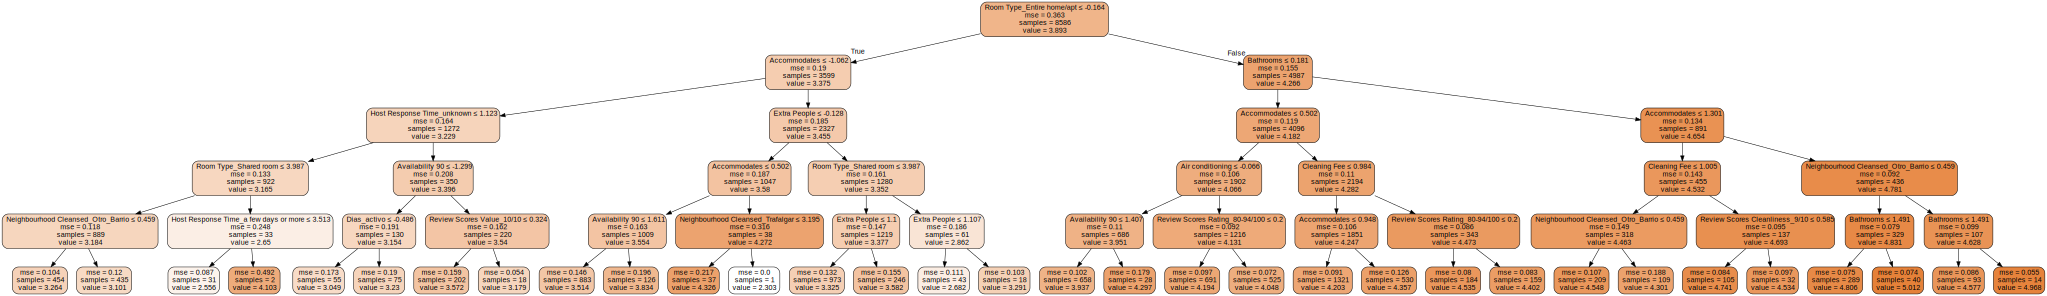

In [273]:
dot_data = tree.export_graphviz(treeModel, out_file=None, 
                         feature_names=feature_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 

graph

No se consiguen mejores prestaciones que con Lasso

## 7.5.- Random forest

best mean cross-validation score: 0.725
best parameters: {'max_depth': 14}


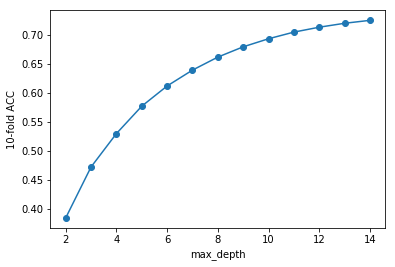

In [274]:
maxDepth = range(2,15)

tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=600, max_features='sqrt'), param_grid=tuned_parameters,cv=10)
#grid = GridSearchCV(RandomForestRegressor(random_state=0, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [275]:
#El valor óptimo es 14 y la tendencia parece que va hacia arriba. 
#Voy a poner 8 que es menos complejo y no hay mucha diferencia de puntuación

#maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=8,n_estimators=600,max_features='sqrt').fit(X_train,y_train)

ytrainarbol = bagModel.predict(X_train)
ytestarbol = bagModel.predict(X_test)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))

print ('R^2 test =', round (bagModel.score(X_test, y_test), 4))




RMSE Modelo  (train): 0.327
RMSE Modelo  (test) : 0.359
R^2 test = 0.6565


Me está dando este modelo prestaciones parecedias a las de un árbol simple

Veo ahora cuales son las características más importantes:

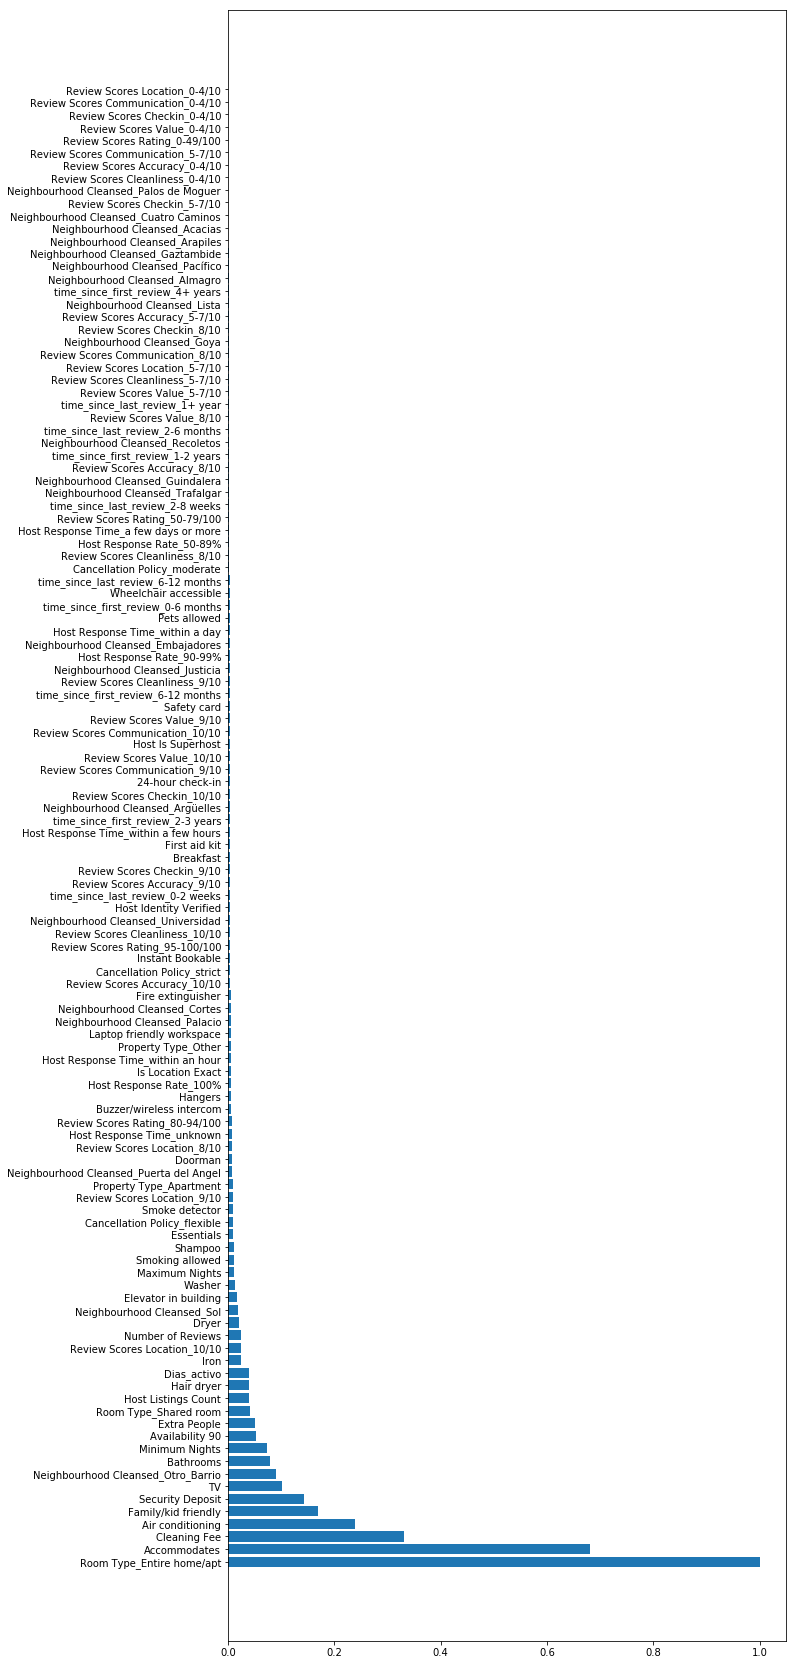

In [276]:
feature_names = X_train.columns[0:]
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,30))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

In [277]:
feature_names[indices[0:10]]

Index(['Room Type_Entire home/apt', 'Accommodates', 'Cleaning Fee',
       'Air conditioning', 'Family/kid friendly', 'Security Deposit', 'TV',
       'Neighbourhood Cleansed_Otro_Barrio', 'Bathrooms', 'Minimum Nights'],
      dtype='object')

La importancia proporciona una puntuación que indica como de útil o valiosa es cada característica en la construcción de los árboles de decisión dentro del modelo. Cuanto más se usa un atributo para tomar decisiones clave con árboles de decisión, mayor es su importancia relativa.

Como se puede ver en la gráfica un buen número de caracterísitcas tienen una importancia de 0 por lo que se podrían eliminar en el modelo. La característica más importante es que la vivienda sea de tipo "Entire home/apt" lo cual tiene sentido. El precio será mayor si se ofrece para alquilé la casa completa. Por tanto a nivel prático es mucho mejor ofertar el piso/casa completo en lugar de habitaciones individuales.
En segundo lugar tenemos 'Accommodates' que también tiene toda la lógica ya que es una de las características más importantes que se buscan al alquilar la vivieda, el número de personas que se pueden alojar

## 7.6 Boosted Trees

El entrenamiento del algoritmo de boosting requiere fijar tres parámetros libres:

- Número de iteraciones (equivalente a número de modelos
- Tasa de aprendizaje ($\alpha$): learning rate
- Complejidad del árbol: *max_depth*

Se podría hacer una búsqueda sobre los tres parámetros conjuntamente mediante GridSearchCV, sin embargo, es muy costoso computacionalmente, con lo que es más sencillo aplicar una optimización secuencial: se prueban distintos valores de los parámetros libres, se fijan los óptimos y se busca sobre el resto.

In [278]:

Niterations = [500,1000,1500,2000] #se puede probr a aumentar los estimadores
learningRate = [0.1,0.05] #se puede probar a disminuir
# mantenemos max_depth estático: max_depth=6

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=6), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.783
best parameters: {'learning_rate': 0.05, 'n_estimators': 500}


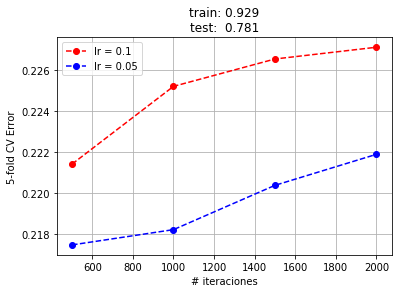

In [279]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=6,learning_rate= lRateOptimo, n_estimators= nEstimatorsOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [280]:
ytrainarbol = bt.predict(X_train)
ytestarbol = bt.predict(X_test)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))

print ('R^2 test =', round (bt.score(X_test, y_test), 4))

RMSE Modelo  (train): 0.161
RMSE Modelo  (test) : 0.287
R^2 test = 0.7805


Tenemos el mejor resultado aunque con una profundidad de 6. Puedo ir probando a modificar el parámetro max_depth

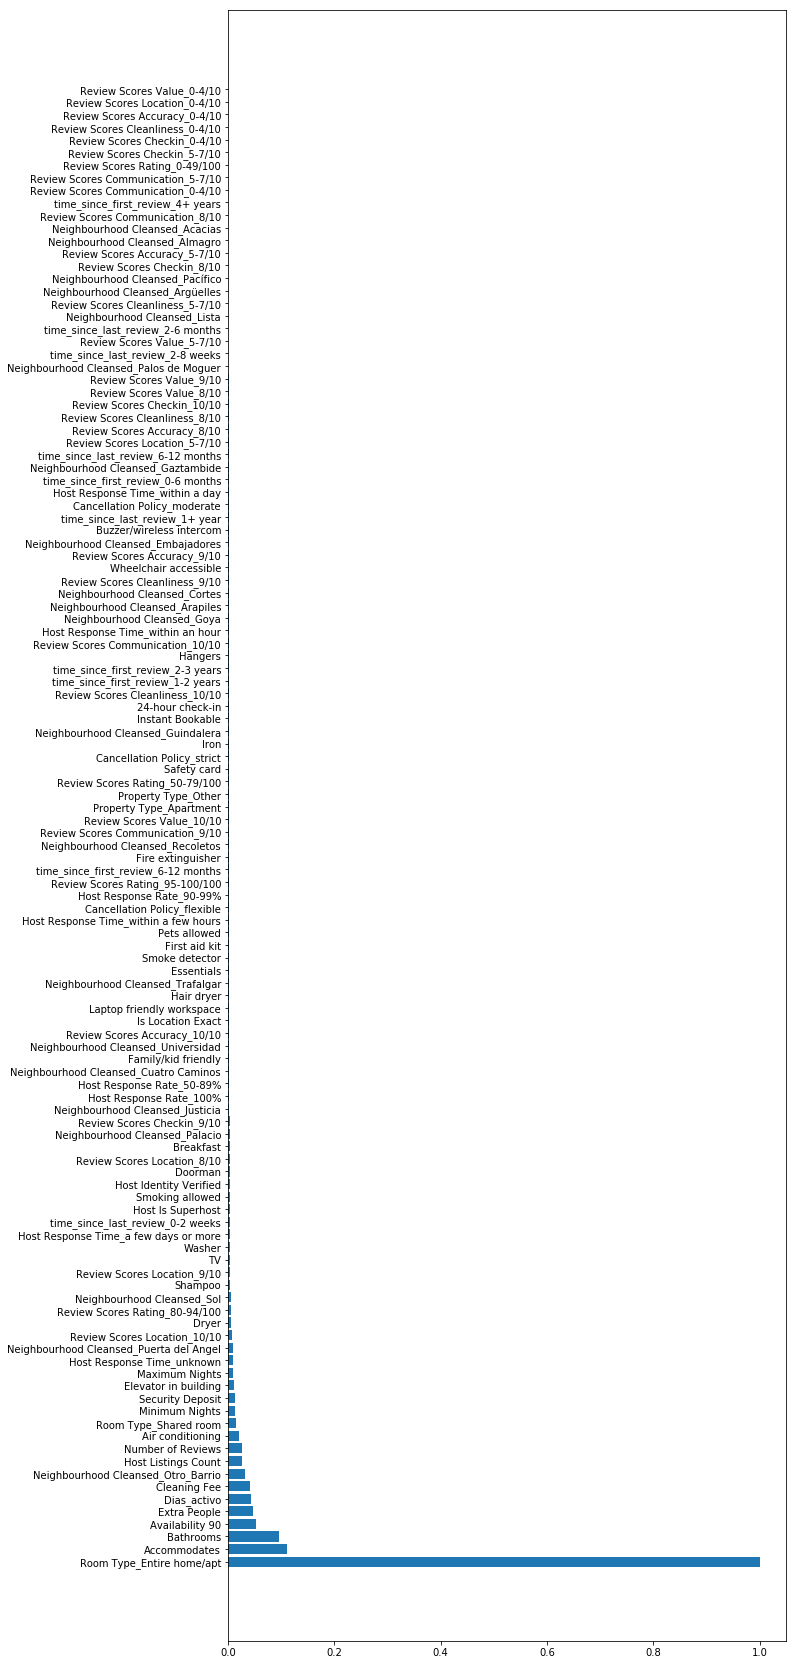

In [281]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,30))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Vemos que ahora hay más características con importancia 0. Se mantiene como más importante Room Type_Entire home/apt y en segunda posición Accomodates

## 7.7 SVR

¡¡OJO!!:  Este paso siguiente tarda unos 100 minutos.....

In [282]:
vectorC = np.logspace(-2, 2, 10)  #10 valores de un parámetro
vectorG = np.logspace(-5, 1, 8)   # 8 valores de un parametro
                                  #El dataset tienen además más de 16.000 registros

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=1)
#X_train ya está escalado
grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 90.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-02, 2.78256e-02, 7.74264e-02, 2.15443e-01, 5.99484e-01,
       1.66810e+00, 4.64159e+00, 1.29155e+01, 3.59381e+01, 1.00000e+02]), 'gamma': array([1.00000e-05, 7.19686e-05, 5.17947e-04, 3.72759e-03, 2.68270e-02,
       1.93070e-01, 1.38950e+00, 1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

best mean cross-validation score: 0.742
best parameters: {'C': 12.915496650148826, 'gamma': 0.0005179474679231213}


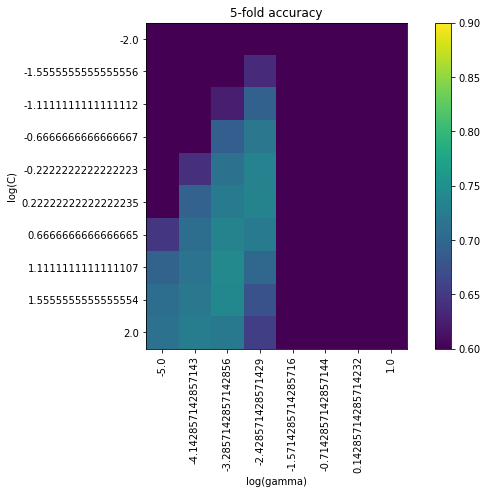

In [283]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [284]:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(X_train,y_train)
print('Acc (TEST): %0.2f'%svmModel.score(X_test,y_test))

Acc (TEST): 0.75


In [285]:
ytrainSVR = svmModel.predict(X_train)
ytestSVR = svmModel.predict(X_test)

mseTrainModelSVR = mean_squared_error(y_train,ytrainSVR)
mseTestModelSVR = mean_squared_error(y_test,ytestSVR)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelSVR))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelSVR))

print ('R^2 test =', round (svmModel.score(X_test, y_test), 4))

RMSE Modelo  (train): 0.269
RMSE Modelo  (test) : 0.308
R^2 test = 0.7469


# 8.- Comparativa de diversos algoritmos

Analizando los resultados de los RMSE anteriores vemos que el que mejor resultado me da es el modelo Gradient Boosted Tree. A continuación se muestra también una comparativa usando la puntuación de la validación cruzada

In [286]:
import warnings
warnings.filterwarnings('ignore')
# Test Options and Evaluation Metrics
num_folds = 10
scoring = "neg_mean_squared_error"
# Spot Check Algorithms
models = []
seed = 0

models.append(('LR', LinearRegression()))
models.append(('RIDGE', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RFOREST', RandomForestRegressor()))
models.append(('GBOOST', GradientBoostingRegressor()))
models.append(('SVR', SVR()))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold,    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)

LR: -2391051039594638336.000000 (7173029750366623744.000000)
RIDGE: -0.103908 (0.005561)
LASSO: -0.362877 (0.013102)
KNN: -0.191268 (0.010254)
CART: -0.171196 (0.009329)
RFOREST: -0.094104 (0.005103)
GBOOST: -0.088464 (0.005080)
SVR: -0.100482 (0.003416)


Me quedo por tanto con este modelo como definitivo

## 9.- Intentos de mejoras del modelo

Me centro ahora en el modelo Gradient Boosted Tree. Cuando se hizo el estudio de correlación vi que las puntaciones de las review parecían estar correladas pero las dejé por si pudieran ser útiles. Sin embargo en el resultado de características importantes que nos da el modelo Boosted Tree se ve que su importancia es relativamente baja. Voy a probar a eliminar las que tienen una mayor correlación y veré si afecta positivamente al modelo.

Mirando de nuevo las correlaciones se aprecia que las review están relacionadas unas con otras y también con las columnas de "Review Score Ratings", así que lo que voy a hacer es quedarme con los "Review Score Ratings" genéricos y eliminar los particulares Accuaricy, Location, Commmunication.......

In [261]:
all_review = list(X_train.columns[X_train.columns.str.startswith("Review Scores")])
review_to_keep = list(X_train.columns[X_train.columns.str.startswith("Review Scores Rating")])
review_to_drop = [x for x in all_review if x not in review_to_keep]

X_train_short = X_train.drop(review_to_drop, axis=1)

#Misma transformación para test
X_test_short = X_test.drop(review_to_drop, axis=1)

In [262]:
X_train_short.head(5)

,Host Listings Count,Accommodates,Bathrooms,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Maximum Nights,Availability 90,Number of Reviews,Dias_activo,Fire extinguisher,Hair dryer,Elevator in building,Wheelchair accessible,Shampoo,Smoke detector,Doorman,Buzzer/wireless intercom,Dryer,Pets allowed,Smoking allowed,24-hour check-in,Family/kid friendly,TV,Hangers,Laptop friendly workspace,Essentials,First aid kit,Iron,Breakfast,Washer,Safety card,Air conditioning,Host Identity Verified,Instant Bookable,Host Is Superhost,Is Location Exact,Host Response Time_a few days or more,Host Response Time_unknown,Host Response Time_within a day,Host Response Time_within a few hours,Host Response Time_within an hour,Host Response Rate_100%,Host Response Rate_50-89%,Host Response Rate_90-99%,Neighbourhood Cleansed_Acacias,Neighbourhood Cleansed_Almagro,Neighbourhood Cleansed_Arapiles,Neighbourhood Cleansed_Argüelles,Neighbourhood Cleansed_Cortes,Neighbourhood Cleansed_Cuatro Caminos,Neighbourhood Cleansed_Embajadores,Neighbourhood Cleansed_Gaztambide,Neighbourhood Cleansed_Goya,Neighbourhood Cleansed_Guindalera,Neighbourhood Cleansed_Justicia,Neighbourhood Cleansed_Lista,Neighbourhood Cleansed_Otro_Barrio,Neighbourhood Cleansed_Pacífico,Neighbourhood Cleansed_Palacio,Neighbourhood Cleansed_Palos de Moguer,Neighbourhood Cleansed_Puerta del Angel,Neighbourhood Cleansed_Recoletos,Neighbourhood Cleansed_Sol,Neighbourhood Cleansed_Trafalgar,Neighbourhood Cleansed_Universidad,Property Type_Apartment,Property Type_Other,Room Type_Entire home/apt,Room Type_Shared room,Review Scores Rating_0-49/100,Review Scores Rating_50-79/100,Review Scores Rating_80-94/100,Review Scores Rating_95-100/100,Cancellation Policy_flexible,Cancellation Policy_moderate,Cancellation Policy_strict,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months,time_since_last_review_0-2 weeks,time_since_last_review_1+ year,time_since_last_review_2-6 months,time_since_last_review_2-8 weeks,time_since_last_review_6-12 months
0,2.487998,0.752749,-0.260085,1.166313,1.007893,1.121345,0.082189,0.578171,-1.366825,0.345699,1.723830,-0.458977,-1.116453,0.810093,2.949864,-1.331300,-0.425653,2.026740,1.100794,-0.438748,2.131415,1.655158,-0.573136,0.827557,0.524426,-1.409041,-1.025243,0.399162,-0.605789,-1.150240,-0.439692,0.417991,-0.328655,0.936334,0.870417,-0.750956,-0.36819,0.743952,-0.139545,-0.380726,-0.369006,-0.485176,0.915720,0.678750,-0.318774,-0.264146,-0.107451,-0.102923,-0.114444,-0.146747,-0.239832,-0.102344,-0.408331,-0.102923,-0.129214,-0.117027,-0.25051,-0.098799,-0.641282,-0.104073,-0.300245,-0.144663,-0.126865,-0.101176,3.547597,-0.152844,-0.332556,0.423169,-0.286429,0.849515,-0.123506,-0.071771,-0.294912,1.220121,-0.664691,-0.707477,-0.669247,1.341787,-0.495774,-0.553760,2.454829,-0.196116,-0.485909,-0.642367,4.318286,-0.416644,-0.545677,-0.298629
1,-0.812759,0.752749,-0.260085,1.079147,0.826083,0.928649,-1.092265,0.578171,-0.243740,1.310494,0.217785,-0.458977,0.895694,0.810093,-0.338999,0.751145,2.349332,-0.493403,1.100794,-0.438748,-0.469172,-0.604172,1.744786,0.827557,-1.906848,0.709703,0.975379,0.399162,-0.605789,0.869384,-0.439692,0.417991,-0.328655,0.936334,0.870417,1.331637,-0.36819,0.743952,-0.139545,-0.380726,-0.369006,-0.485176,0.915720,0.678750,-0.318774,-0.264146,-0.107451,-0.102923,-0.114444,-0.146747,-0.239832,-0.102344,2.448991,-0.102923,-0.129214,-0.117027,-0.25051,-0.098799,-0.641282,-0.104073,-0.300245,-0.144663,-0.126865,-0.101176,-0.281881,-0.152844,-0.332556,0.423169,-0.286429,0.849515,-0.123506,-0.071771,-0.294912,1.220121,-0.664691,1.413473,-0.669247,-0.745275,-0.495774,-0.553760,2.454829,-0.196116,-0.485909,1.556742,-0.231573,-0.416644,-0.545677,-0.298629
2,0.170264,-0.457394,-0.260085,-0.850882,-1.167608,-0.991721,-1.092265,0.578171,0.164655,0.807872,-1.116532,-0.458977,-1.116453,0.810093,-0.338999,0.751145,-0.425653,-0.493403

### Prueba 1: Menos características. Profundidad 6

In [289]:
Niterations = [500,1000,1500,2000] 
learningRate = [0.1,0.05] 
# mantenemos max_depth estático: max_depth=6

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=6), param_grid=param_grid, cv = 5)
grid.fit(X_train_short, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.781
best parameters: {'learning_rate': 0.05, 'n_estimators': 500}


In [290]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=6,learning_rate= lRateOptimo, n_estimators= nEstimatorsOptimo)
bt.fit(X_train_short,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [292]:
ytrainarbol = bt.predict(X_train_short)
ytestarbol = bt.predict(X_test_short)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))

print ('R^2 test =', round (bt.score(X_test_short, y_test), 4))

RMSE Modelo  (train): 0.16
RMSE Modelo  (test) : 0.287
R^2 test = 0.7812


Ha mejorado un poco y encima se ha eliminado mucha complejidad porque hemos quitado 30 características con lo que de momento esta sería la opción adecuada

In [293]:
len (review_to_drop)

30

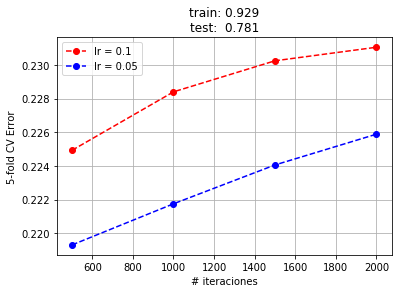

In [294]:
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train_short,y_train),bt.score(X_test_short,y_test)))
plt.grid()
plt.show()

### Prueba 2:  Modificación de  Niteracions y learning Rate. Mantengo profundidad 6
Pruebo a cambiar parámetros por si pudiera mejorar algo más

In [295]:
Niterations = [100,200,300,400,500,600,700] 
learningRate = [0.05, 0.01] 
# mantenemos max_depth estático: max_depth=6

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=6), param_grid=param_grid, cv = 5)
grid.fit(X_train_short, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.781
best parameters: {'learning_rate': 0.05, 'n_estimators': 500}


In [296]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=6,learning_rate= lRateOptimo, n_estimators= nEstimatorsOptimo)
bt.fit(X_train_short,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

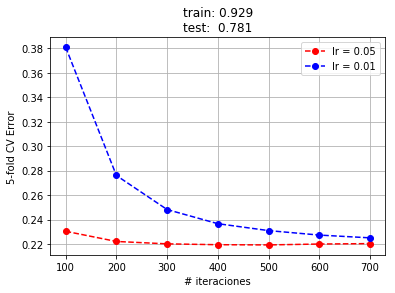

In [297]:
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train_short,y_train),bt.score(X_test_short,y_test)))
plt.grid()
plt.show()

In [298]:
ytrainarbol = bt.predict(X_train_short)
ytestarbol = bt.predict(X_test_short)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))

print ('R^2 test =', round (bt.score(X_test_short, y_test), 4))

RMSE Modelo  (train): 0.16
RMSE Modelo  (test) : 0.287
R^2 test = 0.7812


Me ha vuelto a coger como óptimos los mismos parámetros

n_estimators = 500

learning_rate = 0.05

### Prueba 3:  Modificación profundidad 4
Pruebo a disminuir profundidad

In [300]:
Niterations = [100,200,300,400,500,600,700] 
learningRate = [0.05, 0.01] 
# mantenemos max_depth estático: max_depth=4

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=4), param_grid=param_grid, cv = 5)
grid.fit(X_train_short, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.779
best parameters: {'learning_rate': 0.05, 'n_estimators': 700}


In [301]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=4,learning_rate= lRateOptimo, n_estimators= nEstimatorsOptimo)
bt.fit(X_train_short,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=700, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

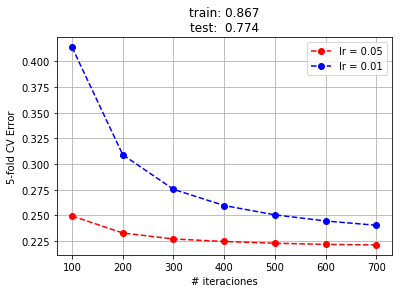

In [302]:
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train_short,y_train),bt.score(X_test_short,y_test)))
plt.grid()
plt.show()

In [303]:
ytrainarbol = bt.predict(X_train_short)
ytestarbol = bt.predict(X_test_short)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))

print ('R^2 test =', round (bt.score(X_test_short, y_test), 4))

RMSE Modelo  (train): 0.219
RMSE Modelo  (test) : 0.291
R^2 test = 0.7744


Ha aumentado un poco el error al disminuir la profundidad pero no hay demasiada diferencia y le he quitado complejidad al modelo

### Prueba 4:  Profundidad 4 y aumento iteraciones y lr

In [263]:
Niterations = [400,500,600,700,800,900,1000] 
learningRate = [0.1,0.05] 
# mantenemos max_depth estático: max_depth=4

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=4), param_grid=param_grid, cv = 5)
grid.fit(X_train_short, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.780
best parameters: {'learning_rate': 0.1, 'n_estimators': 500}


In [264]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=4,learning_rate= lRateOptimo, n_estimators= nEstimatorsOptimo)
bt.fit(X_train_short,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

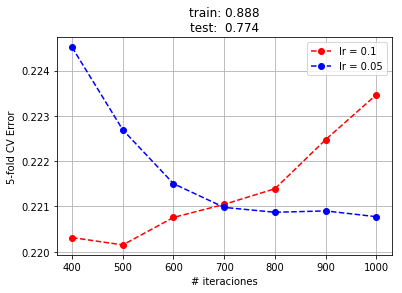

In [265]:
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train_short,y_train),bt.score(X_test_short,y_test)))
plt.grid()
plt.show()

In [267]:
ytrainarbol = bt.predict(X_train_short)
ytestarbol = bt.predict(X_test_short)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))

print ('R^2 test =', round (bt.score(X_test_short, y_test), 4))

RMSE Modelo  (train): 0.201
RMSE Modelo  (test) : 0.291
R^2 test = 0.7744


In [268]:
#max_depth=6, learning_rate': 0.05, 'n_estimators': 500 ---> RMSE Modelo  (test) : 0.287 --- R^2 = 0.7812
#max_depth=4, learning_rate': 0.05, 'n_estimators': 700 ---> RMSE Modelo  (test) : 0.291 --- R^2 = 0.7744
#max_depth=4, learning_rate': 0.1,   n_estimators': 500,  ---> RMSE Modelo  (test) : 0.291 --- R^2 = 0.7744

### Prueba 5:  Fijamos lr y n_estimator y buscamos la mejor profundidad 
'learning_rate': 0.1, 'n_estimators': 500 y miro cual es la mejor profundidad

In [269]:
Niterations = [500] 
learningRate = [0.1] 
maxDepth=range(3,10)
param_grid = {'n_estimators': Niterations,'learning_rate':learningRate, 'max_depth': maxDepth }


grid = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid=param_grid, cv = 5)
grid.fit(X_train_short, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.780
best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}


In [270]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']
maxdepthOptimo = grid.best_params_['max_depth']

bt = GradientBoostingRegressor(random_state=0, max_depth=maxdepthOptimo,learning_rate= lRateOptimo, n_estimators= nEstimatorsOptimo)
bt.fit(X_train_short,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [275]:
ytrainarbol = bt.predict(X_train_short)
ytestarbol = bt.predict(X_test_short)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))

print ('R^2 test =', round (bt.score(X_test_short, y_test), 4))


RMSE Modelo  (train): 0.201
RMSE Modelo  (test) : 0.291
R^2 test = 0.7744


Los parámetros que dejo definitivamente son:
n_estimators: 500
learning_rate: 0.1
max_depth: 4

Con esto consigo R^2 = 0.7744 y RMSE = 0.291


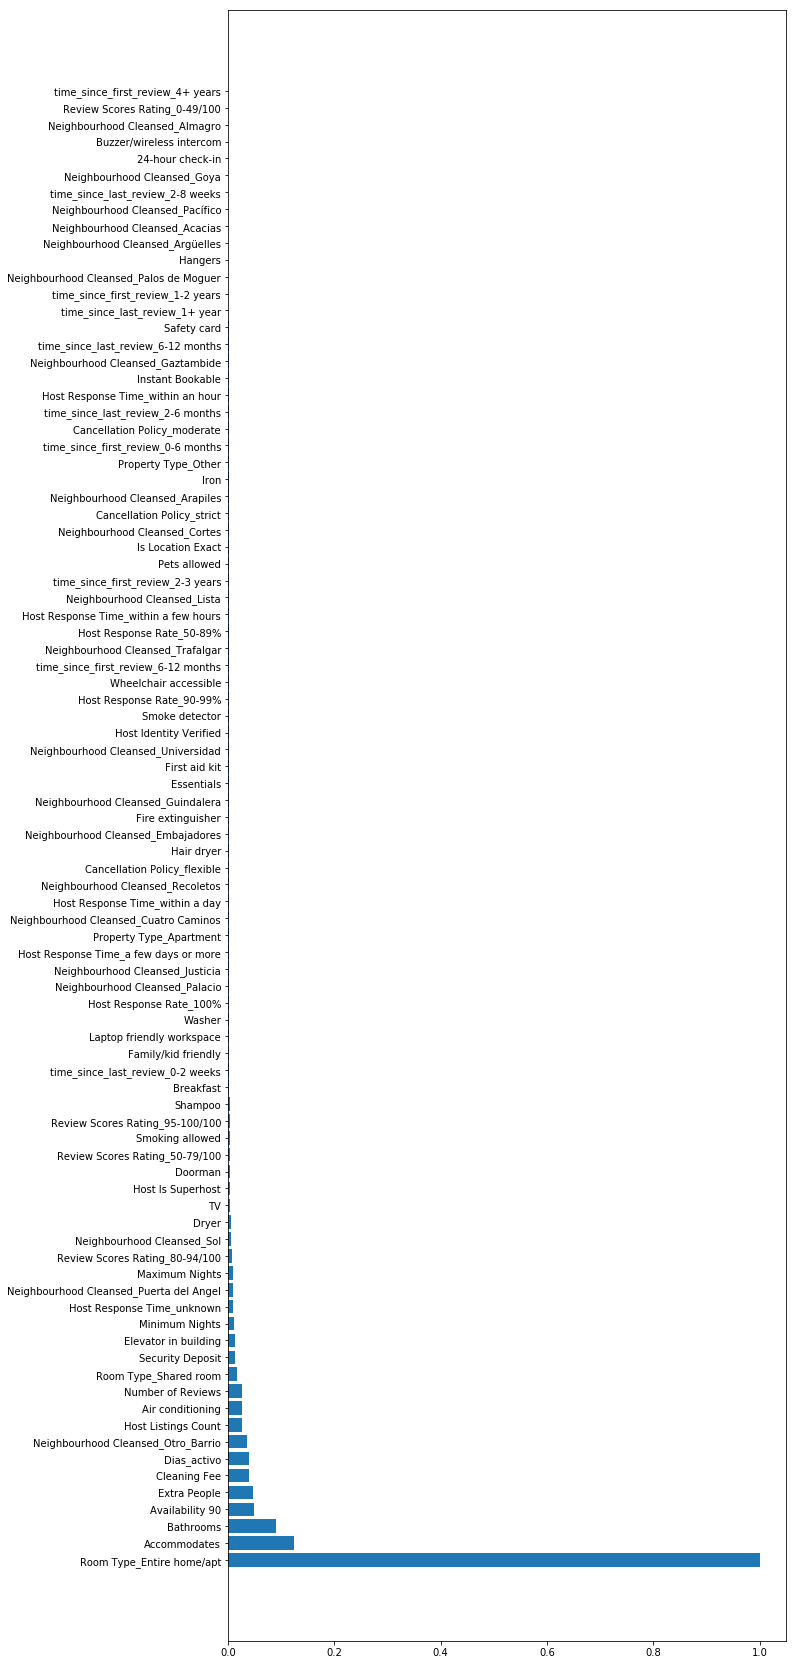

In [272]:
#Importancia de las características
feature_names = X_train_short.columns[0:]
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,30))
plt.barh(range(X_train_short.shape[1]),importances[indices])
plt.yticks(range(X_train_short.shape[1]),feature_names[indices])
plt.show()

## 10.- Conclusión

El modelo que mejor resultados me da es el "Gradient Boosted Tree" con los siguientes parámetros:

- n_estimators: 500 
- learning_rate: 0.1 
- max_depth: 4

Con esto consigo para mi conjunto de test y, tras aplicar todas las transformaciones necesarias, estos resultados:

- R^2 = 0.7744 
- RMSE = 0.291

Las tres característica más importantes para el cálculo del precio en orden son:

- Room Type: Entire home/apt
- Accomodates
- Bathrooms
